In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.contrib.tensorboard.plugins import projector

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()
os.chdir(cwd)
from my_package.my_helper import fc_layer,weight_variable,bias_variable,write_sprite_image,write_metadata
import subprocess

ModuleNotFoundError: No module named 'my_package'


train_images.shape: (60000, 28, 28, 1), of uint8
test_images.shape: (10000, 28, 28, 1), of uint8


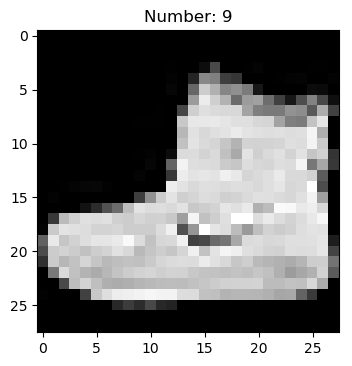

In [15]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\ntrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))
plt.figure(dpi=100)
plt.imshow(np.squeeze(train_images[0]), cmap='gray')
plt.title('Number: {}'.format(train_labels[0]))
plt.show()

In [16]:
# hyper-parameters
logs_path = "./logs/embedding/"  # path to the folder that we want to save the logs for Tensorboard
learning_rate = 0.001  # The optimization learning rate
epochs = 2  # Total number of training epochs
batch_size = 400  # Training batch size
display_freq = 100  # Frequency of displaying the training results

# Network Parameters
# We know that MNIST images are 28 pixels in each dimension.
img_h = img_w = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_h * img_w

# Number of classes, one class for each of 10 digits.
n_classes = 10

# number of units in the first hidden layer
h1 = 200


In [6]:
# Create graph
# Placeholders for inputs (x), outputs(y)
with tf.variable_scope('Input'):
    x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='X')
    tf.summary.image('input_image', tf.reshape(x, (-1, img_w, img_h, 1)), max_outputs=5)
    y = tf.placeholder(tf.float32, shape=[None, n_classes], name='Y')
fc1 = fc_layer(x, h1, 'Hidden_layer', use_relu=True)
output_logits = fc_layer(fc1, n_classes, 'Output_layer', use_relu=False)

# Define the loss function, optimizer, and accuracy
with tf.variable_scope('Train'):
    with tf.variable_scope('Loss'):
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output_logits), name='loss')
        tf.summary.scalar('loss', loss)
    with tf.variable_scope('Optimizer'):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, name='Adam-op').minimize(loss)
    with tf.variable_scope('Accuracy'):
        correct_prediction = tf.equal(tf.argmax(output_logits, 1), tf.argmax(y, 1), name='correct_pred')
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')
        tf.summary.scalar('accuracy', accuracy)
        # Network predictions
        cls_prediction = tf.argmax(output_logits, axis=1, name='predictions')


NameError: name 'fc_layer' is not defined

In [ ]:
train_writer = tf.summary.FileWriter(logs_path, sess.graph)
num_tr_iter = int(train_images.shape[0] / batch_size)
global_step = 0

cnn = keras.models.Sequential()

cnn.add(keras.layers.InputLayer(input_shape=(28, 28, 1)))

# Normalization
cnn.add(keras.layers.BatchNormalization())

# Conv + Maxpooling
cnn.add(keras.layers.Convolution2D(64, (4, 4), padding='same', activation='relu'))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout
cnn.add(keras.layers.Dropout(0.1))

# Conv + Maxpooling
cnn.add(keras.layers.Convolution2D(64, (4, 4), activation='relu'))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout
cnn.add(keras.layers.Dropout(0.3))

# Converting 3D feature to 1D feature Vektor
cnn.add(keras.layers.Flatten())

# Fully Connected Layer
cnn.add(keras.layers.Dense(256, activation='relu'))

# Dropout
cnn.add(keras.layers.Dropout(0.5))

# Fully Connected Layer
cnn.add(keras.layers.Dense(64, activation='relu'))

# Normalization
cnn.add(keras.layers.BatchNormalization())

cnn.add(keras.layers.Dense(10, activation='softmax'))
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [17]:
# Initializing the variables
init = tf.global_variables_initializer()
merged = tf.summary.merge_all()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    cnn.fit(train_images, train_labels, epochs=epochs)
    test_loss, test_acc = cnn.evaluate(test_images, test_labels)
    print('Test accuracy:', test_acc)
    save_path = saver.save(sess, os.path.join(logs_path, "model.ckpt"))
    print("Model saved in path: %s" % save_path)


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


Epoch 1/2


   32/60000 [..............................] - ETA: 32:47 - loss: 2.9130 - acc: 0.0938

   64/60000 [..............................] - ETA: 18:18 - loss: 2.8688 - acc: 0.1406

   96/60000 [..............................] - ETA: 13:30 - loss: 2.7901 - acc: 0.1354

  128/60000 [..............................] - ETA: 11:04 - loss: 2.8471 - acc: 0.1094

  160/60000 [..............................] - ETA: 9:38 - loss: 2.8053 - acc: 0.1125 

  192/60000 [..............................] - ETA: 8:40 - loss: 2.7476 - acc: 0.1250

  224/60000 [..............................] - ETA: 7:57 - loss: 2.7065 - acc: 0.1250

  256/60000 [..............................] - ETA: 7:25 - loss: 2.6808 - acc: 0.1445

  288/60000 [..............................] - ETA: 7:00 - loss: 2.6877 - acc: 0.1354

  320/60000 [..............................] - ETA: 6:41 - loss: 2.6652 - acc: 0.1500

  352/60000 [..............................] - ETA: 6:24 - loss: 2.6631 - acc: 0.1477

  384/60000 [..............................] - ETA: 6:10 - loss: 2.6466 - acc: 0.1536

  416/60000 [..............................] - ETA: 5:58 - loss: 2.5964 - acc: 0.1635

  448/60000 [..............................] - ETA: 5:48 - loss: 2.5774 - acc: 0.1719

  480/60000 [..............................] - ETA: 5:40 - loss: 2.5307 - acc: 0.1833

  512/60000 [..............................] - ETA: 5:32 - loss: 2.5107 - acc: 0.1855

  544/60000 [..............................] - ETA: 5:25 - loss: 2.4769 - acc: 0.1930

  576/60000 [..............................] - ETA: 5:19 - loss: 2.4486 - acc: 0.1962

  608/60000 [..............................] - ETA: 5:14 - loss: 2.4390 - acc: 0.1941

  640/60000 [..............................] - ETA: 5:10 - loss: 2.4298 - acc: 0.1969

  672/60000 [..............................] - ETA: 5:06 - loss: 2.3993 - acc: 0.2054

  704/60000 [..............................] - ETA: 5:02 - loss: 2.3686 - acc: 0.2116

  736/60000 [..............................] - ETA: 4:58 - loss: 2.3388 - acc: 0.2215

  768/60000 [..............................] - ETA: 4:55 - loss: 2.3154 - acc: 0.2253

  800/60000 [..............................] - ETA: 4:52 - loss: 2.2809 - acc: 0.2362

  832/60000 [..............................] - ETA: 4:49 - loss: 2.2477 - acc: 0.2500

  864/60000 [..............................] - ETA: 4:46 - loss: 2.2312 - acc: 0.2523

  896/60000 [..............................] - ETA: 4:45 - loss: 2.2192 - acc: 0.2556

  928/60000 [..............................] - ETA: 4:42 - loss: 2.2020 - acc: 0.2597

  960/60000 [..............................] - ETA: 4:40 - loss: 2.1751 - acc: 0.2698

  992/60000 [..............................] - ETA: 4:38 - loss: 2.1618 - acc: 0.2712

 1024/60000 [..............................] - ETA: 4:36 - loss: 2.1342 - acc: 0.2783

 1056/60000 [..............................] - ETA: 4:34 - loss: 2.1072 - acc: 0.2860

 1088/60000 [..............................] - ETA: 4:33 - loss: 2.0870 - acc: 0.2914

 1120/60000 [..............................] - ETA: 4:31 - loss: 2.0629 - acc: 0.3018

 1152/60000 [..............................] - ETA: 4:29 - loss: 2.0431 - acc: 0.3073

 1184/60000 [..............................] - ETA: 4:28 - loss: 2.0335 - acc: 0.3100

 1216/60000 [..............................] - ETA: 4:27 - loss: 2.0179 - acc: 0.3150

 1248/60000 [..............................] - ETA: 4:25 - loss: 2.0007 - acc: 0.3197

 1280/60000 [..............................] - ETA: 4:24 - loss: 1.9827 - acc: 0.3258

 1312/60000 [..............................] - ETA: 4:23 - loss: 1.9592 - acc: 0.3346

 1344/60000 [..............................] - ETA: 4:22 - loss: 1.9429 - acc: 0.3400

 1376/60000 [..............................] - ETA: 4:20 - loss: 1.9323 - acc: 0.3430

 1408/60000 [..............................] - ETA: 4:19 - loss: 1.9072 - acc: 0.3523

 1440/60000 [..............................] - ETA: 4:18 - loss: 1.8918 - acc: 0.3569

 1472/60000 [..............................] - ETA: 4:17 - loss: 1.8791 - acc: 0.3621

 1504/60000 [..............................] - ETA: 4:16 - loss: 1.8687 - acc: 0.3670

 1536/60000 [..............................] - ETA: 4:15 - loss: 1.8533 - acc: 0.3737

 1568/60000 [..............................] - ETA: 4:14 - loss: 1.8388 - acc: 0.3776

 1600/60000 [..............................] - ETA: 4:13 - loss: 1.8281 - acc: 0.3794

 1632/60000 [..............................] - ETA: 4:13 - loss: 1.8133 - acc: 0.3836

 1664/60000 [..............................] - ETA: 4:12 - loss: 1.8033 - acc: 0.3852

 1696/60000 [..............................] - ETA: 4:11 - loss: 1.7899 - acc: 0.3897

 1728/60000 [..............................] - ETA: 4:10 - loss: 1.7774 - acc: 0.3929

 1760/60000 [..............................] - ETA: 4:09 - loss: 1.7669 - acc: 0.3955

 1792/60000 [..............................] - ETA: 4:09 - loss: 1.7604 - acc: 0.3990

 1824/60000 [..............................] - ETA: 4:08 - loss: 1.7487 - acc: 0.4030

 1856/60000 [..............................] - ETA: 4:07 - loss: 1.7397 - acc: 0.4062

 1888/60000 [..............................] - ETA: 4:07 - loss: 1.7333 - acc: 0.4084

 1920/60000 [..............................] - ETA: 4:06 - loss: 1.7230 - acc: 0.4099

 1952/60000 [..............................] - ETA: 4:05 - loss: 1.7196 - acc: 0.4109

 1984/60000 [..............................] - ETA: 4:05 - loss: 1.7071 - acc: 0.4158

 2016/60000 [>.............................] - ETA: 4:04 - loss: 1.6962 - acc: 0.4201

 2048/60000 [>.............................] - ETA: 4:03 - loss: 1.6833 - acc: 0.4243

 2080/60000 [>.............................] - ETA: 4:03 - loss: 1.6728 - acc: 0.4269

 2112/60000 [>.............................] - ETA: 4:02 - loss: 1.6603 - acc: 0.4318

 2144/60000 [>.............................] - ETA: 4:02 - loss: 1.6529 - acc: 0.4352

 2176/60000 [>.............................] - ETA: 4:01 - loss: 1.6429 - acc: 0.4389

 2208/60000 [>.............................] - ETA: 4:01 - loss: 1.6340 - acc: 0.4425

 2240/60000 [>.............................] - ETA: 4:00 - loss: 1.6263 - acc: 0.4451

 2272/60000 [>.............................] - ETA: 4:00 - loss: 1.6189 - acc: 0.4467

 2304/60000 [>.............................] - ETA: 3:59 - loss: 1.6113 - acc: 0.4497

 2336/60000 [>.............................] - ETA: 3:59 - loss: 1.5992 - acc: 0.4538

 2368/60000 [>.............................] - ETA: 3:58 - loss: 1.5940 - acc: 0.4557

 2400/60000 [>.............................] - ETA: 3:58 - loss: 1.5870 - acc: 0.4588

 2432/60000 [>.............................] - ETA: 3:57 - loss: 1.5835 - acc: 0.4605

 2464/60000 [>.............................] - ETA: 3:57 - loss: 1.5821 - acc: 0.4606

 2496/60000 [>.............................] - ETA: 3:56 - loss: 1.5731 - acc: 0.4627

 2528/60000 [>.............................] - ETA: 3:56 - loss: 1.5627 - acc: 0.4656

 2560/60000 [>.............................] - ETA: 3:56 - loss: 1.5553 - acc: 0.4676

 2592/60000 [>.............................] - ETA: 3:55 - loss: 1.5491 - acc: 0.4691

 2624/60000 [>.............................] - ETA: 3:55 - loss: 1.5428 - acc: 0.4718

 2656/60000 [>.............................] - ETA: 3:54 - loss: 1.5371 - acc: 0.4729

 2688/60000 [>.............................] - ETA: 3:54 - loss: 1.5328 - acc: 0.4728

 2720/60000 [>.............................] - ETA: 3:54 - loss: 1.5255 - acc: 0.4746

 2752/60000 [>.............................] - ETA: 3:53 - loss: 1.5198 - acc: 0.4764

 2784/60000 [>.............................] - ETA: 3:53 - loss: 1.5126 - acc: 0.4784

 2816/60000 [>.............................] - ETA: 3:53 - loss: 1.5064 - acc: 0.4812

 2848/60000 [>.............................] - ETA: 3:52 - loss: 1.4970 - acc: 0.4853

 2880/60000 [>.............................] - ETA: 3:52 - loss: 1.4895 - acc: 0.4882

 2912/60000 [>.............................] - ETA: 3:52 - loss: 1.4817 - acc: 0.4911

 2944/60000 [>.............................] - ETA: 3:51 - loss: 1.4744 - acc: 0.4932

 2976/60000 [>.............................] - ETA: 3:51 - loss: 1.4675 - acc: 0.4960

 3008/60000 [>.............................] - ETA: 3:51 - loss: 1.4602 - acc: 0.4983

 3040/60000 [>.............................] - ETA: 3:50 - loss: 1.4542 - acc: 0.5003

 3072/60000 [>.............................] - ETA: 3:50 - loss: 1.4462 - acc: 0.5033

 3104/60000 [>.............................] - ETA: 3:50 - loss: 1.4381 - acc: 0.5058

 3136/60000 [>.............................] - ETA: 3:49 - loss: 1.4346 - acc: 0.5070

 3168/60000 [>.............................] - ETA: 3:49 - loss: 1.4330 - acc: 0.5082

 3200/60000 [>.............................] - ETA: 3:49 - loss: 1.4307 - acc: 0.5088

 3232/60000 [>.............................] - ETA: 3:48 - loss: 1.4270 - acc: 0.5102

 3264/60000 [>.............................] - ETA: 3:48 - loss: 1.4192 - acc: 0.5126

 3296/60000 [>.............................] - ETA: 3:48 - loss: 1.4147 - acc: 0.5143

 3328/60000 [>.............................] - ETA: 3:47 - loss: 1.4068 - acc: 0.5171

 3360/60000 [>.............................] - ETA: 3:47 - loss: 1.4029 - acc: 0.5188

 3392/60000 [>.............................] - ETA: 3:47 - loss: 1.3985 - acc: 0.5212

 3424/60000 [>.............................] - ETA: 3:46 - loss: 1.3942 - acc: 0.5216

 3456/60000 [>.............................] - ETA: 3:46 - loss: 1.3865 - acc: 0.5246

 3488/60000 [>.............................] - ETA: 3:46 - loss: 1.3856 - acc: 0.5247

 3520/60000 [>.............................] - ETA: 3:46 - loss: 1.3797 - acc: 0.5270

 3552/60000 [>.............................] - ETA: 3:45 - loss: 1.3734 - acc: 0.5296

 3584/60000 [>.............................] - ETA: 3:45 - loss: 1.3670 - acc: 0.5318

 3616/60000 [>.............................] - ETA: 3:45 - loss: 1.3635 - acc: 0.5326

 3648/60000 [>.............................] - ETA: 3:44 - loss: 1.3600 - acc: 0.5332

 3680/60000 [>.............................] - ETA: 3:44 - loss: 1.3565 - acc: 0.5340

 3712/60000 [>.............................] - ETA: 3:44 - loss: 1.3520 - acc: 0.5353

 3744/60000 [>.............................] - ETA: 3:44 - loss: 1.3464 - acc: 0.5363

 3776/60000 [>.............................] - ETA: 3:44 - loss: 1.3417 - acc: 0.5381

 3808/60000 [>.............................] - ETA: 3:43 - loss: 1.3362 - acc: 0.5399

 3840/60000 [>.............................] - ETA: 3:43 - loss: 1.3340 - acc: 0.5417

 3872/60000 [>.............................] - ETA: 3:43 - loss: 1.3350 - acc: 0.5418

 3904/60000 [>.............................] - ETA: 3:43 - loss: 1.3288 - acc: 0.5438

 3936/60000 [>.............................] - ETA: 3:42 - loss: 1.3240 - acc: 0.5455

 3968/60000 [>.............................] - ETA: 3:42 - loss: 1.3184 - acc: 0.5479

 4000/60000 [=>............................] - ETA: 3:42 - loss: 1.3137 - acc: 0.5487

 4032/60000 [=>............................] - ETA: 3:41 - loss: 1.3091 - acc: 0.5503

 4064/60000 [=>............................] - ETA: 3:41 - loss: 1.3063 - acc: 0.5517

 4096/60000 [=>............................] - ETA: 3:41 - loss: 1.2998 - acc: 0.5542

 4128/60000 [=>............................] - ETA: 3:41 - loss: 1.2969 - acc: 0.5550

 4160/60000 [=>............................] - ETA: 3:40 - loss: 1.2918 - acc: 0.5565

 4192/60000 [=>............................] - ETA: 3:40 - loss: 1.2903 - acc: 0.5573

 4224/60000 [=>............................] - ETA: 3:40 - loss: 1.2872 - acc: 0.5582

 4256/60000 [=>............................] - ETA: 3:40 - loss: 1.2819 - acc: 0.5606

 4288/60000 [=>............................] - ETA: 3:39 - loss: 1.2785 - acc: 0.5618

 4320/60000 [=>............................] - ETA: 3:39 - loss: 1.2772 - acc: 0.5623

 4352/60000 [=>............................] - ETA: 3:39 - loss: 1.2723 - acc: 0.5641

 4384/60000 [=>............................] - ETA: 3:39 - loss: 1.2680 - acc: 0.5655

 4416/60000 [=>............................] - ETA: 3:39 - loss: 1.2638 - acc: 0.5668

 4448/60000 [=>............................] - ETA: 3:38 - loss: 1.2639 - acc: 0.5668

 4480/60000 [=>............................] - ETA: 3:38 - loss: 1.2619 - acc: 0.5676

 4512/60000 [=>............................] - ETA: 3:38 - loss: 1.2584 - acc: 0.5689

 4544/60000 [=>............................] - ETA: 3:38 - loss: 1.2561 - acc: 0.5693

 4576/60000 [=>............................] - ETA: 3:38 - loss: 1.2546 - acc: 0.5697

 4608/60000 [=>............................] - ETA: 3:37 - loss: 1.2535 - acc: 0.5705

 4640/60000 [=>............................] - ETA: 3:37 - loss: 1.2499 - acc: 0.5720

 4672/60000 [=>............................] - ETA: 3:37 - loss: 1.2479 - acc: 0.5728

 4704/60000 [=>............................] - ETA: 3:37 - loss: 1.2429 - acc: 0.5748

 4736/60000 [=>............................] - ETA: 3:37 - loss: 1.2404 - acc: 0.5760

 4768/60000 [=>............................] - ETA: 3:36 - loss: 1.2369 - acc: 0.5768

 4800/60000 [=>............................] - ETA: 3:36 - loss: 1.2333 - acc: 0.5777

 4832/60000 [=>............................] - ETA: 3:36 - loss: 1.2302 - acc: 0.5782

 4864/60000 [=>............................] - ETA: 3:36 - loss: 1.2271 - acc: 0.5796

 4896/60000 [=>............................] - ETA: 3:36 - loss: 1.2235 - acc: 0.5809

 4928/60000 [=>............................] - ETA: 3:35 - loss: 1.2228 - acc: 0.5808

 4960/60000 [=>............................] - ETA: 3:35 - loss: 1.2213 - acc: 0.5813

 4992/60000 [=>............................] - ETA: 3:35 - loss: 1.2195 - acc: 0.5817

 5024/60000 [=>............................] - ETA: 3:35 - loss: 1.2181 - acc: 0.5824

 5056/60000 [=>............................] - ETA: 3:35 - loss: 1.2143 - acc: 0.5837

 5088/60000 [=>............................] - ETA: 3:34 - loss: 1.2123 - acc: 0.5841

 5120/60000 [=>............................] - ETA: 3:34 - loss: 1.2098 - acc: 0.5850

 5152/60000 [=>............................] - ETA: 3:34 - loss: 1.2062 - acc: 0.5864

 5184/60000 [=>............................] - ETA: 3:34 - loss: 1.2032 - acc: 0.5872

 5216/60000 [=>............................] - ETA: 3:34 - loss: 1.2000 - acc: 0.5876

 5248/60000 [=>............................] - ETA: 3:33 - loss: 1.1956 - acc: 0.5888

 5280/60000 [=>............................] - ETA: 3:33 - loss: 1.1946 - acc: 0.5890

 5312/60000 [=>............................] - ETA: 3:33 - loss: 1.1929 - acc: 0.5894

 5344/60000 [=>............................] - ETA: 3:33 - loss: 1.1896 - acc: 0.5906

 5376/60000 [=>............................] - ETA: 3:33 - loss: 1.1870 - acc: 0.5917

 5408/60000 [=>............................] - ETA: 3:32 - loss: 1.1857 - acc: 0.5919

 5440/60000 [=>............................] - ETA: 3:32 - loss: 1.1820 - acc: 0.5930

 5472/60000 [=>............................] - ETA: 3:32 - loss: 1.1793 - acc: 0.5939

 5504/60000 [=>............................] - ETA: 3:32 - loss: 1.1771 - acc: 0.5950

 5536/60000 [=>............................] - ETA: 3:32 - loss: 1.1742 - acc: 0.5959

 5568/60000 [=>............................] - ETA: 3:31 - loss: 1.1732 - acc: 0.5955

 5600/60000 [=>............................] - ETA: 3:31 - loss: 1.1718 - acc: 0.5959

 5632/60000 [=>............................] - ETA: 3:31 - loss: 1.1692 - acc: 0.5969

 5664/60000 [=>............................] - ETA: 3:31 - loss: 1.1658 - acc: 0.5980

 5696/60000 [=>............................] - ETA: 3:31 - loss: 1.1627 - acc: 0.5990

 5728/60000 [=>............................] - ETA: 3:30 - loss: 1.1607 - acc: 0.5993

 5760/60000 [=>............................] - ETA: 3:30 - loss: 1.1585 - acc: 0.6002

 5792/60000 [=>............................] - ETA: 3:30 - loss: 1.1572 - acc: 0.6001

 5824/60000 [=>............................] - ETA: 3:30 - loss: 1.1561 - acc: 0.6010

 5856/60000 [=>............................] - ETA: 3:30 - loss: 1.1539 - acc: 0.6018

 5888/60000 [=>............................] - ETA: 3:30 - loss: 1.1505 - acc: 0.6031

 5920/60000 [=>............................] - ETA: 3:30 - loss: 1.1501 - acc: 0.6029

 5952/60000 [=>............................] - ETA: 3:29 - loss: 1.1482 - acc: 0.6032

 5984/60000 [=>............................] - ETA: 3:29 - loss: 1.1466 - acc: 0.6038

 6016/60000 [==>...........................] - ETA: 3:29 - loss: 1.1435 - acc: 0.6047

 6048/60000 [==>...........................] - ETA: 3:29 - loss: 1.1410 - acc: 0.6055

 6080/60000 [==>...........................] - ETA: 3:29 - loss: 1.1386 - acc: 0.6066

 6112/60000 [==>...........................] - ETA: 3:28 - loss: 1.1362 - acc: 0.6075

 6144/60000 [==>...........................] - ETA: 3:28 - loss: 1.1337 - acc: 0.6087

 6176/60000 [==>...........................] - ETA: 3:28 - loss: 1.1310 - acc: 0.6099

 6208/60000 [==>...........................] - ETA: 3:28 - loss: 1.1288 - acc: 0.6107

 6240/60000 [==>...........................] - ETA: 3:28 - loss: 1.1266 - acc: 0.6112

 6272/60000 [==>...........................] - ETA: 3:28 - loss: 1.1234 - acc: 0.6122

 6304/60000 [==>...........................] - ETA: 3:27 - loss: 1.1203 - acc: 0.6134

 6336/60000 [==>...........................] - ETA: 3:27 - loss: 1.1190 - acc: 0.6136

 6368/60000 [==>...........................] - ETA: 3:27 - loss: 1.1181 - acc: 0.6139

 6400/60000 [==>...........................] - ETA: 3:27 - loss: 1.1161 - acc: 0.6145

 6432/60000 [==>...........................] - ETA: 3:27 - loss: 1.1127 - acc: 0.6155

 6464/60000 [==>...........................] - ETA: 3:27 - loss: 1.1106 - acc: 0.6163

 6496/60000 [==>...........................] - ETA: 3:26 - loss: 1.1087 - acc: 0.6168

 6528/60000 [==>...........................] - ETA: 3:26 - loss: 1.1061 - acc: 0.6178

 6560/60000 [==>...........................] - ETA: 3:26 - loss: 1.1045 - acc: 0.6181

 6592/60000 [==>...........................] - ETA: 3:26 - loss: 1.1037 - acc: 0.6185

 6624/60000 [==>...........................] - ETA: 3:26 - loss: 1.1008 - acc: 0.6196

 6656/60000 [==>...........................] - ETA: 3:25 - loss: 1.0986 - acc: 0.6199

 6688/60000 [==>...........................] - ETA: 3:25 - loss: 1.0957 - acc: 0.6208

 6720/60000 [==>...........................] - ETA: 3:25 - loss: 1.0931 - acc: 0.6220

 6752/60000 [==>...........................] - ETA: 3:25 - loss: 1.0904 - acc: 0.6231

 6784/60000 [==>...........................] - ETA: 3:25 - loss: 1.0891 - acc: 0.6234

 6816/60000 [==>...........................] - ETA: 3:25 - loss: 1.0870 - acc: 0.6240

 6848/60000 [==>...........................] - ETA: 3:25 - loss: 1.0841 - acc: 0.6250

 6880/60000 [==>...........................] - ETA: 3:24 - loss: 1.0813 - acc: 0.6262

 6912/60000 [==>...........................] - ETA: 3:24 - loss: 1.0797 - acc: 0.6267

 6944/60000 [==>...........................] - ETA: 3:24 - loss: 1.0770 - acc: 0.6276

 6976/60000 [==>...........................] - ETA: 3:24 - loss: 1.0753 - acc: 0.6279

 7008/60000 [==>...........................] - ETA: 3:24 - loss: 1.0751 - acc: 0.6281

 7040/60000 [==>...........................] - ETA: 3:24 - loss: 1.0719 - acc: 0.6294

 7072/60000 [==>...........................] - ETA: 3:24 - loss: 1.0709 - acc: 0.6297

 7104/60000 [==>...........................] - ETA: 3:24 - loss: 1.0685 - acc: 0.6305

 7136/60000 [==>...........................] - ETA: 3:23 - loss: 1.0658 - acc: 0.6314

 7168/60000 [==>...........................] - ETA: 3:23 - loss: 1.0645 - acc: 0.6316

 7200/60000 [==>...........................] - ETA: 3:23 - loss: 1.0636 - acc: 0.6318

 7232/60000 [==>...........................] - ETA: 3:23 - loss: 1.0609 - acc: 0.6330

 7264/60000 [==>...........................] - ETA: 3:23 - loss: 1.0611 - acc: 0.6328

 7296/60000 [==>...........................] - ETA: 3:23 - loss: 1.0613 - acc: 0.6331

 7328/60000 [==>...........................] - ETA: 3:22 - loss: 1.0597 - acc: 0.6340

 7360/60000 [==>...........................] - ETA: 3:22 - loss: 1.0579 - acc: 0.6344

 7392/60000 [==>...........................] - ETA: 3:22 - loss: 1.0570 - acc: 0.6353

 7424/60000 [==>...........................] - ETA: 3:22 - loss: 1.0553 - acc: 0.6358

 7456/60000 [==>...........................] - ETA: 3:22 - loss: 1.0555 - acc: 0.6356

 7488/60000 [==>...........................] - ETA: 3:22 - loss: 1.0528 - acc: 0.6364

 7520/60000 [==>...........................] - ETA: 3:21 - loss: 1.0501 - acc: 0.6374

 7552/60000 [==>...........................] - ETA: 3:21 - loss: 1.0495 - acc: 0.6376

 7584/60000 [==>...........................] - ETA: 3:21 - loss: 1.0487 - acc: 0.6378

 7616/60000 [==>...........................] - ETA: 3:21 - loss: 1.0471 - acc: 0.6380

 7648/60000 [==>...........................] - ETA: 3:21 - loss: 1.0451 - acc: 0.6386

 7680/60000 [==>...........................] - ETA: 3:21 - loss: 1.0444 - acc: 0.6384

 7712/60000 [==>...........................] - ETA: 3:21 - loss: 1.0426 - acc: 0.6390

 7744/60000 [==>...........................] - ETA: 3:20 - loss: 1.0418 - acc: 0.6395

 7776/60000 [==>...........................] - ETA: 3:20 - loss: 1.0396 - acc: 0.6400

 7808/60000 [==>...........................] - ETA: 3:20 - loss: 1.0376 - acc: 0.6405

 7840/60000 [==>...........................] - ETA: 3:20 - loss: 1.0362 - acc: 0.6408

 7872/60000 [==>...........................] - ETA: 3:20 - loss: 1.0337 - acc: 0.6416

 7904/60000 [==>...........................] - ETA: 3:20 - loss: 1.0325 - acc: 0.6417

 7936/60000 [==>...........................] - ETA: 3:19 - loss: 1.0319 - acc: 0.6420

 7968/60000 [==>...........................] - ETA: 3:19 - loss: 1.0302 - acc: 0.6428

 8000/60000 [===>..........................] - ETA: 3:19 - loss: 1.0288 - acc: 0.6426

 8032/60000 [===>..........................] - ETA: 3:19 - loss: 1.0278 - acc: 0.6431

 8064/60000 [===>..........................] - ETA: 3:19 - loss: 1.0261 - acc: 0.6437

 8096/60000 [===>..........................] - ETA: 3:19 - loss: 1.0240 - acc: 0.6445

 8128/60000 [===>..........................] - ETA: 3:19 - loss: 1.0223 - acc: 0.6455

 8160/60000 [===>..........................] - ETA: 3:18 - loss: 1.0206 - acc: 0.6461

 8192/60000 [===>..........................] - ETA: 3:18 - loss: 1.0191 - acc: 0.6465

 8224/60000 [===>..........................] - ETA: 3:18 - loss: 1.0179 - acc: 0.6466

 8256/60000 [===>..........................] - ETA: 3:18 - loss: 1.0166 - acc: 0.6467

 8288/60000 [===>..........................] - ETA: 3:18 - loss: 1.0148 - acc: 0.6473

 8320/60000 [===>..........................] - ETA: 3:18 - loss: 1.0125 - acc: 0.6481

 8352/60000 [===>..........................] - ETA: 3:18 - loss: 1.0106 - acc: 0.6486

 8384/60000 [===>..........................] - ETA: 3:17 - loss: 1.0085 - acc: 0.6492

 8416/60000 [===>..........................] - ETA: 3:17 - loss: 1.0075 - acc: 0.6497

 8448/60000 [===>..........................] - ETA: 3:17 - loss: 1.0052 - acc: 0.6504

 8480/60000 [===>..........................] - ETA: 3:17 - loss: 1.0037 - acc: 0.6508

 8512/60000 [===>..........................] - ETA: 3:17 - loss: 1.0020 - acc: 0.6513

 8544/60000 [===>..........................] - ETA: 3:17 - loss: 1.0014 - acc: 0.6513

 8576/60000 [===>..........................] - ETA: 3:17 - loss: 0.9992 - acc: 0.6521

 8608/60000 [===>..........................] - ETA: 3:16 - loss: 0.9981 - acc: 0.6521

 8640/60000 [===>..........................] - ETA: 3:16 - loss: 0.9982 - acc: 0.6523

 8672/60000 [===>..........................] - ETA: 3:16 - loss: 0.9967 - acc: 0.6529

 8704/60000 [===>..........................] - ETA: 3:16 - loss: 0.9961 - acc: 0.6533

 8736/60000 [===>..........................] - ETA: 3:16 - loss: 0.9934 - acc: 0.6544

 8768/60000 [===>..........................] - ETA: 3:16 - loss: 0.9916 - acc: 0.6551

 8800/60000 [===>..........................] - ETA: 3:15 - loss: 0.9907 - acc: 0.6553

 8832/60000 [===>..........................] - ETA: 3:15 - loss: 0.9901 - acc: 0.6553

 8864/60000 [===>..........................] - ETA: 3:15 - loss: 0.9879 - acc: 0.6560

 8896/60000 [===>..........................] - ETA: 3:15 - loss: 0.9867 - acc: 0.6562

 8928/60000 [===>..........................] - ETA: 3:15 - loss: 0.9864 - acc: 0.6566

 8960/60000 [===>..........................] - ETA: 3:15 - loss: 0.9850 - acc: 0.6570

 8992/60000 [===>..........................] - ETA: 3:15 - loss: 0.9837 - acc: 0.6577

 9024/60000 [===>..........................] - ETA: 3:14 - loss: 0.9821 - acc: 0.6582

 9056/60000 [===>..........................] - ETA: 3:14 - loss: 0.9803 - acc: 0.6590

 9088/60000 [===>..........................] - ETA: 3:14 - loss: 0.9797 - acc: 0.6592

 9120/60000 [===>..........................] - ETA: 3:14 - loss: 0.9790 - acc: 0.6598

 9152/60000 [===>..........................] - ETA: 3:14 - loss: 0.9776 - acc: 0.6601

 9184/60000 [===>..........................] - ETA: 3:14 - loss: 0.9758 - acc: 0.6606

 9216/60000 [===>..........................] - ETA: 3:14 - loss: 0.9742 - acc: 0.6610

 9248/60000 [===>..........................] - ETA: 3:14 - loss: 0.9729 - acc: 0.6615

 9280/60000 [===>..........................] - ETA: 3:13 - loss: 0.9725 - acc: 0.6616

 9312/60000 [===>..........................] - ETA: 3:13 - loss: 0.9710 - acc: 0.6622

 9344/60000 [===>..........................] - ETA: 3:13 - loss: 0.9702 - acc: 0.6624

 9376/60000 [===>..........................] - ETA: 3:13 - loss: 0.9685 - acc: 0.6629

 9408/60000 [===>..........................] - ETA: 3:13 - loss: 0.9673 - acc: 0.6634

 9440/60000 [===>..........................] - ETA: 3:13 - loss: 0.9663 - acc: 0.6637

 9472/60000 [===>..........................] - ETA: 3:13 - loss: 0.9649 - acc: 0.6640

 9504/60000 [===>..........................] - ETA: 3:12 - loss: 0.9636 - acc: 0.6645

 9536/60000 [===>..........................] - ETA: 3:12 - loss: 0.9618 - acc: 0.6651

 9568/60000 [===>..........................] - ETA: 3:12 - loss: 0.9601 - acc: 0.6654

 9600/60000 [===>..........................] - ETA: 3:12 - loss: 0.9587 - acc: 0.6659

 9632/60000 [===>..........................] - ETA: 3:12 - loss: 0.9579 - acc: 0.6663

 9664/60000 [===>..........................] - ETA: 3:12 - loss: 0.9573 - acc: 0.6665

 9696/60000 [===>..........................] - ETA: 3:12 - loss: 0.9564 - acc: 0.6666

 9728/60000 [===>..........................] - ETA: 3:11 - loss: 0.9546 - acc: 0.6672

 9760/60000 [===>..........................] - ETA: 3:11 - loss: 0.9538 - acc: 0.6674

 9792/60000 [===>..........................] - ETA: 3:11 - loss: 0.9517 - acc: 0.6680

 9824/60000 [===>..........................] - ETA: 3:11 - loss: 0.9505 - acc: 0.6684

 9856/60000 [===>..........................] - ETA: 3:11 - loss: 0.9497 - acc: 0.6686

 9888/60000 [===>..........................] - ETA: 3:11 - loss: 0.9490 - acc: 0.6688

 9920/60000 [===>..........................] - ETA: 3:11 - loss: 0.9481 - acc: 0.6691

 9952/60000 [===>..........................] - ETA: 3:11 - loss: 0.9474 - acc: 0.6692

 9984/60000 [===>..........................] - ETA: 3:10 - loss: 0.9462 - acc: 0.6697

10016/60000 [====>.........................] - ETA: 3:10 - loss: 0.9449 - acc: 0.6701

10048/60000 [====>.........................] - ETA: 3:10 - loss: 0.9442 - acc: 0.6703

10080/60000 [====>.........................] - ETA: 3:10 - loss: 0.9445 - acc: 0.6700

10112/60000 [====>.........................] - ETA: 3:10 - loss: 0.9453 - acc: 0.6697

10144/60000 [====>.........................] - ETA: 3:10 - loss: 0.9437 - acc: 0.6703

10176/60000 [====>.........................] - ETA: 3:10 - loss: 0.9436 - acc: 0.6707

10208/60000 [====>.........................] - ETA: 3:09 - loss: 0.9424 - acc: 0.6709

10240/60000 [====>.........................] - ETA: 3:09 - loss: 0.9408 - acc: 0.6717

10272/60000 [====>.........................] - ETA: 3:09 - loss: 0.9395 - acc: 0.6723

10304/60000 [====>.........................] - ETA: 3:09 - loss: 0.9381 - acc: 0.6730

10336/60000 [====>.........................] - ETA: 3:09 - loss: 0.9373 - acc: 0.6735

10368/60000 [====>.........................] - ETA: 3:09 - loss: 0.9368 - acc: 0.6737

10400/60000 [====>.........................] - ETA: 3:09 - loss: 0.9361 - acc: 0.6740

10432/60000 [====>.........................] - ETA: 3:09 - loss: 0.9350 - acc: 0.6744

10464/60000 [====>.........................] - ETA: 3:08 - loss: 0.9337 - acc: 0.6744

10496/60000 [====>.........................] - ETA: 3:08 - loss: 0.9324 - acc: 0.6748

10528/60000 [====>.........................] - ETA: 3:08 - loss: 0.9315 - acc: 0.6752

10560/60000 [====>.........................] - ETA: 3:08 - loss: 0.9308 - acc: 0.6753

10592/60000 [====>.........................] - ETA: 3:08 - loss: 0.9299 - acc: 0.6756

10624/60000 [====>.........................] - ETA: 3:08 - loss: 0.9286 - acc: 0.6761

10656/60000 [====>.........................] - ETA: 3:08 - loss: 0.9281 - acc: 0.6763

10688/60000 [====>.........................] - ETA: 3:07 - loss: 0.9264 - acc: 0.6768

10720/60000 [====>.........................] - ETA: 3:07 - loss: 0.9259 - acc: 0.6771

10752/60000 [====>.........................] - ETA: 3:07 - loss: 0.9252 - acc: 0.6775

10784/60000 [====>.........................] - ETA: 3:07 - loss: 0.9239 - acc: 0.6781

10816/60000 [====>.........................] - ETA: 3:07 - loss: 0.9228 - acc: 0.6783

10848/60000 [====>.........................] - ETA: 3:07 - loss: 0.9214 - acc: 0.6787

10880/60000 [====>.........................] - ETA: 3:07 - loss: 0.9205 - acc: 0.6791

10912/60000 [====>.........................] - ETA: 3:06 - loss: 0.9194 - acc: 0.6795

10944/60000 [====>.........................] - ETA: 3:06 - loss: 0.9185 - acc: 0.6797

10976/60000 [====>.........................] - ETA: 3:06 - loss: 0.9189 - acc: 0.6794

11008/60000 [====>.........................] - ETA: 3:06 - loss: 0.9186 - acc: 0.6794

11040/60000 [====>.........................] - ETA: 3:06 - loss: 0.9173 - acc: 0.6799

11072/60000 [====>.........................] - ETA: 3:06 - loss: 0.9161 - acc: 0.6804

11104/60000 [====>.........................] - ETA: 3:06 - loss: 0.9150 - acc: 0.6808

11136/60000 [====>.........................] - ETA: 3:06 - loss: 0.9141 - acc: 0.6812

11168/60000 [====>.........................] - ETA: 3:05 - loss: 0.9131 - acc: 0.6815

11200/60000 [====>.........................] - ETA: 3:05 - loss: 0.9123 - acc: 0.6817

11232/60000 [====>.........................] - ETA: 3:05 - loss: 0.9116 - acc: 0.6821

11264/60000 [====>.........................] - ETA: 3:05 - loss: 0.9110 - acc: 0.6824

11296/60000 [====>.........................] - ETA: 3:05 - loss: 0.9103 - acc: 0.6825

11328/60000 [====>.........................] - ETA: 3:05 - loss: 0.9099 - acc: 0.6826

11360/60000 [====>.........................] - ETA: 3:05 - loss: 0.9094 - acc: 0.6827

11392/60000 [====>.........................] - ETA: 3:04 - loss: 0.9085 - acc: 0.6833

11424/60000 [====>.........................] - ETA: 3:04 - loss: 0.9083 - acc: 0.6832

11456/60000 [====>.........................] - ETA: 3:04 - loss: 0.9088 - acc: 0.6831

11488/60000 [====>.........................] - ETA: 3:04 - loss: 0.9076 - acc: 0.6835

11520/60000 [====>.........................] - ETA: 3:04 - loss: 0.9076 - acc: 0.6835

11552/60000 [====>.........................] - ETA: 3:04 - loss: 0.9067 - acc: 0.6838

11584/60000 [====>.........................] - ETA: 3:04 - loss: 0.9070 - acc: 0.6839

11616/60000 [====>.........................] - ETA: 3:03 - loss: 0.9064 - acc: 0.6840

11648/60000 [====>.........................] - ETA: 3:03 - loss: 0.9055 - acc: 0.6842

11680/60000 [====>.........................] - ETA: 3:03 - loss: 0.9048 - acc: 0.6843

11712/60000 [====>.........................] - ETA: 3:03 - loss: 0.9032 - acc: 0.6850

11744/60000 [====>.........................] - ETA: 3:03 - loss: 0.9020 - acc: 0.6854

11776/60000 [====>.........................] - ETA: 3:03 - loss: 0.9014 - acc: 0.6855

11808/60000 [====>.........................] - ETA: 3:03 - loss: 0.9007 - acc: 0.6856

11840/60000 [====>.........................] - ETA: 3:02 - loss: 0.8998 - acc: 0.6858

11872/60000 [====>.........................] - ETA: 3:02 - loss: 0.8983 - acc: 0.6863

11904/60000 [====>.........................] - ETA: 3:02 - loss: 0.8968 - acc: 0.6867

11936/60000 [====>.........................] - ETA: 3:02 - loss: 0.8954 - acc: 0.6873

11968/60000 [====>.........................] - ETA: 3:02 - loss: 0.8940 - acc: 0.6878

12000/60000 [=====>........................] - ETA: 3:02 - loss: 0.8932 - acc: 0.6880

12032/60000 [=====>........................] - ETA: 3:02 - loss: 0.8924 - acc: 0.6882

12064/60000 [=====>........................] - ETA: 3:01 - loss: 0.8916 - acc: 0.6884

12096/60000 [=====>........................] - ETA: 3:01 - loss: 0.8915 - acc: 0.6883

12128/60000 [=====>........................] - ETA: 3:01 - loss: 0.8906 - acc: 0.6887

12160/60000 [=====>........................] - ETA: 3:01 - loss: 0.8899 - acc: 0.6887

12192/60000 [=====>........................] - ETA: 3:01 - loss: 0.8893 - acc: 0.6888

12224/60000 [=====>........................] - ETA: 3:01 - loss: 0.8893 - acc: 0.6886

12256/60000 [=====>........................] - ETA: 3:01 - loss: 0.8886 - acc: 0.6888

12288/60000 [=====>........................] - ETA: 3:00 - loss: 0.8892 - acc: 0.6888

12320/60000 [=====>........................] - ETA: 3:00 - loss: 0.8883 - acc: 0.6891

12352/60000 [=====>........................] - ETA: 3:00 - loss: 0.8871 - acc: 0.6894

12384/60000 [=====>........................] - ETA: 3:00 - loss: 0.8864 - acc: 0.6895

12416/60000 [=====>........................] - ETA: 3:00 - loss: 0.8859 - acc: 0.6898

12448/60000 [=====>........................] - ETA: 3:00 - loss: 0.8847 - acc: 0.6901

12480/60000 [=====>........................] - ETA: 3:00 - loss: 0.8844 - acc: 0.6902

12512/60000 [=====>........................] - ETA: 2:59 - loss: 0.8842 - acc: 0.6901

12544/60000 [=====>........................] - ETA: 2:59 - loss: 0.8838 - acc: 0.6903

12576/60000 [=====>........................] - ETA: 2:59 - loss: 0.8827 - acc: 0.6908

12608/60000 [=====>........................] - ETA: 2:59 - loss: 0.8819 - acc: 0.6909

12640/60000 [=====>........................] - ETA: 2:59 - loss: 0.8807 - acc: 0.6913

12672/60000 [=====>........................] - ETA: 2:59 - loss: 0.8796 - acc: 0.6917

12704/60000 [=====>........................] - ETA: 2:59 - loss: 0.8787 - acc: 0.6921

12736/60000 [=====>........................] - ETA: 2:58 - loss: 0.8774 - acc: 0.6924

12768/60000 [=====>........................] - ETA: 2:58 - loss: 0.8765 - acc: 0.6927

12800/60000 [=====>........................] - ETA: 2:58 - loss: 0.8753 - acc: 0.6931

12832/60000 [=====>........................] - ETA: 2:58 - loss: 0.8752 - acc: 0.6933

12864/60000 [=====>........................] - ETA: 2:58 - loss: 0.8743 - acc: 0.6934

12896/60000 [=====>........................] - ETA: 2:58 - loss: 0.8734 - acc: 0.6938

12928/60000 [=====>........................] - ETA: 2:58 - loss: 0.8725 - acc: 0.6942

12960/60000 [=====>........................] - ETA: 2:58 - loss: 0.8722 - acc: 0.6940

12992/60000 [=====>........................] - ETA: 2:57 - loss: 0.8718 - acc: 0.6939

13024/60000 [=====>........................] - ETA: 2:57 - loss: 0.8709 - acc: 0.6943

13056/60000 [=====>........................] - ETA: 2:57 - loss: 0.8695 - acc: 0.6948

13088/60000 [=====>........................] - ETA: 2:57 - loss: 0.8686 - acc: 0.6951

13120/60000 [=====>........................] - ETA: 2:57 - loss: 0.8675 - acc: 0.6957

13152/60000 [=====>........................] - ETA: 2:57 - loss: 0.8664 - acc: 0.6959

13184/60000 [=====>........................] - ETA: 2:57 - loss: 0.8662 - acc: 0.6961

13216/60000 [=====>........................] - ETA: 2:56 - loss: 0.8650 - acc: 0.6967

13248/60000 [=====>........................] - ETA: 2:56 - loss: 0.8642 - acc: 0.6969

13280/60000 [=====>........................] - ETA: 2:56 - loss: 0.8634 - acc: 0.6973

13312/60000 [=====>........................] - ETA: 2:56 - loss: 0.8631 - acc: 0.6974

13344/60000 [=====>........................] - ETA: 2:56 - loss: 0.8621 - acc: 0.6978

13376/60000 [=====>........................] - ETA: 2:56 - loss: 0.8611 - acc: 0.6981

13408/60000 [=====>........................] - ETA: 2:56 - loss: 0.8611 - acc: 0.6981

13440/60000 [=====>........................] - ETA: 2:56 - loss: 0.8600 - acc: 0.6985

13472/60000 [=====>........................] - ETA: 2:55 - loss: 0.8590 - acc: 0.6989

13504/60000 [=====>........................] - ETA: 2:55 - loss: 0.8579 - acc: 0.6993

13536/60000 [=====>........................] - ETA: 2:55 - loss: 0.8570 - acc: 0.6996

13568/60000 [=====>........................] - ETA: 2:55 - loss: 0.8564 - acc: 0.6998

13600/60000 [=====>........................] - ETA: 2:55 - loss: 0.8562 - acc: 0.7001

13632/60000 [=====>........................] - ETA: 2:55 - loss: 0.8556 - acc: 0.7003

13664/60000 [=====>........................] - ETA: 2:55 - loss: 0.8546 - acc: 0.7006

13696/60000 [=====>........................] - ETA: 2:54 - loss: 0.8547 - acc: 0.7004

13728/60000 [=====>........................] - ETA: 2:54 - loss: 0.8539 - acc: 0.7006

13760/60000 [=====>........................] - ETA: 2:54 - loss: 0.8531 - acc: 0.7010

13792/60000 [=====>........................] - ETA: 2:54 - loss: 0.8520 - acc: 0.7014

13824/60000 [=====>........................] - ETA: 2:54 - loss: 0.8510 - acc: 0.7018

13856/60000 [=====>........................] - ETA: 2:54 - loss: 0.8503 - acc: 0.7021

13888/60000 [=====>........................] - ETA: 2:54 - loss: 0.8497 - acc: 0.7023

13920/60000 [=====>........................] - ETA: 2:54 - loss: 0.8489 - acc: 0.7025

13952/60000 [=====>........................] - ETA: 2:53 - loss: 0.8478 - acc: 0.7028

13984/60000 [=====>........................] - ETA: 2:53 - loss: 0.8477 - acc: 0.7029

14016/60000 [======>.......................] - ETA: 2:53 - loss: 0.8468 - acc: 0.7032

14048/60000 [======>.......................] - ETA: 2:53 - loss: 0.8460 - acc: 0.7035

14080/60000 [======>.......................] - ETA: 2:53 - loss: 0.8455 - acc: 0.7036

14112/60000 [======>.......................] - ETA: 2:53 - loss: 0.8443 - acc: 0.7041

14144/60000 [======>.......................] - ETA: 2:53 - loss: 0.8435 - acc: 0.7044

14176/60000 [======>.......................] - ETA: 2:53 - loss: 0.8428 - acc: 0.7046

14208/60000 [======>.......................] - ETA: 2:52 - loss: 0.8420 - acc: 0.7047

14240/60000 [======>.......................] - ETA: 2:52 - loss: 0.8416 - acc: 0.7048

14272/60000 [======>.......................] - ETA: 2:52 - loss: 0.8407 - acc: 0.7052

14304/60000 [======>.......................] - ETA: 2:52 - loss: 0.8399 - acc: 0.7055

14336/60000 [======>.......................] - ETA: 2:52 - loss: 0.8390 - acc: 0.7058

14368/60000 [======>.......................] - ETA: 2:52 - loss: 0.8385 - acc: 0.7062

14400/60000 [======>.......................] - ETA: 2:52 - loss: 0.8378 - acc: 0.7063

14432/60000 [======>.......................] - ETA: 2:51 - loss: 0.8374 - acc: 0.7063

14464/60000 [======>.......................] - ETA: 2:51 - loss: 0.8364 - acc: 0.7067

14496/60000 [======>.......................] - ETA: 2:51 - loss: 0.8355 - acc: 0.7070

14528/60000 [======>.......................] - ETA: 2:51 - loss: 0.8352 - acc: 0.7069

14560/60000 [======>.......................] - ETA: 2:51 - loss: 0.8355 - acc: 0.7068

14592/60000 [======>.......................] - ETA: 2:51 - loss: 0.8346 - acc: 0.7072

14624/60000 [======>.......................] - ETA: 2:51 - loss: 0.8343 - acc: 0.7073

14656/60000 [======>.......................] - ETA: 2:51 - loss: 0.8331 - acc: 0.7076

14688/60000 [======>.......................] - ETA: 2:50 - loss: 0.8329 - acc: 0.7079

14720/60000 [======>.......................] - ETA: 2:50 - loss: 0.8319 - acc: 0.7081

14752/60000 [======>.......................] - ETA: 2:50 - loss: 0.8315 - acc: 0.7082

14784/60000 [======>.......................] - ETA: 2:50 - loss: 0.8309 - acc: 0.7085

14816/60000 [======>.......................] - ETA: 2:50 - loss: 0.8299 - acc: 0.7088

14848/60000 [======>.......................] - ETA: 2:50 - loss: 0.8292 - acc: 0.7088

14880/60000 [======>.......................] - ETA: 2:50 - loss: 0.8288 - acc: 0.7090

14912/60000 [======>.......................] - ETA: 2:50 - loss: 0.8282 - acc: 0.7092

14944/60000 [======>.......................] - ETA: 2:49 - loss: 0.8277 - acc: 0.7094

14976/60000 [======>.......................] - ETA: 2:49 - loss: 0.8270 - acc: 0.7095

15008/60000 [======>.......................] - ETA: 2:49 - loss: 0.8262 - acc: 0.7099

15040/60000 [======>.......................] - ETA: 2:49 - loss: 0.8253 - acc: 0.7102

15072/60000 [======>.......................] - ETA: 2:49 - loss: 0.8242 - acc: 0.7106

15104/60000 [======>.......................] - ETA: 2:49 - loss: 0.8234 - acc: 0.7109

15136/60000 [======>.......................] - ETA: 2:49 - loss: 0.8231 - acc: 0.7110

15168/60000 [======>.......................] - ETA: 2:49 - loss: 0.8220 - acc: 0.7113

15200/60000 [======>.......................] - ETA: 2:48 - loss: 0.8214 - acc: 0.7114

15232/60000 [======>.......................] - ETA: 2:48 - loss: 0.8206 - acc: 0.7117

15264/60000 [======>.......................] - ETA: 2:48 - loss: 0.8200 - acc: 0.7120

15296/60000 [======>.......................] - ETA: 2:48 - loss: 0.8193 - acc: 0.7121

15328/60000 [======>.......................] - ETA: 2:48 - loss: 0.8187 - acc: 0.7124

15360/60000 [======>.......................] - ETA: 2:48 - loss: 0.8182 - acc: 0.7125

15392/60000 [======>.......................] - ETA: 2:48 - loss: 0.8174 - acc: 0.7126

15424/60000 [======>.......................] - ETA: 2:48 - loss: 0.8171 - acc: 0.7127

15456/60000 [======>.......................] - ETA: 2:47 - loss: 0.8169 - acc: 0.7127

15488/60000 [======>.......................] - ETA: 2:47 - loss: 0.8170 - acc: 0.7127

15520/60000 [======>.......................] - ETA: 2:47 - loss: 0.8160 - acc: 0.7132

15552/60000 [======>.......................] - ETA: 2:47 - loss: 0.8154 - acc: 0.7133

15584/60000 [======>.......................] - ETA: 2:47 - loss: 0.8145 - acc: 0.7136

15616/60000 [======>.......................] - ETA: 2:47 - loss: 0.8144 - acc: 0.7138

15648/60000 [======>.......................] - ETA: 2:47 - loss: 0.8136 - acc: 0.7141

15680/60000 [======>.......................] - ETA: 2:47 - loss: 0.8132 - acc: 0.7143

15712/60000 [======>.......................] - ETA: 2:46 - loss: 0.8135 - acc: 0.7142

15744/60000 [======>.......................] - ETA: 2:46 - loss: 0.8127 - acc: 0.7144

15776/60000 [======>.......................] - ETA: 2:46 - loss: 0.8117 - acc: 0.7148

15808/60000 [======>.......................] - ETA: 2:46 - loss: 0.8107 - acc: 0.7151

15840/60000 [======>.......................] - ETA: 2:46 - loss: 0.8099 - acc: 0.7155

15872/60000 [======>.......................] - ETA: 2:46 - loss: 0.8095 - acc: 0.7154

15904/60000 [======>.......................] - ETA: 2:46 - loss: 0.8085 - acc: 0.7157

15936/60000 [======>.......................] - ETA: 2:46 - loss: 0.8077 - acc: 0.7160

15968/60000 [======>.......................] - ETA: 2:45 - loss: 0.8071 - acc: 0.7161

16000/60000 [=======>......................] - ETA: 2:45 - loss: 0.8067 - acc: 0.7161

16032/60000 [=======>......................] - ETA: 2:45 - loss: 0.8060 - acc: 0.7163

16064/60000 [=======>......................] - ETA: 2:45 - loss: 0.8055 - acc: 0.7166

16096/60000 [=======>......................] - ETA: 2:45 - loss: 0.8056 - acc: 0.7165

16128/60000 [=======>......................] - ETA: 2:45 - loss: 0.8050 - acc: 0.7166

16160/60000 [=======>......................] - ETA: 2:45 - loss: 0.8047 - acc: 0.7168

16192/60000 [=======>......................] - ETA: 2:45 - loss: 0.8041 - acc: 0.7171

16224/60000 [=======>......................] - ETA: 2:44 - loss: 0.8034 - acc: 0.7173

16256/60000 [=======>......................] - ETA: 2:44 - loss: 0.8024 - acc: 0.7176

16288/60000 [=======>......................] - ETA: 2:44 - loss: 0.8016 - acc: 0.7180

16320/60000 [=======>......................] - ETA: 2:44 - loss: 0.8007 - acc: 0.7183

16352/60000 [=======>......................] - ETA: 2:44 - loss: 0.8001 - acc: 0.7186

16384/60000 [=======>......................] - ETA: 2:44 - loss: 0.7996 - acc: 0.7188

16416/60000 [=======>......................] - ETA: 2:44 - loss: 0.7993 - acc: 0.7188

16448/60000 [=======>......................] - ETA: 2:44 - loss: 0.7988 - acc: 0.7189

16480/60000 [=======>......................] - ETA: 2:43 - loss: 0.7980 - acc: 0.7193

16512/60000 [=======>......................] - ETA: 2:43 - loss: 0.7968 - acc: 0.7198

16544/60000 [=======>......................] - ETA: 2:43 - loss: 0.7960 - acc: 0.7201

16576/60000 [=======>......................] - ETA: 2:43 - loss: 0.7955 - acc: 0.7203

16608/60000 [=======>......................] - ETA: 2:43 - loss: 0.7951 - acc: 0.7204

16640/60000 [=======>......................] - ETA: 2:43 - loss: 0.7944 - acc: 0.7207

16672/60000 [=======>......................] - ETA: 2:43 - loss: 0.7936 - acc: 0.7211

16704/60000 [=======>......................] - ETA: 2:43 - loss: 0.7925 - acc: 0.7216

16736/60000 [=======>......................] - ETA: 2:42 - loss: 0.7920 - acc: 0.7217

16768/60000 [=======>......................] - ETA: 2:42 - loss: 0.7914 - acc: 0.7220

16800/60000 [=======>......................] - ETA: 2:42 - loss: 0.7914 - acc: 0.7219

16832/60000 [=======>......................] - ETA: 2:42 - loss: 0.7907 - acc: 0.7223

16864/60000 [=======>......................] - ETA: 2:42 - loss: 0.7903 - acc: 0.7224

16896/60000 [=======>......................] - ETA: 2:42 - loss: 0.7896 - acc: 0.7227

16928/60000 [=======>......................] - ETA: 2:42 - loss: 0.7891 - acc: 0.7227

16960/60000 [=======>......................] - ETA: 2:42 - loss: 0.7890 - acc: 0.7226

16992/60000 [=======>......................] - ETA: 2:41 - loss: 0.7886 - acc: 0.7229

17024/60000 [=======>......................] - ETA: 2:41 - loss: 0.7885 - acc: 0.7229

17056/60000 [=======>......................] - ETA: 2:41 - loss: 0.7878 - acc: 0.7230

17088/60000 [=======>......................] - ETA: 2:41 - loss: 0.7869 - acc: 0.7233

17120/60000 [=======>......................] - ETA: 2:41 - loss: 0.7864 - acc: 0.7234

17152/60000 [=======>......................] - ETA: 2:41 - loss: 0.7863 - acc: 0.7236

17184/60000 [=======>......................] - ETA: 2:41 - loss: 0.7856 - acc: 0.7237

17216/60000 [=======>......................] - ETA: 2:41 - loss: 0.7852 - acc: 0.7237

17248/60000 [=======>......................] - ETA: 2:40 - loss: 0.7845 - acc: 0.7240

17280/60000 [=======>......................] - ETA: 2:40 - loss: 0.7838 - acc: 0.7244

17312/60000 [=======>......................] - ETA: 2:40 - loss: 0.7839 - acc: 0.7242

17344/60000 [=======>......................] - ETA: 2:40 - loss: 0.7834 - acc: 0.7245

17376/60000 [=======>......................] - ETA: 2:40 - loss: 0.7827 - acc: 0.7247

17408/60000 [=======>......................] - ETA: 2:40 - loss: 0.7826 - acc: 0.7249

17440/60000 [=======>......................] - ETA: 2:40 - loss: 0.7826 - acc: 0.7248

17472/60000 [=======>......................] - ETA: 2:40 - loss: 0.7821 - acc: 0.7249

17504/60000 [=======>......................] - ETA: 2:40 - loss: 0.7815 - acc: 0.7252

17536/60000 [=======>......................] - ETA: 2:39 - loss: 0.7809 - acc: 0.7254

17568/60000 [=======>......................] - ETA: 2:39 - loss: 0.7799 - acc: 0.7258

17600/60000 [=======>......................] - ETA: 2:39 - loss: 0.7799 - acc: 0.7256

17632/60000 [=======>......................] - ETA: 2:39 - loss: 0.7793 - acc: 0.7258

17664/60000 [=======>......................] - ETA: 2:39 - loss: 0.7785 - acc: 0.7261

17696/60000 [=======>......................] - ETA: 2:39 - loss: 0.7777 - acc: 0.7264

17728/60000 [=======>......................] - ETA: 2:39 - loss: 0.7773 - acc: 0.7265

17760/60000 [=======>......................] - ETA: 2:39 - loss: 0.7767 - acc: 0.7267

17792/60000 [=======>......................] - ETA: 2:38 - loss: 0.7763 - acc: 0.7269

17824/60000 [=======>......................] - ETA: 2:38 - loss: 0.7757 - acc: 0.7270

17856/60000 [=======>......................] - ETA: 2:38 - loss: 0.7751 - acc: 0.7272

17888/60000 [=======>......................] - ETA: 2:38 - loss: 0.7741 - acc: 0.7275

17920/60000 [=======>......................] - ETA: 2:38 - loss: 0.7734 - acc: 0.7277

17952/60000 [=======>......................] - ETA: 2:38 - loss: 0.7729 - acc: 0.7280

17984/60000 [=======>......................] - ETA: 2:38 - loss: 0.7723 - acc: 0.7282

18016/60000 [========>.....................] - ETA: 2:38 - loss: 0.7721 - acc: 0.7284

18048/60000 [========>.....................] - ETA: 2:37 - loss: 0.7720 - acc: 0.7283

18080/60000 [========>.....................] - ETA: 2:37 - loss: 0.7718 - acc: 0.7284

18112/60000 [========>.....................] - ETA: 2:37 - loss: 0.7717 - acc: 0.7284

18144/60000 [========>.....................] - ETA: 2:37 - loss: 0.7716 - acc: 0.7283

18176/60000 [========>.....................] - ETA: 2:37 - loss: 0.7711 - acc: 0.7284

18208/60000 [========>.....................] - ETA: 2:37 - loss: 0.7706 - acc: 0.7286

18240/60000 [========>.....................] - ETA: 2:37 - loss: 0.7708 - acc: 0.7287

18272/60000 [========>.....................] - ETA: 2:37 - loss: 0.7704 - acc: 0.7289

18304/60000 [========>.....................] - ETA: 2:36 - loss: 0.7700 - acc: 0.7290

18336/60000 [========>.....................] - ETA: 2:36 - loss: 0.7698 - acc: 0.7291

18368/60000 [========>.....................] - ETA: 2:36 - loss: 0.7698 - acc: 0.7290

18400/60000 [========>.....................] - ETA: 2:36 - loss: 0.7692 - acc: 0.7293

18432/60000 [========>.....................] - ETA: 2:36 - loss: 0.7690 - acc: 0.7295

18464/60000 [========>.....................] - ETA: 2:36 - loss: 0.7683 - acc: 0.7297

18496/60000 [========>.....................] - ETA: 2:36 - loss: 0.7678 - acc: 0.7299

18528/60000 [========>.....................] - ETA: 2:36 - loss: 0.7672 - acc: 0.7301

18560/60000 [========>.....................] - ETA: 2:36 - loss: 0.7668 - acc: 0.7303

18592/60000 [========>.....................] - ETA: 2:35 - loss: 0.7665 - acc: 0.7303

18624/60000 [========>.....................] - ETA: 2:35 - loss: 0.7666 - acc: 0.7303

18656/60000 [========>.....................] - ETA: 2:35 - loss: 0.7662 - acc: 0.7304

18688/60000 [========>.....................] - ETA: 2:35 - loss: 0.7658 - acc: 0.7306

18720/60000 [========>.....................] - ETA: 2:35 - loss: 0.7653 - acc: 0.7308

18752/60000 [========>.....................] - ETA: 2:35 - loss: 0.7648 - acc: 0.7310

18784/60000 [========>.....................] - ETA: 2:35 - loss: 0.7644 - acc: 0.7311

18816/60000 [========>.....................] - ETA: 2:34 - loss: 0.7640 - acc: 0.7312

18848/60000 [========>.....................] - ETA: 2:34 - loss: 0.7633 - acc: 0.7315

18880/60000 [========>.....................] - ETA: 2:34 - loss: 0.7629 - acc: 0.7317

18912/60000 [========>.....................] - ETA: 2:34 - loss: 0.7623 - acc: 0.7320

18944/60000 [========>.....................] - ETA: 2:34 - loss: 0.7616 - acc: 0.7322

18976/60000 [========>.....................] - ETA: 2:34 - loss: 0.7612 - acc: 0.7323

19008/60000 [========>.....................] - ETA: 2:34 - loss: 0.7616 - acc: 0.7321

19040/60000 [========>.....................] - ETA: 2:34 - loss: 0.7615 - acc: 0.7321

19072/60000 [========>.....................] - ETA: 2:34 - loss: 0.7613 - acc: 0.7323

19104/60000 [========>.....................] - ETA: 2:33 - loss: 0.7609 - acc: 0.7325

19136/60000 [========>.....................] - ETA: 2:33 - loss: 0.7604 - acc: 0.7328

19168/60000 [========>.....................] - ETA: 2:33 - loss: 0.7599 - acc: 0.7328

19200/60000 [========>.....................] - ETA: 2:33 - loss: 0.7597 - acc: 0.7330

19232/60000 [========>.....................] - ETA: 2:33 - loss: 0.7592 - acc: 0.7331

19264/60000 [========>.....................] - ETA: 2:33 - loss: 0.7590 - acc: 0.7332

19296/60000 [========>.....................] - ETA: 2:33 - loss: 0.7587 - acc: 0.7333

19328/60000 [========>.....................] - ETA: 2:33 - loss: 0.7589 - acc: 0.7331

19360/60000 [========>.....................] - ETA: 2:32 - loss: 0.7583 - acc: 0.7334

19392/60000 [========>.....................] - ETA: 2:32 - loss: 0.7579 - acc: 0.7336

19424/60000 [========>.....................] - ETA: 2:32 - loss: 0.7578 - acc: 0.7337

19456/60000 [========>.....................] - ETA: 2:32 - loss: 0.7573 - acc: 0.7338

19488/60000 [========>.....................] - ETA: 2:32 - loss: 0.7568 - acc: 0.7339

19520/60000 [========>.....................] - ETA: 2:32 - loss: 0.7563 - acc: 0.7341

19552/60000 [========>.....................] - ETA: 2:32 - loss: 0.7562 - acc: 0.7341

19584/60000 [========>.....................] - ETA: 2:32 - loss: 0.7555 - acc: 0.7343

19616/60000 [========>.....................] - ETA: 2:31 - loss: 0.7551 - acc: 0.7344

19648/60000 [========>.....................] - ETA: 2:31 - loss: 0.7546 - acc: 0.7345

19680/60000 [========>.....................] - ETA: 2:31 - loss: 0.7543 - acc: 0.7347

19712/60000 [========>.....................] - ETA: 2:31 - loss: 0.7536 - acc: 0.7349

19744/60000 [========>.....................] - ETA: 2:31 - loss: 0.7532 - acc: 0.7349

19776/60000 [========>.....................] - ETA: 2:31 - loss: 0.7530 - acc: 0.7350

19808/60000 [========>.....................] - ETA: 2:31 - loss: 0.7521 - acc: 0.7353

19840/60000 [========>.....................] - ETA: 2:31 - loss: 0.7518 - acc: 0.7354

19872/60000 [========>.....................] - ETA: 2:30 - loss: 0.7513 - acc: 0.7357

19904/60000 [========>.....................] - ETA: 2:30 - loss: 0.7509 - acc: 0.7358

19936/60000 [========>.....................] - ETA: 2:30 - loss: 0.7505 - acc: 0.7358

19968/60000 [========>.....................] - ETA: 2:30 - loss: 0.7503 - acc: 0.7358

20000/60000 [=========>....................] - ETA: 2:30 - loss: 0.7498 - acc: 0.7359

20032/60000 [=========>....................] - ETA: 2:30 - loss: 0.7491 - acc: 0.7363

20064/60000 [=========>....................] - ETA: 2:30 - loss: 0.7489 - acc: 0.7363

20096/60000 [=========>....................] - ETA: 2:30 - loss: 0.7488 - acc: 0.7364

20128/60000 [=========>....................] - ETA: 2:29 - loss: 0.7484 - acc: 0.7366

20160/60000 [=========>....................] - ETA: 2:29 - loss: 0.7483 - acc: 0.7366

20192/60000 [=========>....................] - ETA: 2:29 - loss: 0.7478 - acc: 0.7367

20224/60000 [=========>....................] - ETA: 2:29 - loss: 0.7474 - acc: 0.7368

20256/60000 [=========>....................] - ETA: 2:29 - loss: 0.7477 - acc: 0.7368

20288/60000 [=========>....................] - ETA: 2:29 - loss: 0.7471 - acc: 0.7370

20320/60000 [=========>....................] - ETA: 2:29 - loss: 0.7471 - acc: 0.7370

20352/60000 [=========>....................] - ETA: 2:29 - loss: 0.7469 - acc: 0.7371

20384/60000 [=========>....................] - ETA: 2:29 - loss: 0.7464 - acc: 0.7373

20416/60000 [=========>....................] - ETA: 2:28 - loss: 0.7459 - acc: 0.7376

20448/60000 [=========>....................] - ETA: 2:28 - loss: 0.7455 - acc: 0.7377

20480/60000 [=========>....................] - ETA: 2:28 - loss: 0.7451 - acc: 0.7379

20512/60000 [=========>....................] - ETA: 2:28 - loss: 0.7447 - acc: 0.7381

20544/60000 [=========>....................] - ETA: 2:28 - loss: 0.7443 - acc: 0.7381

20576/60000 [=========>....................] - ETA: 2:28 - loss: 0.7439 - acc: 0.7383

20608/60000 [=========>....................] - ETA: 2:28 - loss: 0.7436 - acc: 0.7384

20640/60000 [=========>....................] - ETA: 2:28 - loss: 0.7436 - acc: 0.7384

20672/60000 [=========>....................] - ETA: 2:27 - loss: 0.7434 - acc: 0.7384

20704/60000 [=========>....................] - ETA: 2:27 - loss: 0.7430 - acc: 0.7385

20736/60000 [=========>....................] - ETA: 2:27 - loss: 0.7427 - acc: 0.7386

20768/60000 [=========>....................] - ETA: 2:27 - loss: 0.7425 - acc: 0.7385

20800/60000 [=========>....................] - ETA: 2:27 - loss: 0.7423 - acc: 0.7387

20832/60000 [=========>....................] - ETA: 2:27 - loss: 0.7417 - acc: 0.7388

20864/60000 [=========>....................] - ETA: 2:27 - loss: 0.7413 - acc: 0.7389

20896/60000 [=========>....................] - ETA: 2:27 - loss: 0.7407 - acc: 0.7391

20928/60000 [=========>....................] - ETA: 2:27 - loss: 0.7402 - acc: 0.7392

20960/60000 [=========>....................] - ETA: 2:26 - loss: 0.7396 - acc: 0.7394

20992/60000 [=========>....................] - ETA: 2:26 - loss: 0.7391 - acc: 0.7395

21024/60000 [=========>....................] - ETA: 2:26 - loss: 0.7385 - acc: 0.7398

21056/60000 [=========>....................] - ETA: 2:26 - loss: 0.7381 - acc: 0.7400

21088/60000 [=========>....................] - ETA: 2:26 - loss: 0.7377 - acc: 0.7402

21120/60000 [=========>....................] - ETA: 2:26 - loss: 0.7373 - acc: 0.7404

21152/60000 [=========>....................] - ETA: 2:26 - loss: 0.7368 - acc: 0.7405

21184/60000 [=========>....................] - ETA: 2:26 - loss: 0.7364 - acc: 0.7406

21216/60000 [=========>....................] - ETA: 2:25 - loss: 0.7361 - acc: 0.7407

21248/60000 [=========>....................] - ETA: 2:25 - loss: 0.7355 - acc: 0.7410

21280/60000 [=========>....................] - ETA: 2:25 - loss: 0.7351 - acc: 0.7413

21312/60000 [=========>....................] - ETA: 2:25 - loss: 0.7347 - acc: 0.7414

21344/60000 [=========>....................] - ETA: 2:25 - loss: 0.7343 - acc: 0.7415

21376/60000 [=========>....................] - ETA: 2:25 - loss: 0.7338 - acc: 0.7416

21408/60000 [=========>....................] - ETA: 2:25 - loss: 0.7334 - acc: 0.7416

21440/60000 [=========>....................] - ETA: 2:25 - loss: 0.7334 - acc: 0.7417

21472/60000 [=========>....................] - ETA: 2:24 - loss: 0.7327 - acc: 0.7420

21504/60000 [=========>....................] - ETA: 2:24 - loss: 0.7327 - acc: 0.7420

21536/60000 [=========>....................] - ETA: 2:24 - loss: 0.7323 - acc: 0.7422

21568/60000 [=========>....................] - ETA: 2:24 - loss: 0.7326 - acc: 0.7422

21600/60000 [=========>....................] - ETA: 2:24 - loss: 0.7321 - acc: 0.7424

21632/60000 [=========>....................] - ETA: 2:24 - loss: 0.7320 - acc: 0.7424

21664/60000 [=========>....................] - ETA: 2:24 - loss: 0.7315 - acc: 0.7426

21696/60000 [=========>....................] - ETA: 2:24 - loss: 0.7311 - acc: 0.7428

21728/60000 [=========>....................] - ETA: 2:23 - loss: 0.7306 - acc: 0.7429

21760/60000 [=========>....................] - ETA: 2:23 - loss: 0.7300 - acc: 0.7430

21792/60000 [=========>....................] - ETA: 2:23 - loss: 0.7299 - acc: 0.7430

21824/60000 [=========>....................] - ETA: 2:23 - loss: 0.7294 - acc: 0.7431

21856/60000 [=========>....................] - ETA: 2:23 - loss: 0.7291 - acc: 0.7433

21888/60000 [=========>....................] - ETA: 2:23 - loss: 0.7284 - acc: 0.7436

21920/60000 [=========>....................] - ETA: 2:23 - loss: 0.7282 - acc: 0.7437

21952/60000 [=========>....................] - ETA: 2:23 - loss: 0.7283 - acc: 0.7437

21984/60000 [=========>....................] - ETA: 2:22 - loss: 0.7278 - acc: 0.7437

22016/60000 [==========>...................] - ETA: 2:22 - loss: 0.7277 - acc: 0.7438

22048/60000 [==========>...................] - ETA: 2:22 - loss: 0.7273 - acc: 0.7440

22080/60000 [==========>...................] - ETA: 2:22 - loss: 0.7268 - acc: 0.7442

22112/60000 [==========>...................] - ETA: 2:22 - loss: 0.7261 - acc: 0.7444

22144/60000 [==========>...................] - ETA: 2:22 - loss: 0.7261 - acc: 0.7445

22176/60000 [==========>...................] - ETA: 2:22 - loss: 0.7259 - acc: 0.7445

22208/60000 [==========>...................] - ETA: 2:22 - loss: 0.7254 - acc: 0.7447

22240/60000 [==========>...................] - ETA: 2:21 - loss: 0.7247 - acc: 0.7450

22272/60000 [==========>...................] - ETA: 2:21 - loss: 0.7240 - acc: 0.7452

22304/60000 [==========>...................] - ETA: 2:21 - loss: 0.7237 - acc: 0.7452

22336/60000 [==========>...................] - ETA: 2:21 - loss: 0.7235 - acc: 0.7453

22368/60000 [==========>...................] - ETA: 2:21 - loss: 0.7235 - acc: 0.7452

22400/60000 [==========>...................] - ETA: 2:21 - loss: 0.7236 - acc: 0.7452

22432/60000 [==========>...................] - ETA: 2:21 - loss: 0.7234 - acc: 0.7454

22464/60000 [==========>...................] - ETA: 2:21 - loss: 0.7229 - acc: 0.7455

22496/60000 [==========>...................] - ETA: 2:20 - loss: 0.7226 - acc: 0.7456

22528/60000 [==========>...................] - ETA: 2:20 - loss: 0.7220 - acc: 0.7459

22560/60000 [==========>...................] - ETA: 2:20 - loss: 0.7217 - acc: 0.7460

22592/60000 [==========>...................] - ETA: 2:20 - loss: 0.7216 - acc: 0.7459

22624/60000 [==========>...................] - ETA: 2:20 - loss: 0.7218 - acc: 0.7459

22656/60000 [==========>...................] - ETA: 2:20 - loss: 0.7211 - acc: 0.7462

22688/60000 [==========>...................] - ETA: 2:20 - loss: 0.7206 - acc: 0.7464

22720/60000 [==========>...................] - ETA: 2:20 - loss: 0.7202 - acc: 0.7465

22752/60000 [==========>...................] - ETA: 2:19 - loss: 0.7200 - acc: 0.7466

22784/60000 [==========>...................] - ETA: 2:19 - loss: 0.7196 - acc: 0.7467

22816/60000 [==========>...................] - ETA: 2:19 - loss: 0.7191 - acc: 0.7469

22848/60000 [==========>...................] - ETA: 2:19 - loss: 0.7193 - acc: 0.7469

22880/60000 [==========>...................] - ETA: 2:19 - loss: 0.7189 - acc: 0.7471

22912/60000 [==========>...................] - ETA: 2:19 - loss: 0.7187 - acc: 0.7471

22944/60000 [==========>...................] - ETA: 2:19 - loss: 0.7181 - acc: 0.7472

22976/60000 [==========>...................] - ETA: 2:19 - loss: 0.7177 - acc: 0.7473

23008/60000 [==========>...................] - ETA: 2:18 - loss: 0.7172 - acc: 0.7475

23040/60000 [==========>...................] - ETA: 2:18 - loss: 0.7172 - acc: 0.7474

23072/60000 [==========>...................] - ETA: 2:18 - loss: 0.7172 - acc: 0.7473

23104/60000 [==========>...................] - ETA: 2:18 - loss: 0.7171 - acc: 0.7474

23136/60000 [==========>...................] - ETA: 2:18 - loss: 0.7167 - acc: 0.7475

23168/60000 [==========>...................] - ETA: 2:18 - loss: 0.7165 - acc: 0.7476

23200/60000 [==========>...................] - ETA: 2:18 - loss: 0.7161 - acc: 0.7476

23232/60000 [==========>...................] - ETA: 2:18 - loss: 0.7158 - acc: 0.7476

23264/60000 [==========>...................] - ETA: 2:18 - loss: 0.7163 - acc: 0.7476

23296/60000 [==========>...................] - ETA: 2:17 - loss: 0.7163 - acc: 0.7476

23328/60000 [==========>...................] - ETA: 2:17 - loss: 0.7164 - acc: 0.7476

23360/60000 [==========>...................] - ETA: 2:17 - loss: 0.7159 - acc: 0.7477

23392/60000 [==========>...................] - ETA: 2:17 - loss: 0.7156 - acc: 0.7479

23424/60000 [==========>...................] - ETA: 2:17 - loss: 0.7154 - acc: 0.7479

23456/60000 [==========>...................] - ETA: 2:17 - loss: 0.7152 - acc: 0.7479

23488/60000 [==========>...................] - ETA: 2:17 - loss: 0.7147 - acc: 0.7481

23520/60000 [==========>...................] - ETA: 2:17 - loss: 0.7144 - acc: 0.7482

23552/60000 [==========>...................] - ETA: 2:16 - loss: 0.7139 - acc: 0.7483

23584/60000 [==========>...................] - ETA: 2:16 - loss: 0.7139 - acc: 0.7483

23616/60000 [==========>...................] - ETA: 2:16 - loss: 0.7133 - acc: 0.7485

23648/60000 [==========>...................] - ETA: 2:16 - loss: 0.7129 - acc: 0.7486

23680/60000 [==========>...................] - ETA: 2:16 - loss: 0.7130 - acc: 0.7485

23712/60000 [==========>...................] - ETA: 2:16 - loss: 0.7126 - acc: 0.7486

23744/60000 [==========>...................] - ETA: 2:16 - loss: 0.7121 - acc: 0.7487

23776/60000 [==========>...................] - ETA: 2:16 - loss: 0.7117 - acc: 0.7489

23808/60000 [==========>...................] - ETA: 2:15 - loss: 0.7112 - acc: 0.7490

23840/60000 [==========>...................] - ETA: 2:15 - loss: 0.7108 - acc: 0.7492

23872/60000 [==========>...................] - ETA: 2:15 - loss: 0.7107 - acc: 0.7492

23904/60000 [==========>...................] - ETA: 2:15 - loss: 0.7104 - acc: 0.7493

23936/60000 [==========>...................] - ETA: 2:15 - loss: 0.7101 - acc: 0.7494

23968/60000 [==========>...................] - ETA: 2:15 - loss: 0.7094 - acc: 0.7496

24000/60000 [===========>..................] - ETA: 2:15 - loss: 0.7095 - acc: 0.7495

24032/60000 [===========>..................] - ETA: 2:15 - loss: 0.7093 - acc: 0.7495

24064/60000 [===========>..................] - ETA: 2:14 - loss: 0.7091 - acc: 0.7495

24096/60000 [===========>..................] - ETA: 2:14 - loss: 0.7086 - acc: 0.7496

24128/60000 [===========>..................] - ETA: 2:14 - loss: 0.7080 - acc: 0.7498

24160/60000 [===========>..................] - ETA: 2:14 - loss: 0.7076 - acc: 0.7500

24192/60000 [===========>..................] - ETA: 2:14 - loss: 0.7074 - acc: 0.7501

24224/60000 [===========>..................] - ETA: 2:14 - loss: 0.7071 - acc: 0.7502

24256/60000 [===========>..................] - ETA: 2:14 - loss: 0.7069 - acc: 0.7502

24288/60000 [===========>..................] - ETA: 2:14 - loss: 0.7068 - acc: 0.7502

24320/60000 [===========>..................] - ETA: 2:14 - loss: 0.7064 - acc: 0.7502

24352/60000 [===========>..................] - ETA: 2:13 - loss: 0.7065 - acc: 0.7502

24384/60000 [===========>..................] - ETA: 2:13 - loss: 0.7061 - acc: 0.7503

24416/60000 [===========>..................] - ETA: 2:13 - loss: 0.7058 - acc: 0.7504

24448/60000 [===========>..................] - ETA: 2:13 - loss: 0.7055 - acc: 0.7506

24480/60000 [===========>..................] - ETA: 2:13 - loss: 0.7051 - acc: 0.7508

24512/60000 [===========>..................] - ETA: 2:13 - loss: 0.7049 - acc: 0.7509

24544/60000 [===========>..................] - ETA: 2:13 - loss: 0.7045 - acc: 0.7511

24576/60000 [===========>..................] - ETA: 2:13 - loss: 0.7043 - acc: 0.7511

24608/60000 [===========>..................] - ETA: 2:12 - loss: 0.7041 - acc: 0.7511

24640/60000 [===========>..................] - ETA: 2:12 - loss: 0.7038 - acc: 0.7511

24672/60000 [===========>..................] - ETA: 2:12 - loss: 0.7032 - acc: 0.7514

24704/60000 [===========>..................] - ETA: 2:12 - loss: 0.7027 - acc: 0.7515

24736/60000 [===========>..................] - ETA: 2:12 - loss: 0.7023 - acc: 0.7517

24768/60000 [===========>..................] - ETA: 2:12 - loss: 0.7020 - acc: 0.7517

24800/60000 [===========>..................] - ETA: 2:12 - loss: 0.7015 - acc: 0.7519

24832/60000 [===========>..................] - ETA: 2:12 - loss: 0.7011 - acc: 0.7521

24864/60000 [===========>..................] - ETA: 2:11 - loss: 0.7011 - acc: 0.7521

24896/60000 [===========>..................] - ETA: 2:11 - loss: 0.7011 - acc: 0.7521

24928/60000 [===========>..................] - ETA: 2:11 - loss: 0.7007 - acc: 0.7523

24960/60000 [===========>..................] - ETA: 2:11 - loss: 0.7004 - acc: 0.7522

24992/60000 [===========>..................] - ETA: 2:11 - loss: 0.7005 - acc: 0.7522

25024/60000 [===========>..................] - ETA: 2:11 - loss: 0.7002 - acc: 0.7524

25056/60000 [===========>..................] - ETA: 2:11 - loss: 0.6999 - acc: 0.7525

25088/60000 [===========>..................] - ETA: 2:11 - loss: 0.6992 - acc: 0.7528

25120/60000 [===========>..................] - ETA: 2:10 - loss: 0.6986 - acc: 0.7530

25152/60000 [===========>..................] - ETA: 2:10 - loss: 0.6986 - acc: 0.7530

25184/60000 [===========>..................] - ETA: 2:10 - loss: 0.6984 - acc: 0.7531

25216/60000 [===========>..................] - ETA: 2:10 - loss: 0.6981 - acc: 0.7531

25248/60000 [===========>..................] - ETA: 2:10 - loss: 0.6980 - acc: 0.7532

25280/60000 [===========>..................] - ETA: 2:10 - loss: 0.6977 - acc: 0.7533

25312/60000 [===========>..................] - ETA: 2:10 - loss: 0.6974 - acc: 0.7534

25344/60000 [===========>..................] - ETA: 2:10 - loss: 0.6975 - acc: 0.7534

25376/60000 [===========>..................] - ETA: 2:09 - loss: 0.6972 - acc: 0.7534

25408/60000 [===========>..................] - ETA: 2:09 - loss: 0.6968 - acc: 0.7535

25440/60000 [===========>..................] - ETA: 2:09 - loss: 0.6967 - acc: 0.7535

25472/60000 [===========>..................] - ETA: 2:09 - loss: 0.6967 - acc: 0.7535

25504/60000 [===========>..................] - ETA: 2:09 - loss: 0.6967 - acc: 0.7535

25536/60000 [===========>..................] - ETA: 2:09 - loss: 0.6962 - acc: 0.7536

25568/60000 [===========>..................] - ETA: 2:09 - loss: 0.6960 - acc: 0.7537

25600/60000 [===========>..................] - ETA: 2:09 - loss: 0.6962 - acc: 0.7537

25632/60000 [===========>..................] - ETA: 2:08 - loss: 0.6960 - acc: 0.7537

25664/60000 [===========>..................] - ETA: 2:08 - loss: 0.6955 - acc: 0.7539

25696/60000 [===========>..................] - ETA: 2:08 - loss: 0.6953 - acc: 0.7539

25728/60000 [===========>..................] - ETA: 2:08 - loss: 0.6950 - acc: 0.7540

25760/60000 [===========>..................] - ETA: 2:08 - loss: 0.6947 - acc: 0.7541

25792/60000 [===========>..................] - ETA: 2:08 - loss: 0.6944 - acc: 0.7542

25824/60000 [===========>..................] - ETA: 2:08 - loss: 0.6941 - acc: 0.7543

25856/60000 [===========>..................] - ETA: 2:08 - loss: 0.6938 - acc: 0.7543

25888/60000 [===========>..................] - ETA: 2:07 - loss: 0.6934 - acc: 0.7544

25920/60000 [===========>..................] - ETA: 2:07 - loss: 0.6935 - acc: 0.7545

25952/60000 [===========>..................] - ETA: 2:07 - loss: 0.6933 - acc: 0.7545

25984/60000 [===========>..................] - ETA: 2:07 - loss: 0.6930 - acc: 0.7545

26016/60000 [============>.................] - ETA: 2:07 - loss: 0.6927 - acc: 0.7546

26048/60000 [============>.................] - ETA: 2:07 - loss: 0.6923 - acc: 0.7548

26080/60000 [============>.................] - ETA: 2:07 - loss: 0.6920 - acc: 0.7549

26112/60000 [============>.................] - ETA: 2:07 - loss: 0.6918 - acc: 0.7551

26144/60000 [============>.................] - ETA: 2:07 - loss: 0.6917 - acc: 0.7550

26176/60000 [============>.................] - ETA: 2:06 - loss: 0.6913 - acc: 0.7551

26208/60000 [============>.................] - ETA: 2:06 - loss: 0.6908 - acc: 0.7553

26240/60000 [============>.................] - ETA: 2:06 - loss: 0.6906 - acc: 0.7554

26272/60000 [============>.................] - ETA: 2:06 - loss: 0.6901 - acc: 0.7556

26304/60000 [============>.................] - ETA: 2:06 - loss: 0.6899 - acc: 0.7557

26336/60000 [============>.................] - ETA: 2:06 - loss: 0.6898 - acc: 0.7557

26368/60000 [============>.................] - ETA: 2:06 - loss: 0.6894 - acc: 0.7558

26400/60000 [============>.................] - ETA: 2:06 - loss: 0.6891 - acc: 0.7559

26432/60000 [============>.................] - ETA: 2:05 - loss: 0.6886 - acc: 0.7561

26464/60000 [============>.................] - ETA: 2:05 - loss: 0.6882 - acc: 0.7562

26496/60000 [============>.................] - ETA: 2:05 - loss: 0.6878 - acc: 0.7563

26528/60000 [============>.................] - ETA: 2:05 - loss: 0.6874 - acc: 0.7564

26560/60000 [============>.................] - ETA: 2:05 - loss: 0.6869 - acc: 0.7566

26592/60000 [============>.................] - ETA: 2:05 - loss: 0.6865 - acc: 0.7568

26624/60000 [============>.................] - ETA: 2:05 - loss: 0.6864 - acc: 0.7568

26656/60000 [============>.................] - ETA: 2:05 - loss: 0.6864 - acc: 0.7568

26688/60000 [============>.................] - ETA: 2:05 - loss: 0.6862 - acc: 0.7569

26720/60000 [============>.................] - ETA: 2:04 - loss: 0.6858 - acc: 0.7571

26752/60000 [============>.................] - ETA: 2:04 - loss: 0.6856 - acc: 0.7571

26784/60000 [============>.................] - ETA: 2:04 - loss: 0.6853 - acc: 0.7573

26816/60000 [============>.................] - ETA: 2:04 - loss: 0.6853 - acc: 0.7573

26848/60000 [============>.................] - ETA: 2:04 - loss: 0.6851 - acc: 0.7574

26880/60000 [============>.................] - ETA: 2:04 - loss: 0.6851 - acc: 0.7574

26912/60000 [============>.................] - ETA: 2:04 - loss: 0.6849 - acc: 0.7575

26944/60000 [============>.................] - ETA: 2:04 - loss: 0.6845 - acc: 0.7576

26976/60000 [============>.................] - ETA: 2:03 - loss: 0.6839 - acc: 0.7579

27008/60000 [============>.................] - ETA: 2:03 - loss: 0.6835 - acc: 0.7580

27040/60000 [============>.................] - ETA: 2:03 - loss: 0.6835 - acc: 0.7580

27072/60000 [============>.................] - ETA: 2:03 - loss: 0.6833 - acc: 0.7580

27104/60000 [============>.................] - ETA: 2:03 - loss: 0.6832 - acc: 0.7581

27136/60000 [============>.................] - ETA: 2:03 - loss: 0.6831 - acc: 0.7581

27168/60000 [============>.................] - ETA: 2:03 - loss: 0.6828 - acc: 0.7583

27200/60000 [============>.................] - ETA: 2:03 - loss: 0.6829 - acc: 0.7583

27232/60000 [============>.................] - ETA: 2:02 - loss: 0.6828 - acc: 0.7583

27264/60000 [============>.................] - ETA: 2:02 - loss: 0.6827 - acc: 0.7584

27296/60000 [============>.................] - ETA: 2:02 - loss: 0.6824 - acc: 0.7585

27328/60000 [============>.................] - ETA: 2:02 - loss: 0.6822 - acc: 0.7585

27360/60000 [============>.................] - ETA: 2:02 - loss: 0.6817 - acc: 0.7587

27392/60000 [============>.................] - ETA: 2:02 - loss: 0.6814 - acc: 0.7588

27424/60000 [============>.................] - ETA: 2:02 - loss: 0.6812 - acc: 0.7590

27456/60000 [============>.................] - ETA: 2:02 - loss: 0.6809 - acc: 0.7591

27488/60000 [============>.................] - ETA: 2:02 - loss: 0.6806 - acc: 0.7592

27520/60000 [============>.................] - ETA: 2:01 - loss: 0.6804 - acc: 0.7593

27552/60000 [============>.................] - ETA: 2:01 - loss: 0.6800 - acc: 0.7595

27584/60000 [============>.................] - ETA: 2:01 - loss: 0.6797 - acc: 0.7597

27616/60000 [============>.................] - ETA: 2:01 - loss: 0.6796 - acc: 0.7597

27648/60000 [============>.................] - ETA: 2:01 - loss: 0.6792 - acc: 0.7598

27680/60000 [============>.................] - ETA: 2:01 - loss: 0.6789 - acc: 0.7599

27712/60000 [============>.................] - ETA: 2:01 - loss: 0.6784 - acc: 0.7600

27744/60000 [============>.................] - ETA: 2:01 - loss: 0.6781 - acc: 0.7601

27776/60000 [============>.................] - ETA: 2:00 - loss: 0.6780 - acc: 0.7601

27808/60000 [============>.................] - ETA: 2:00 - loss: 0.6778 - acc: 0.7602

27840/60000 [============>.................] - ETA: 2:00 - loss: 0.6776 - acc: 0.7604

27872/60000 [============>.................] - ETA: 2:00 - loss: 0.6774 - acc: 0.7604

27904/60000 [============>.................] - ETA: 2:00 - loss: 0.6769 - acc: 0.7605

27936/60000 [============>.................] - ETA: 2:00 - loss: 0.6768 - acc: 0.7605

27968/60000 [============>.................] - ETA: 2:00 - loss: 0.6767 - acc: 0.7605

28000/60000 [=============>................] - ETA: 2:00 - loss: 0.6761 - acc: 0.7607

28032/60000 [=============>................] - ETA: 2:00 - loss: 0.6759 - acc: 0.7609

28064/60000 [=============>................] - ETA: 1:59 - loss: 0.6759 - acc: 0.7609

28096/60000 [=============>................] - ETA: 1:59 - loss: 0.6761 - acc: 0.7608

28128/60000 [=============>................] - ETA: 1:59 - loss: 0.6762 - acc: 0.7608

28160/60000 [=============>................] - ETA: 1:59 - loss: 0.6759 - acc: 0.7609

28192/60000 [=============>................] - ETA: 1:59 - loss: 0.6757 - acc: 0.7609

28224/60000 [=============>................] - ETA: 1:59 - loss: 0.6753 - acc: 0.7611

28256/60000 [=============>................] - ETA: 1:59 - loss: 0.6751 - acc: 0.7610

28288/60000 [=============>................] - ETA: 1:59 - loss: 0.6754 - acc: 0.7610

28320/60000 [=============>................] - ETA: 1:58 - loss: 0.6751 - acc: 0.7610

28352/60000 [=============>................] - ETA: 1:58 - loss: 0.6748 - acc: 0.7611

28384/60000 [=============>................] - ETA: 1:58 - loss: 0.6747 - acc: 0.7611

28416/60000 [=============>................] - ETA: 1:58 - loss: 0.6744 - acc: 0.7612

28448/60000 [=============>................] - ETA: 1:58 - loss: 0.6742 - acc: 0.7612

28480/60000 [=============>................] - ETA: 1:58 - loss: 0.6741 - acc: 0.7612

28512/60000 [=============>................] - ETA: 1:58 - loss: 0.6740 - acc: 0.7612

28544/60000 [=============>................] - ETA: 1:58 - loss: 0.6739 - acc: 0.7614

28576/60000 [=============>................] - ETA: 1:57 - loss: 0.6736 - acc: 0.7614

28608/60000 [=============>................] - ETA: 1:57 - loss: 0.6731 - acc: 0.7616

28640/60000 [=============>................] - ETA: 1:57 - loss: 0.6730 - acc: 0.7616

28672/60000 [=============>................] - ETA: 1:57 - loss: 0.6729 - acc: 0.7617

28704/60000 [=============>................] - ETA: 1:57 - loss: 0.6725 - acc: 0.7618

28736/60000 [=============>................] - ETA: 1:57 - loss: 0.6722 - acc: 0.7619

28768/60000 [=============>................] - ETA: 1:57 - loss: 0.6722 - acc: 0.7619

28800/60000 [=============>................] - ETA: 1:57 - loss: 0.6718 - acc: 0.7620

28832/60000 [=============>................] - ETA: 1:57 - loss: 0.6719 - acc: 0.7620

28864/60000 [=============>................] - ETA: 1:56 - loss: 0.6717 - acc: 0.7621

28896/60000 [=============>................] - ETA: 1:56 - loss: 0.6712 - acc: 0.7622

28928/60000 [=============>................] - ETA: 1:56 - loss: 0.6709 - acc: 0.7624

28960/60000 [=============>................] - ETA: 1:56 - loss: 0.6707 - acc: 0.7624

28992/60000 [=============>................] - ETA: 1:56 - loss: 0.6704 - acc: 0.7625

29024/60000 [=============>................] - ETA: 1:56 - loss: 0.6703 - acc: 0.7626

29056/60000 [=============>................] - ETA: 1:56 - loss: 0.6699 - acc: 0.7627

29088/60000 [=============>................] - ETA: 1:56 - loss: 0.6696 - acc: 0.7628

29120/60000 [=============>................] - ETA: 1:55 - loss: 0.6694 - acc: 0.7628

29152/60000 [=============>................] - ETA: 1:55 - loss: 0.6690 - acc: 0.7630

29184/60000 [=============>................] - ETA: 1:55 - loss: 0.6688 - acc: 0.7630

29216/60000 [=============>................] - ETA: 1:55 - loss: 0.6684 - acc: 0.7630

29248/60000 [=============>................] - ETA: 1:55 - loss: 0.6680 - acc: 0.7632

29280/60000 [=============>................] - ETA: 1:55 - loss: 0.6675 - acc: 0.7634

29312/60000 [=============>................] - ETA: 1:55 - loss: 0.6674 - acc: 0.7634

29344/60000 [=============>................] - ETA: 1:55 - loss: 0.6670 - acc: 0.7635

29376/60000 [=============>................] - ETA: 1:54 - loss: 0.6670 - acc: 0.7636

29408/60000 [=============>................] - ETA: 1:54 - loss: 0.6666 - acc: 0.7637

29440/60000 [=============>................] - ETA: 1:54 - loss: 0.6664 - acc: 0.7637

29472/60000 [=============>................] - ETA: 1:54 - loss: 0.6660 - acc: 0.7639

29504/60000 [=============>................] - ETA: 1:54 - loss: 0.6657 - acc: 0.7640

29536/60000 [=============>................] - ETA: 1:54 - loss: 0.6657 - acc: 0.7639

29568/60000 [=============>................] - ETA: 1:54 - loss: 0.6655 - acc: 0.7639

29600/60000 [=============>................] - ETA: 1:54 - loss: 0.6656 - acc: 0.7639

29632/60000 [=============>................] - ETA: 1:54 - loss: 0.6652 - acc: 0.7640

29664/60000 [=============>................] - ETA: 1:53 - loss: 0.6651 - acc: 0.7640

29696/60000 [=============>................] - ETA: 1:53 - loss: 0.6651 - acc: 0.7640

29728/60000 [=============>................] - ETA: 1:53 - loss: 0.6653 - acc: 0.7639

29760/60000 [=============>................] - ETA: 1:53 - loss: 0.6649 - acc: 0.7640

29792/60000 [=============>................] - ETA: 1:53 - loss: 0.6647 - acc: 0.7640

29824/60000 [=============>................] - ETA: 1:53 - loss: 0.6642 - acc: 0.7642

29856/60000 [=============>................] - ETA: 1:53 - loss: 0.6638 - acc: 0.7643

29888/60000 [=============>................] - ETA: 1:53 - loss: 0.6634 - acc: 0.7644

29920/60000 [=============>................] - ETA: 1:52 - loss: 0.6637 - acc: 0.7643

29952/60000 [=============>................] - ETA: 1:52 - loss: 0.6635 - acc: 0.7643

29984/60000 [=============>................] - ETA: 1:52 - loss: 0.6631 - acc: 0.7644

30016/60000 [==============>...............] - ETA: 1:52 - loss: 0.6628 - acc: 0.7646

30048/60000 [==============>...............] - ETA: 1:52 - loss: 0.6623 - acc: 0.7647

30080/60000 [==============>...............] - ETA: 1:52 - loss: 0.6619 - acc: 0.7649

30112/60000 [==============>...............] - ETA: 1:52 - loss: 0.6616 - acc: 0.7649

30144/60000 [==============>...............] - ETA: 1:52 - loss: 0.6613 - acc: 0.7650

30176/60000 [==============>...............] - ETA: 1:51 - loss: 0.6612 - acc: 0.7650

30208/60000 [==============>...............] - ETA: 1:51 - loss: 0.6611 - acc: 0.7650

30240/60000 [==============>...............] - ETA: 1:51 - loss: 0.6609 - acc: 0.7651

30272/60000 [==============>...............] - ETA: 1:51 - loss: 0.6604 - acc: 0.7653

30304/60000 [==============>...............] - ETA: 1:51 - loss: 0.6601 - acc: 0.7654

30336/60000 [==============>...............] - ETA: 1:51 - loss: 0.6598 - acc: 0.7656

30368/60000 [==============>...............] - ETA: 1:51 - loss: 0.6595 - acc: 0.7657

30400/60000 [==============>...............] - ETA: 1:51 - loss: 0.6592 - acc: 0.7658

30432/60000 [==============>...............] - ETA: 1:51 - loss: 0.6590 - acc: 0.7659

30464/60000 [==============>...............] - ETA: 1:50 - loss: 0.6592 - acc: 0.7658

30496/60000 [==============>...............] - ETA: 1:50 - loss: 0.6591 - acc: 0.7659

30528/60000 [==============>...............] - ETA: 1:50 - loss: 0.6588 - acc: 0.7660

30560/60000 [==============>...............] - ETA: 1:50 - loss: 0.6585 - acc: 0.7660

30592/60000 [==============>...............] - ETA: 1:50 - loss: 0.6582 - acc: 0.7661

30624/60000 [==============>...............] - ETA: 1:50 - loss: 0.6581 - acc: 0.7662

30656/60000 [==============>...............] - ETA: 1:50 - loss: 0.6578 - acc: 0.7663

30688/60000 [==============>...............] - ETA: 1:50 - loss: 0.6582 - acc: 0.7662

30720/60000 [==============>...............] - ETA: 1:49 - loss: 0.6581 - acc: 0.7662

30752/60000 [==============>...............] - ETA: 1:49 - loss: 0.6579 - acc: 0.7662

30784/60000 [==============>...............] - ETA: 1:49 - loss: 0.6575 - acc: 0.7663

30816/60000 [==============>...............] - ETA: 1:49 - loss: 0.6573 - acc: 0.7664

30848/60000 [==============>...............] - ETA: 1:49 - loss: 0.6569 - acc: 0.7666

30880/60000 [==============>...............] - ETA: 1:49 - loss: 0.6571 - acc: 0.7665

30912/60000 [==============>...............] - ETA: 1:49 - loss: 0.6569 - acc: 0.7665

30944/60000 [==============>...............] - ETA: 1:49 - loss: 0.6565 - acc: 0.7666

30976/60000 [==============>...............] - ETA: 1:48 - loss: 0.6563 - acc: 0.7667

31008/60000 [==============>...............] - ETA: 1:48 - loss: 0.6562 - acc: 0.7666

31040/60000 [==============>...............] - ETA: 1:48 - loss: 0.6559 - acc: 0.7668

31072/60000 [==============>...............] - ETA: 1:48 - loss: 0.6559 - acc: 0.7668

31104/60000 [==============>...............] - ETA: 1:48 - loss: 0.6559 - acc: 0.7669

31136/60000 [==============>...............] - ETA: 1:48 - loss: 0.6557 - acc: 0.7670

31168/60000 [==============>...............] - ETA: 1:48 - loss: 0.6559 - acc: 0.7669

31200/60000 [==============>...............] - ETA: 1:48 - loss: 0.6558 - acc: 0.7670

31232/60000 [==============>...............] - ETA: 1:48 - loss: 0.6557 - acc: 0.7670

31264/60000 [==============>...............] - ETA: 1:47 - loss: 0.6555 - acc: 0.7671

31296/60000 [==============>...............] - ETA: 1:47 - loss: 0.6556 - acc: 0.7671

31328/60000 [==============>...............] - ETA: 1:47 - loss: 0.6554 - acc: 0.7670

31360/60000 [==============>...............] - ETA: 1:47 - loss: 0.6557 - acc: 0.7670

31392/60000 [==============>...............] - ETA: 1:47 - loss: 0.6554 - acc: 0.7671

31424/60000 [==============>...............] - ETA: 1:47 - loss: 0.6550 - acc: 0.7673

31456/60000 [==============>...............] - ETA: 1:47 - loss: 0.6550 - acc: 0.7673

31488/60000 [==============>...............] - ETA: 1:47 - loss: 0.6547 - acc: 0.7674

31520/60000 [==============>...............] - ETA: 1:46 - loss: 0.6544 - acc: 0.7675

31552/60000 [==============>...............] - ETA: 1:46 - loss: 0.6543 - acc: 0.7675

31584/60000 [==============>...............] - ETA: 1:46 - loss: 0.6543 - acc: 0.7675

31616/60000 [==============>...............] - ETA: 1:46 - loss: 0.6543 - acc: 0.7675

31648/60000 [==============>...............] - ETA: 1:46 - loss: 0.6539 - acc: 0.7677

31680/60000 [==============>...............] - ETA: 1:46 - loss: 0.6540 - acc: 0.7676

31712/60000 [==============>...............] - ETA: 1:46 - loss: 0.6538 - acc: 0.7677

31744/60000 [==============>...............] - ETA: 1:46 - loss: 0.6537 - acc: 0.7676

31776/60000 [==============>...............] - ETA: 1:45 - loss: 0.6533 - acc: 0.7678

31808/60000 [==============>...............] - ETA: 1:45 - loss: 0.6530 - acc: 0.7679

31840/60000 [==============>...............] - ETA: 1:45 - loss: 0.6528 - acc: 0.7679

31872/60000 [==============>...............] - ETA: 1:45 - loss: 0.6526 - acc: 0.7680

31904/60000 [==============>...............] - ETA: 1:45 - loss: 0.6524 - acc: 0.7680

31936/60000 [==============>...............] - ETA: 1:45 - loss: 0.6523 - acc: 0.7680

31968/60000 [==============>...............] - ETA: 1:45 - loss: 0.6521 - acc: 0.7681

32000/60000 [===============>..............] - ETA: 1:45 - loss: 0.6519 - acc: 0.7682

32032/60000 [===============>..............] - ETA: 1:45 - loss: 0.6514 - acc: 0.7684

32064/60000 [===============>..............] - ETA: 1:44 - loss: 0.6515 - acc: 0.7684

32096/60000 [===============>..............] - ETA: 1:44 - loss: 0.6515 - acc: 0.7684

32128/60000 [===============>..............] - ETA: 1:44 - loss: 0.6513 - acc: 0.7685

32160/60000 [===============>..............] - ETA: 1:44 - loss: 0.6509 - acc: 0.7686

32192/60000 [===============>..............] - ETA: 1:44 - loss: 0.6506 - acc: 0.7687

32224/60000 [===============>..............] - ETA: 1:44 - loss: 0.6504 - acc: 0.7688

32256/60000 [===============>..............] - ETA: 1:44 - loss: 0.6501 - acc: 0.7689

32288/60000 [===============>..............] - ETA: 1:44 - loss: 0.6500 - acc: 0.7690

32320/60000 [===============>..............] - ETA: 1:43 - loss: 0.6501 - acc: 0.7689

32352/60000 [===============>..............] - ETA: 1:43 - loss: 0.6498 - acc: 0.7690

32384/60000 [===============>..............] - ETA: 1:43 - loss: 0.6497 - acc: 0.7691

32416/60000 [===============>..............] - ETA: 1:43 - loss: 0.6496 - acc: 0.7692

32448/60000 [===============>..............] - ETA: 1:43 - loss: 0.6492 - acc: 0.7693

32480/60000 [===============>..............] - ETA: 1:43 - loss: 0.6490 - acc: 0.7694

32512/60000 [===============>..............] - ETA: 1:43 - loss: 0.6486 - acc: 0.7695

32544/60000 [===============>..............] - ETA: 1:43 - loss: 0.6484 - acc: 0.7695

32576/60000 [===============>..............] - ETA: 1:43 - loss: 0.6481 - acc: 0.7697

32608/60000 [===============>..............] - ETA: 1:42 - loss: 0.6479 - acc: 0.7698

32640/60000 [===============>..............] - ETA: 1:42 - loss: 0.6477 - acc: 0.7699

32672/60000 [===============>..............] - ETA: 1:42 - loss: 0.6473 - acc: 0.7700

32704/60000 [===============>..............] - ETA: 1:42 - loss: 0.6473 - acc: 0.7700

32736/60000 [===============>..............] - ETA: 1:42 - loss: 0.6474 - acc: 0.7700

32768/60000 [===============>..............] - ETA: 1:42 - loss: 0.6471 - acc: 0.7701

32800/60000 [===============>..............] - ETA: 1:42 - loss: 0.6470 - acc: 0.7700

32832/60000 [===============>..............] - ETA: 1:42 - loss: 0.6470 - acc: 0.7700

32864/60000 [===============>..............] - ETA: 1:42 - loss: 0.6466 - acc: 0.7701

32896/60000 [===============>..............] - ETA: 1:41 - loss: 0.6462 - acc: 0.7703

32928/60000 [===============>..............] - ETA: 1:41 - loss: 0.6461 - acc: 0.7703

32960/60000 [===============>..............] - ETA: 1:41 - loss: 0.6459 - acc: 0.7704

32992/60000 [===============>..............] - ETA: 1:41 - loss: 0.6455 - acc: 0.7705

33024/60000 [===============>..............] - ETA: 1:41 - loss: 0.6451 - acc: 0.7707

33056/60000 [===============>..............] - ETA: 1:41 - loss: 0.6447 - acc: 0.7708

33088/60000 [===============>..............] - ETA: 1:41 - loss: 0.6445 - acc: 0.7709

33120/60000 [===============>..............] - ETA: 1:41 - loss: 0.6442 - acc: 0.7710

33152/60000 [===============>..............] - ETA: 1:40 - loss: 0.6442 - acc: 0.7710

33184/60000 [===============>..............] - ETA: 1:40 - loss: 0.6440 - acc: 0.7711

33216/60000 [===============>..............] - ETA: 1:40 - loss: 0.6436 - acc: 0.7712

33248/60000 [===============>..............] - ETA: 1:40 - loss: 0.6432 - acc: 0.7714

33280/60000 [===============>..............] - ETA: 1:40 - loss: 0.6429 - acc: 0.7715

33312/60000 [===============>..............] - ETA: 1:40 - loss: 0.6425 - acc: 0.7717

33344/60000 [===============>..............] - ETA: 1:40 - loss: 0.6422 - acc: 0.7718

33376/60000 [===============>..............] - ETA: 1:40 - loss: 0.6418 - acc: 0.7720

33408/60000 [===============>..............] - ETA: 1:39 - loss: 0.6418 - acc: 0.7719

33440/60000 [===============>..............] - ETA: 1:39 - loss: 0.6417 - acc: 0.7719

33472/60000 [===============>..............] - ETA: 1:39 - loss: 0.6414 - acc: 0.7720

33504/60000 [===============>..............] - ETA: 1:39 - loss: 0.6412 - acc: 0.7721

33536/60000 [===============>..............] - ETA: 1:39 - loss: 0.6411 - acc: 0.7722

33568/60000 [===============>..............] - ETA: 1:39 - loss: 0.6409 - acc: 0.7723

33600/60000 [===============>..............] - ETA: 1:39 - loss: 0.6408 - acc: 0.7723

33632/60000 [===============>..............] - ETA: 1:39 - loss: 0.6405 - acc: 0.7724

33664/60000 [===============>..............] - ETA: 1:38 - loss: 0.6404 - acc: 0.7725

33696/60000 [===============>..............] - ETA: 1:38 - loss: 0.6403 - acc: 0.7726

33728/60000 [===============>..............] - ETA: 1:38 - loss: 0.6400 - acc: 0.7727

33760/60000 [===============>..............] - ETA: 1:38 - loss: 0.6399 - acc: 0.7728

33792/60000 [===============>..............] - ETA: 1:38 - loss: 0.6396 - acc: 0.7728

33824/60000 [===============>..............] - ETA: 1:38 - loss: 0.6396 - acc: 0.7728

33856/60000 [===============>..............] - ETA: 1:38 - loss: 0.6394 - acc: 0.7728

33888/60000 [===============>..............] - ETA: 1:38 - loss: 0.6393 - acc: 0.7728

33920/60000 [===============>..............] - ETA: 1:38 - loss: 0.6392 - acc: 0.7728

33952/60000 [===============>..............] - ETA: 1:37 - loss: 0.6392 - acc: 0.7728

33984/60000 [===============>..............] - ETA: 1:37 - loss: 0.6388 - acc: 0.7730

34016/60000 [================>.............] - ETA: 1:37 - loss: 0.6385 - acc: 0.7730

34048/60000 [================>.............] - ETA: 1:37 - loss: 0.6385 - acc: 0.7730

34080/60000 [================>.............] - ETA: 1:37 - loss: 0.6382 - acc: 0.7731

34112/60000 [================>.............] - ETA: 1:37 - loss: 0.6379 - acc: 0.7731

34144/60000 [================>.............] - ETA: 1:37 - loss: 0.6377 - acc: 0.7732

34176/60000 [================>.............] - ETA: 1:37 - loss: 0.6377 - acc: 0.7733

34208/60000 [================>.............] - ETA: 1:36 - loss: 0.6375 - acc: 0.7733

34240/60000 [================>.............] - ETA: 1:36 - loss: 0.6372 - acc: 0.7735

34272/60000 [================>.............] - ETA: 1:36 - loss: 0.6370 - acc: 0.7735

34304/60000 [================>.............] - ETA: 1:36 - loss: 0.6367 - acc: 0.7736

34336/60000 [================>.............] - ETA: 1:36 - loss: 0.6364 - acc: 0.7737

34368/60000 [================>.............] - ETA: 1:36 - loss: 0.6362 - acc: 0.7738

34400/60000 [================>.............] - ETA: 1:36 - loss: 0.6361 - acc: 0.7739

34432/60000 [================>.............] - ETA: 1:36 - loss: 0.6358 - acc: 0.7740

34464/60000 [================>.............] - ETA: 1:35 - loss: 0.6358 - acc: 0.7740

34496/60000 [================>.............] - ETA: 1:35 - loss: 0.6358 - acc: 0.7740

34528/60000 [================>.............] - ETA: 1:35 - loss: 0.6356 - acc: 0.7741

34560/60000 [================>.............] - ETA: 1:35 - loss: 0.6356 - acc: 0.7740

34592/60000 [================>.............] - ETA: 1:35 - loss: 0.6355 - acc: 0.7740

34624/60000 [================>.............] - ETA: 1:35 - loss: 0.6351 - acc: 0.7741

34656/60000 [================>.............] - ETA: 1:35 - loss: 0.6350 - acc: 0.7742

34688/60000 [================>.............] - ETA: 1:35 - loss: 0.6348 - acc: 0.7743

34720/60000 [================>.............] - ETA: 1:34 - loss: 0.6345 - acc: 0.7745

34752/60000 [================>.............] - ETA: 1:34 - loss: 0.6341 - acc: 0.7745

34784/60000 [================>.............] - ETA: 1:34 - loss: 0.6339 - acc: 0.7746

34816/60000 [================>.............] - ETA: 1:34 - loss: 0.6336 - acc: 0.7748

34848/60000 [================>.............] - ETA: 1:34 - loss: 0.6339 - acc: 0.7748

34880/60000 [================>.............] - ETA: 1:34 - loss: 0.6336 - acc: 0.7749

34912/60000 [================>.............] - ETA: 1:34 - loss: 0.6334 - acc: 0.7749

34944/60000 [================>.............] - ETA: 1:34 - loss: 0.6332 - acc: 0.7749

34976/60000 [================>.............] - ETA: 1:33 - loss: 0.6330 - acc: 0.7750

35008/60000 [================>.............] - ETA: 1:33 - loss: 0.6331 - acc: 0.7751

35040/60000 [================>.............] - ETA: 1:33 - loss: 0.6332 - acc: 0.7750

35072/60000 [================>.............] - ETA: 1:33 - loss: 0.6331 - acc: 0.7750

35104/60000 [================>.............] - ETA: 1:33 - loss: 0.6332 - acc: 0.7750

35136/60000 [================>.............] - ETA: 1:33 - loss: 0.6330 - acc: 0.7750

35168/60000 [================>.............] - ETA: 1:33 - loss: 0.6328 - acc: 0.7750

35200/60000 [================>.............] - ETA: 1:33 - loss: 0.6326 - acc: 0.7751

35232/60000 [================>.............] - ETA: 1:33 - loss: 0.6326 - acc: 0.7751

35264/60000 [================>.............] - ETA: 1:32 - loss: 0.6325 - acc: 0.7752

35296/60000 [================>.............] - ETA: 1:32 - loss: 0.6322 - acc: 0.7752

35328/60000 [================>.............] - ETA: 1:32 - loss: 0.6320 - acc: 0.7752

35360/60000 [================>.............] - ETA: 1:32 - loss: 0.6317 - acc: 0.7754

35392/60000 [================>.............] - ETA: 1:32 - loss: 0.6314 - acc: 0.7755

35424/60000 [================>.............] - ETA: 1:32 - loss: 0.6313 - acc: 0.7756

35456/60000 [================>.............] - ETA: 1:32 - loss: 0.6310 - acc: 0.7757

35488/60000 [================>.............] - ETA: 1:32 - loss: 0.6308 - acc: 0.7758

35520/60000 [================>.............] - ETA: 1:31 - loss: 0.6306 - acc: 0.7759

35552/60000 [================>.............] - ETA: 1:31 - loss: 0.6303 - acc: 0.7761

35584/60000 [================>.............] - ETA: 1:31 - loss: 0.6304 - acc: 0.7760

35616/60000 [================>.............] - ETA: 1:31 - loss: 0.6303 - acc: 0.7760

35648/60000 [================>.............] - ETA: 1:31 - loss: 0.6301 - acc: 0.7761

35680/60000 [================>.............] - ETA: 1:31 - loss: 0.6300 - acc: 0.7761

35712/60000 [================>.............] - ETA: 1:31 - loss: 0.6300 - acc: 0.7760

35744/60000 [================>.............] - ETA: 1:31 - loss: 0.6298 - acc: 0.7761

35776/60000 [================>.............] - ETA: 1:30 - loss: 0.6298 - acc: 0.7761

35808/60000 [================>.............] - ETA: 1:30 - loss: 0.6294 - acc: 0.7762

35840/60000 [================>.............] - ETA: 1:30 - loss: 0.6292 - acc: 0.7763

35872/60000 [================>.............] - ETA: 1:30 - loss: 0.6289 - acc: 0.7765

35904/60000 [================>.............] - ETA: 1:30 - loss: 0.6287 - acc: 0.7766

35936/60000 [================>.............] - ETA: 1:30 - loss: 0.6284 - acc: 0.7767

35968/60000 [================>.............] - ETA: 1:30 - loss: 0.6284 - acc: 0.7767

36000/60000 [=================>............] - ETA: 1:30 - loss: 0.6282 - acc: 0.7768

36032/60000 [=================>............] - ETA: 1:29 - loss: 0.6282 - acc: 0.7768

36064/60000 [=================>............] - ETA: 1:29 - loss: 0.6281 - acc: 0.7768

36096/60000 [=================>............] - ETA: 1:29 - loss: 0.6280 - acc: 0.7769

36128/60000 [=================>............] - ETA: 1:29 - loss: 0.6279 - acc: 0.7768

36160/60000 [=================>............] - ETA: 1:29 - loss: 0.6278 - acc: 0.7769

36192/60000 [=================>............] - ETA: 1:29 - loss: 0.6275 - acc: 0.7770

36224/60000 [=================>............] - ETA: 1:29 - loss: 0.6273 - acc: 0.7771

36256/60000 [=================>............] - ETA: 1:29 - loss: 0.6270 - acc: 0.7772

36288/60000 [=================>............] - ETA: 1:29 - loss: 0.6269 - acc: 0.7772

36320/60000 [=================>............] - ETA: 1:28 - loss: 0.6268 - acc: 0.7772

36352/60000 [=================>............] - ETA: 1:28 - loss: 0.6265 - acc: 0.7773

36384/60000 [=================>............] - ETA: 1:28 - loss: 0.6266 - acc: 0.7773

36416/60000 [=================>............] - ETA: 1:28 - loss: 0.6269 - acc: 0.7773

36448/60000 [=================>............] - ETA: 1:28 - loss: 0.6269 - acc: 0.7772

36480/60000 [=================>............] - ETA: 1:28 - loss: 0.6265 - acc: 0.7774

36512/60000 [=================>............] - ETA: 1:28 - loss: 0.6264 - acc: 0.7774

36544/60000 [=================>............] - ETA: 1:28 - loss: 0.6261 - acc: 0.7775

36576/60000 [=================>............] - ETA: 1:27 - loss: 0.6258 - acc: 0.7776

36608/60000 [=================>............] - ETA: 1:27 - loss: 0.6258 - acc: 0.7776

36640/60000 [=================>............] - ETA: 1:27 - loss: 0.6259 - acc: 0.7776

36672/60000 [=================>............] - ETA: 1:27 - loss: 0.6258 - acc: 0.7777

36704/60000 [=================>............] - ETA: 1:27 - loss: 0.6258 - acc: 0.7777

36736/60000 [=================>............] - ETA: 1:27 - loss: 0.6256 - acc: 0.7777

36768/60000 [=================>............] - ETA: 1:27 - loss: 0.6254 - acc: 0.7778

36800/60000 [=================>............] - ETA: 1:27 - loss: 0.6252 - acc: 0.7779

36832/60000 [=================>............] - ETA: 1:26 - loss: 0.6249 - acc: 0.7780

36864/60000 [=================>............] - ETA: 1:26 - loss: 0.6245 - acc: 0.7781

36896/60000 [=================>............] - ETA: 1:26 - loss: 0.6245 - acc: 0.7781

36928/60000 [=================>............] - ETA: 1:26 - loss: 0.6244 - acc: 0.7781

36960/60000 [=================>............] - ETA: 1:26 - loss: 0.6244 - acc: 0.7781

36992/60000 [=================>............] - ETA: 1:26 - loss: 0.6241 - acc: 0.7782

37024/60000 [=================>............] - ETA: 1:26 - loss: 0.6238 - acc: 0.7783

37056/60000 [=================>............] - ETA: 1:26 - loss: 0.6236 - acc: 0.7784

37088/60000 [=================>............] - ETA: 1:25 - loss: 0.6234 - acc: 0.7785

37120/60000 [=================>............] - ETA: 1:25 - loss: 0.6232 - acc: 0.7785

37152/60000 [=================>............] - ETA: 1:25 - loss: 0.6231 - acc: 0.7786

37184/60000 [=================>............] - ETA: 1:25 - loss: 0.6228 - acc: 0.7787

37216/60000 [=================>............] - ETA: 1:25 - loss: 0.6229 - acc: 0.7786

37248/60000 [=================>............] - ETA: 1:25 - loss: 0.6226 - acc: 0.7787

37280/60000 [=================>............] - ETA: 1:25 - loss: 0.6225 - acc: 0.7788

37312/60000 [=================>............] - ETA: 1:25 - loss: 0.6225 - acc: 0.7788

37344/60000 [=================>............] - ETA: 1:25 - loss: 0.6226 - acc: 0.7788

37376/60000 [=================>............] - ETA: 1:24 - loss: 0.6223 - acc: 0.7788

37408/60000 [=================>............] - ETA: 1:24 - loss: 0.6223 - acc: 0.7788

37440/60000 [=================>............] - ETA: 1:24 - loss: 0.6221 - acc: 0.7789

37472/60000 [=================>............] - ETA: 1:24 - loss: 0.6218 - acc: 0.7790

37504/60000 [=================>............] - ETA: 1:24 - loss: 0.6215 - acc: 0.7791

37536/60000 [=================>............] - ETA: 1:24 - loss: 0.6213 - acc: 0.7791

37568/60000 [=================>............] - ETA: 1:24 - loss: 0.6210 - acc: 0.7793

37600/60000 [=================>............] - ETA: 1:24 - loss: 0.6208 - acc: 0.7793

37632/60000 [=================>............] - ETA: 1:23 - loss: 0.6207 - acc: 0.7793

37664/60000 [=================>............] - ETA: 1:23 - loss: 0.6207 - acc: 0.7793

37696/60000 [=================>............] - ETA: 1:23 - loss: 0.6208 - acc: 0.7793

37728/60000 [=================>............] - ETA: 1:23 - loss: 0.6204 - acc: 0.7794

37760/60000 [=================>............] - ETA: 1:23 - loss: 0.6207 - acc: 0.7794

37792/60000 [=================>............] - ETA: 1:23 - loss: 0.6206 - acc: 0.7793

37824/60000 [=================>............] - ETA: 1:23 - loss: 0.6205 - acc: 0.7794

37856/60000 [=================>............] - ETA: 1:23 - loss: 0.6202 - acc: 0.7795

37888/60000 [=================>............] - ETA: 1:22 - loss: 0.6200 - acc: 0.7795

37920/60000 [=================>............] - ETA: 1:22 - loss: 0.6197 - acc: 0.7796

37952/60000 [=================>............] - ETA: 1:22 - loss: 0.6196 - acc: 0.7796

37984/60000 [=================>............] - ETA: 1:22 - loss: 0.6192 - acc: 0.7798

38016/60000 [==================>...........] - ETA: 1:22 - loss: 0.6190 - acc: 0.7799

38048/60000 [==================>...........] - ETA: 1:22 - loss: 0.6188 - acc: 0.7799

38080/60000 [==================>...........] - ETA: 1:22 - loss: 0.6186 - acc: 0.7800

38112/60000 [==================>...........] - ETA: 1:22 - loss: 0.6184 - acc: 0.7800

38144/60000 [==================>...........] - ETA: 1:22 - loss: 0.6181 - acc: 0.7801

38176/60000 [==================>...........] - ETA: 1:21 - loss: 0.6179 - acc: 0.7802

38208/60000 [==================>...........] - ETA: 1:21 - loss: 0.6178 - acc: 0.7802

38240/60000 [==================>...........] - ETA: 1:21 - loss: 0.6175 - acc: 0.7804

38272/60000 [==================>...........] - ETA: 1:21 - loss: 0.6172 - acc: 0.7805

38304/60000 [==================>...........] - ETA: 1:21 - loss: 0.6170 - acc: 0.7806

38336/60000 [==================>...........] - ETA: 1:21 - loss: 0.6169 - acc: 0.7807

38368/60000 [==================>...........] - ETA: 1:21 - loss: 0.6166 - acc: 0.7808

38400/60000 [==================>...........] - ETA: 1:21 - loss: 0.6164 - acc: 0.7809

38432/60000 [==================>...........] - ETA: 1:20 - loss: 0.6162 - acc: 0.7810

38464/60000 [==================>...........] - ETA: 1:20 - loss: 0.6161 - acc: 0.7810

38496/60000 [==================>...........] - ETA: 1:20 - loss: 0.6160 - acc: 0.7810

38528/60000 [==================>...........] - ETA: 1:20 - loss: 0.6158 - acc: 0.7811

38560/60000 [==================>...........] - ETA: 1:20 - loss: 0.6157 - acc: 0.7812

38592/60000 [==================>...........] - ETA: 1:20 - loss: 0.6154 - acc: 0.7813

38624/60000 [==================>...........] - ETA: 1:20 - loss: 0.6152 - acc: 0.7813

38656/60000 [==================>...........] - ETA: 1:20 - loss: 0.6149 - acc: 0.7814

38688/60000 [==================>...........] - ETA: 1:19 - loss: 0.6147 - acc: 0.7815

38720/60000 [==================>...........] - ETA: 1:19 - loss: 0.6146 - acc: 0.7816

38752/60000 [==================>...........] - ETA: 1:19 - loss: 0.6144 - acc: 0.7816

38784/60000 [==================>...........] - ETA: 1:19 - loss: 0.6141 - acc: 0.7817

38816/60000 [==================>...........] - ETA: 1:19 - loss: 0.6138 - acc: 0.7818

38848/60000 [==================>...........] - ETA: 1:19 - loss: 0.6135 - acc: 0.7819

38880/60000 [==================>...........] - ETA: 1:19 - loss: 0.6135 - acc: 0.7818

38912/60000 [==================>...........] - ETA: 1:19 - loss: 0.6134 - acc: 0.7818

38944/60000 [==================>...........] - ETA: 1:18 - loss: 0.6131 - acc: 0.7820

38976/60000 [==================>...........] - ETA: 1:18 - loss: 0.6130 - acc: 0.7819

39008/60000 [==================>...........] - ETA: 1:18 - loss: 0.6128 - acc: 0.7820

39040/60000 [==================>...........] - ETA: 1:18 - loss: 0.6127 - acc: 0.7821

39072/60000 [==================>...........] - ETA: 1:18 - loss: 0.6126 - acc: 0.7821

39104/60000 [==================>...........] - ETA: 1:18 - loss: 0.6122 - acc: 0.7822

39136/60000 [==================>...........] - ETA: 1:18 - loss: 0.6121 - acc: 0.7823

39168/60000 [==================>...........] - ETA: 1:18 - loss: 0.6118 - acc: 0.7824

39200/60000 [==================>...........] - ETA: 1:18 - loss: 0.6119 - acc: 0.7824

39232/60000 [==================>...........] - ETA: 1:17 - loss: 0.6119 - acc: 0.7824

39264/60000 [==================>...........] - ETA: 1:17 - loss: 0.6117 - acc: 0.7825

39296/60000 [==================>...........] - ETA: 1:17 - loss: 0.6117 - acc: 0.7825

39328/60000 [==================>...........] - ETA: 1:17 - loss: 0.6115 - acc: 0.7826

39360/60000 [==================>...........] - ETA: 1:17 - loss: 0.6114 - acc: 0.7826

39392/60000 [==================>...........] - ETA: 1:17 - loss: 0.6114 - acc: 0.7826

39424/60000 [==================>...........] - ETA: 1:17 - loss: 0.6112 - acc: 0.7827

39456/60000 [==================>...........] - ETA: 1:17 - loss: 0.6110 - acc: 0.7827

39488/60000 [==================>...........] - ETA: 1:16 - loss: 0.6110 - acc: 0.7827

39520/60000 [==================>...........] - ETA: 1:16 - loss: 0.6114 - acc: 0.7826

39552/60000 [==================>...........] - ETA: 1:16 - loss: 0.6111 - acc: 0.7827

39584/60000 [==================>...........] - ETA: 1:16 - loss: 0.6109 - acc: 0.7828

39616/60000 [==================>...........] - ETA: 1:16 - loss: 0.6107 - acc: 0.7829

39648/60000 [==================>...........] - ETA: 1:16 - loss: 0.6106 - acc: 0.7830

39680/60000 [==================>...........] - ETA: 1:16 - loss: 0.6104 - acc: 0.7830

39712/60000 [==================>...........] - ETA: 1:16 - loss: 0.6101 - acc: 0.7831

39744/60000 [==================>...........] - ETA: 1:15 - loss: 0.6098 - acc: 0.7833

39776/60000 [==================>...........] - ETA: 1:15 - loss: 0.6095 - acc: 0.7834

39808/60000 [==================>...........] - ETA: 1:15 - loss: 0.6092 - acc: 0.7835

39840/60000 [==================>...........] - ETA: 1:15 - loss: 0.6092 - acc: 0.7834

39872/60000 [==================>...........] - ETA: 1:15 - loss: 0.6092 - acc: 0.7834

39904/60000 [==================>...........] - ETA: 1:15 - loss: 0.6092 - acc: 0.7834

39936/60000 [==================>...........] - ETA: 1:15 - loss: 0.6090 - acc: 0.7834

39968/60000 [==================>...........] - ETA: 1:15 - loss: 0.6088 - acc: 0.7835

40000/60000 [===================>..........] - ETA: 1:15 - loss: 0.6087 - acc: 0.7835

40032/60000 [===================>..........] - ETA: 1:14 - loss: 0.6086 - acc: 0.7836

40064/60000 [===================>..........] - ETA: 1:14 - loss: 0.6084 - acc: 0.7836

40096/60000 [===================>..........] - ETA: 1:14 - loss: 0.6083 - acc: 0.7835

40128/60000 [===================>..........] - ETA: 1:14 - loss: 0.6082 - acc: 0.7835

40160/60000 [===================>..........] - ETA: 1:14 - loss: 0.6080 - acc: 0.7836

40192/60000 [===================>..........] - ETA: 1:14 - loss: 0.6077 - acc: 0.7837

40224/60000 [===================>..........] - ETA: 1:14 - loss: 0.6076 - acc: 0.7838

40256/60000 [===================>..........] - ETA: 1:14 - loss: 0.6073 - acc: 0.7839

40288/60000 [===================>..........] - ETA: 1:13 - loss: 0.6072 - acc: 0.7839

40320/60000 [===================>..........] - ETA: 1:13 - loss: 0.6071 - acc: 0.7839

40352/60000 [===================>..........] - ETA: 1:13 - loss: 0.6071 - acc: 0.7839

40384/60000 [===================>..........] - ETA: 1:13 - loss: 0.6068 - acc: 0.7841

40416/60000 [===================>..........] - ETA: 1:13 - loss: 0.6067 - acc: 0.7841

40448/60000 [===================>..........] - ETA: 1:13 - loss: 0.6066 - acc: 0.7841

40480/60000 [===================>..........] - ETA: 1:13 - loss: 0.6064 - acc: 0.7842

40512/60000 [===================>..........] - ETA: 1:13 - loss: 0.6061 - acc: 0.7843

40544/60000 [===================>..........] - ETA: 1:12 - loss: 0.6059 - acc: 0.7844

40576/60000 [===================>..........] - ETA: 1:12 - loss: 0.6059 - acc: 0.7843

40608/60000 [===================>..........] - ETA: 1:12 - loss: 0.6058 - acc: 0.7843

40640/60000 [===================>..........] - ETA: 1:12 - loss: 0.6059 - acc: 0.7843

40672/60000 [===================>..........] - ETA: 1:12 - loss: 0.6057 - acc: 0.7844

40704/60000 [===================>..........] - ETA: 1:12 - loss: 0.6055 - acc: 0.7845

40736/60000 [===================>..........] - ETA: 1:12 - loss: 0.6053 - acc: 0.7846

40768/60000 [===================>..........] - ETA: 1:12 - loss: 0.6053 - acc: 0.7846

40800/60000 [===================>..........] - ETA: 1:12 - loss: 0.6051 - acc: 0.7847

40832/60000 [===================>..........] - ETA: 1:11 - loss: 0.6049 - acc: 0.7847

40864/60000 [===================>..........] - ETA: 1:11 - loss: 0.6050 - acc: 0.7848

40896/60000 [===================>..........] - ETA: 1:11 - loss: 0.6049 - acc: 0.7847

40928/60000 [===================>..........] - ETA: 1:11 - loss: 0.6048 - acc: 0.7848

40960/60000 [===================>..........] - ETA: 1:11 - loss: 0.6048 - acc: 0.7848

40992/60000 [===================>..........] - ETA: 1:11 - loss: 0.6047 - acc: 0.7849

41024/60000 [===================>..........] - ETA: 1:11 - loss: 0.6048 - acc: 0.7848

41056/60000 [===================>..........] - ETA: 1:11 - loss: 0.6046 - acc: 0.7849

41088/60000 [===================>..........] - ETA: 1:10 - loss: 0.6044 - acc: 0.7849

41120/60000 [===================>..........] - ETA: 1:10 - loss: 0.6042 - acc: 0.7850

41152/60000 [===================>..........] - ETA: 1:10 - loss: 0.6039 - acc: 0.7851

41184/60000 [===================>..........] - ETA: 1:10 - loss: 0.6037 - acc: 0.7852

41216/60000 [===================>..........] - ETA: 1:10 - loss: 0.6036 - acc: 0.7852

41248/60000 [===================>..........] - ETA: 1:10 - loss: 0.6036 - acc: 0.7852

41280/60000 [===================>..........] - ETA: 1:10 - loss: 0.6035 - acc: 0.7852

41312/60000 [===================>..........] - ETA: 1:10 - loss: 0.6037 - acc: 0.7852

41344/60000 [===================>..........] - ETA: 1:09 - loss: 0.6035 - acc: 0.7852

41376/60000 [===================>..........] - ETA: 1:09 - loss: 0.6033 - acc: 0.7853

41408/60000 [===================>..........] - ETA: 1:09 - loss: 0.6031 - acc: 0.7854

41440/60000 [===================>..........] - ETA: 1:09 - loss: 0.6030 - acc: 0.7854

41472/60000 [===================>..........] - ETA: 1:09 - loss: 0.6028 - acc: 0.7854

41504/60000 [===================>..........] - ETA: 1:09 - loss: 0.6028 - acc: 0.7854

41536/60000 [===================>..........] - ETA: 1:09 - loss: 0.6025 - acc: 0.7855

41568/60000 [===================>..........] - ETA: 1:09 - loss: 0.6025 - acc: 0.7855

41600/60000 [===================>..........] - ETA: 1:09 - loss: 0.6025 - acc: 0.7854

41632/60000 [===================>..........] - ETA: 1:08 - loss: 0.6025 - acc: 0.7855

41664/60000 [===================>..........] - ETA: 1:08 - loss: 0.6022 - acc: 0.7855

41696/60000 [===================>..........] - ETA: 1:08 - loss: 0.6020 - acc: 0.7856

41728/60000 [===================>..........] - ETA: 1:08 - loss: 0.6017 - acc: 0.7857

41760/60000 [===================>..........] - ETA: 1:08 - loss: 0.6015 - acc: 0.7858

41792/60000 [===================>..........] - ETA: 1:08 - loss: 0.6014 - acc: 0.7858

41824/60000 [===================>..........] - ETA: 1:08 - loss: 0.6013 - acc: 0.7859

41856/60000 [===================>..........] - ETA: 1:08 - loss: 0.6011 - acc: 0.7859

41888/60000 [===================>..........] - ETA: 1:07 - loss: 0.6008 - acc: 0.7860

41920/60000 [===================>..........] - ETA: 1:07 - loss: 0.6010 - acc: 0.7859

41952/60000 [===================>..........] - ETA: 1:07 - loss: 0.6009 - acc: 0.7860

41984/60000 [===================>..........] - ETA: 1:07 - loss: 0.6009 - acc: 0.7860

42016/60000 [====================>.........] - ETA: 1:07 - loss: 0.6008 - acc: 0.7860

42048/60000 [====================>.........] - ETA: 1:07 - loss: 0.6007 - acc: 0.7860

42080/60000 [====================>.........] - ETA: 1:07 - loss: 0.6005 - acc: 0.7861

42112/60000 [====================>.........] - ETA: 1:07 - loss: 0.6004 - acc: 0.7862

42144/60000 [====================>.........] - ETA: 1:06 - loss: 0.6005 - acc: 0.7861

42176/60000 [====================>.........] - ETA: 1:06 - loss: 0.6008 - acc: 0.7861

42208/60000 [====================>.........] - ETA: 1:06 - loss: 0.6005 - acc: 0.7861

42240/60000 [====================>.........] - ETA: 1:06 - loss: 0.6005 - acc: 0.7862

42272/60000 [====================>.........] - ETA: 1:06 - loss: 0.6003 - acc: 0.7863

42304/60000 [====================>.........] - ETA: 1:06 - loss: 0.6001 - acc: 0.7864

42336/60000 [====================>.........] - ETA: 1:06 - loss: 0.6000 - acc: 0.7864

42368/60000 [====================>.........] - ETA: 1:06 - loss: 0.5999 - acc: 0.7864

42400/60000 [====================>.........] - ETA: 1:06 - loss: 0.5998 - acc: 0.7865

42432/60000 [====================>.........] - ETA: 1:05 - loss: 0.5998 - acc: 0.7865

42464/60000 [====================>.........] - ETA: 1:05 - loss: 0.5995 - acc: 0.7866

42496/60000 [====================>.........] - ETA: 1:05 - loss: 0.5993 - acc: 0.7867

42528/60000 [====================>.........] - ETA: 1:05 - loss: 0.5991 - acc: 0.7868

42560/60000 [====================>.........] - ETA: 1:05 - loss: 0.5990 - acc: 0.7868

42592/60000 [====================>.........] - ETA: 1:05 - loss: 0.5988 - acc: 0.7869

42624/60000 [====================>.........] - ETA: 1:05 - loss: 0.5989 - acc: 0.7869

42656/60000 [====================>.........] - ETA: 1:05 - loss: 0.5986 - acc: 0.7869

42688/60000 [====================>.........] - ETA: 1:04 - loss: 0.5985 - acc: 0.7869

42720/60000 [====================>.........] - ETA: 1:04 - loss: 0.5984 - acc: 0.7870

42752/60000 [====================>.........] - ETA: 1:04 - loss: 0.5986 - acc: 0.7869

42784/60000 [====================>.........] - ETA: 1:04 - loss: 0.5985 - acc: 0.7869

42816/60000 [====================>.........] - ETA: 1:04 - loss: 0.5983 - acc: 0.7869

42848/60000 [====================>.........] - ETA: 1:04 - loss: 0.5982 - acc: 0.7870

42880/60000 [====================>.........] - ETA: 1:04 - loss: 0.5981 - acc: 0.7870

42912/60000 [====================>.........] - ETA: 1:04 - loss: 0.5979 - acc: 0.7871

42944/60000 [====================>.........] - ETA: 1:03 - loss: 0.5978 - acc: 0.7872

42976/60000 [====================>.........] - ETA: 1:03 - loss: 0.5976 - acc: 0.7873

43008/60000 [====================>.........] - ETA: 1:03 - loss: 0.5974 - acc: 0.7873

43040/60000 [====================>.........] - ETA: 1:03 - loss: 0.5972 - acc: 0.7874

43072/60000 [====================>.........] - ETA: 1:03 - loss: 0.5971 - acc: 0.7875

43104/60000 [====================>.........] - ETA: 1:03 - loss: 0.5969 - acc: 0.7875

43136/60000 [====================>.........] - ETA: 1:03 - loss: 0.5967 - acc: 0.7876

43168/60000 [====================>.........] - ETA: 1:03 - loss: 0.5967 - acc: 0.7876

43200/60000 [====================>.........] - ETA: 1:02 - loss: 0.5965 - acc: 0.7877

43232/60000 [====================>.........] - ETA: 1:02 - loss: 0.5964 - acc: 0.7877

43264/60000 [====================>.........] - ETA: 1:02 - loss: 0.5965 - acc: 0.7877

43296/60000 [====================>.........] - ETA: 1:02 - loss: 0.5966 - acc: 0.7876

43328/60000 [====================>.........] - ETA: 1:02 - loss: 0.5966 - acc: 0.7876

43360/60000 [====================>.........] - ETA: 1:02 - loss: 0.5966 - acc: 0.7877

43392/60000 [====================>.........] - ETA: 1:02 - loss: 0.5964 - acc: 0.7877

43424/60000 [====================>.........] - ETA: 1:02 - loss: 0.5963 - acc: 0.7878

43456/60000 [====================>.........] - ETA: 1:02 - loss: 0.5961 - acc: 0.7878

43488/60000 [====================>.........] - ETA: 1:01 - loss: 0.5961 - acc: 0.7879

43520/60000 [====================>.........] - ETA: 1:01 - loss: 0.5960 - acc: 0.7879

43552/60000 [====================>.........] - ETA: 1:01 - loss: 0.5958 - acc: 0.7880

43584/60000 [====================>.........] - ETA: 1:01 - loss: 0.5958 - acc: 0.7880

43616/60000 [====================>.........] - ETA: 1:01 - loss: 0.5957 - acc: 0.7880

43648/60000 [====================>.........] - ETA: 1:01 - loss: 0.5956 - acc: 0.7881

43680/60000 [====================>.........] - ETA: 1:01 - loss: 0.5953 - acc: 0.7882

43712/60000 [====================>.........] - ETA: 1:01 - loss: 0.5952 - acc: 0.7882

43744/60000 [====================>.........] - ETA: 1:00 - loss: 0.5951 - acc: 0.7882

43776/60000 [====================>.........] - ETA: 1:00 - loss: 0.5950 - acc: 0.7883

43808/60000 [====================>.........] - ETA: 1:00 - loss: 0.5948 - acc: 0.7883

43840/60000 [====================>.........] - ETA: 1:00 - loss: 0.5947 - acc: 0.7883

43872/60000 [====================>.........] - ETA: 1:00 - loss: 0.5947 - acc: 0.7883

43904/60000 [====================>.........] - ETA: 1:00 - loss: 0.5944 - acc: 0.7884

43936/60000 [====================>.........] - ETA: 1:00 - loss: 0.5942 - acc: 0.7885

43968/60000 [====================>.........] - ETA: 1:00 - loss: 0.5943 - acc: 0.7884

44000/60000 [=====================>........] - ETA: 59s - loss: 0.5942 - acc: 0.7885 

44032/60000 [=====================>........] - ETA: 59s - loss: 0.5940 - acc: 0.7886

44064/60000 [=====================>........] - ETA: 59s - loss: 0.5939 - acc: 0.7886

44096/60000 [=====================>........] - ETA: 59s - loss: 0.5937 - acc: 0.7887

44128/60000 [=====================>........] - ETA: 59s - loss: 0.5936 - acc: 0.7887

44160/60000 [=====================>........] - ETA: 59s - loss: 0.5935 - acc: 0.7887

44192/60000 [=====================>........] - ETA: 59s - loss: 0.5933 - acc: 0.7888

44224/60000 [=====================>........] - ETA: 59s - loss: 0.5934 - acc: 0.7888

44256/60000 [=====================>........] - ETA: 59s - loss: 0.5931 - acc: 0.7889

44288/60000 [=====================>........] - ETA: 58s - loss: 0.5931 - acc: 0.7889

44320/60000 [=====================>........] - ETA: 58s - loss: 0.5928 - acc: 0.7890

44352/60000 [=====================>........] - ETA: 58s - loss: 0.5928 - acc: 0.7890

44384/60000 [=====================>........] - ETA: 58s - loss: 0.5927 - acc: 0.7891

44416/60000 [=====================>........] - ETA: 58s - loss: 0.5925 - acc: 0.7892

44448/60000 [=====================>........] - ETA: 58s - loss: 0.5923 - acc: 0.7892

44480/60000 [=====================>........] - ETA: 58s - loss: 0.5923 - acc: 0.7892

44512/60000 [=====================>........] - ETA: 58s - loss: 0.5921 - acc: 0.7892

44544/60000 [=====================>........] - ETA: 57s - loss: 0.5920 - acc: 0.7893

44576/60000 [=====================>........] - ETA: 57s - loss: 0.5918 - acc: 0.7893

44608/60000 [=====================>........] - ETA: 57s - loss: 0.5915 - acc: 0.7894

44640/60000 [=====================>........] - ETA: 57s - loss: 0.5913 - acc: 0.7895

44672/60000 [=====================>........] - ETA: 57s - loss: 0.5913 - acc: 0.7895

44704/60000 [=====================>........] - ETA: 57s - loss: 0.5911 - acc: 0.7895

44736/60000 [=====================>........] - ETA: 57s - loss: 0.5911 - acc: 0.7896

44768/60000 [=====================>........] - ETA: 57s - loss: 0.5911 - acc: 0.7896

44800/60000 [=====================>........] - ETA: 56s - loss: 0.5910 - acc: 0.7896

44832/60000 [=====================>........] - ETA: 56s - loss: 0.5910 - acc: 0.7896

44864/60000 [=====================>........] - ETA: 56s - loss: 0.5908 - acc: 0.7897

44896/60000 [=====================>........] - ETA: 56s - loss: 0.5907 - acc: 0.7897

44928/60000 [=====================>........] - ETA: 56s - loss: 0.5905 - acc: 0.7897

44960/60000 [=====================>........] - ETA: 56s - loss: 0.5906 - acc: 0.7897

44992/60000 [=====================>........] - ETA: 56s - loss: 0.5905 - acc: 0.7897

45024/60000 [=====================>........] - ETA: 56s - loss: 0.5904 - acc: 0.7898

45056/60000 [=====================>........] - ETA: 56s - loss: 0.5903 - acc: 0.7898

45088/60000 [=====================>........] - ETA: 55s - loss: 0.5903 - acc: 0.7899

45120/60000 [=====================>........] - ETA: 55s - loss: 0.5903 - acc: 0.7898

45152/60000 [=====================>........] - ETA: 55s - loss: 0.5902 - acc: 0.7898

45184/60000 [=====================>........] - ETA: 55s - loss: 0.5902 - acc: 0.7899

45216/60000 [=====================>........] - ETA: 55s - loss: 0.5901 - acc: 0.7899

45248/60000 [=====================>........] - ETA: 55s - loss: 0.5900 - acc: 0.7899

45280/60000 [=====================>........] - ETA: 55s - loss: 0.5901 - acc: 0.7900

45312/60000 [=====================>........] - ETA: 55s - loss: 0.5900 - acc: 0.7900

45344/60000 [=====================>........] - ETA: 54s - loss: 0.5898 - acc: 0.7901

45376/60000 [=====================>........] - ETA: 54s - loss: 0.5896 - acc: 0.7901

45408/60000 [=====================>........] - ETA: 54s - loss: 0.5896 - acc: 0.7901

45440/60000 [=====================>........] - ETA: 54s - loss: 0.5895 - acc: 0.7901

45472/60000 [=====================>........] - ETA: 54s - loss: 0.5893 - acc: 0.7902

45504/60000 [=====================>........] - ETA: 54s - loss: 0.5894 - acc: 0.7902

45536/60000 [=====================>........] - ETA: 54s - loss: 0.5896 - acc: 0.7902

45568/60000 [=====================>........] - ETA: 54s - loss: 0.5893 - acc: 0.7903

45600/60000 [=====================>........] - ETA: 53s - loss: 0.5894 - acc: 0.7903

45632/60000 [=====================>........] - ETA: 53s - loss: 0.5893 - acc: 0.7904

45664/60000 [=====================>........] - ETA: 53s - loss: 0.5892 - acc: 0.7904

45696/60000 [=====================>........] - ETA: 53s - loss: 0.5891 - acc: 0.7905

45728/60000 [=====================>........] - ETA: 53s - loss: 0.5889 - acc: 0.7905

45760/60000 [=====================>........] - ETA: 53s - loss: 0.5887 - acc: 0.7906

45792/60000 [=====================>........] - ETA: 53s - loss: 0.5885 - acc: 0.7906

45824/60000 [=====================>........] - ETA: 53s - loss: 0.5883 - acc: 0.7907

45856/60000 [=====================>........] - ETA: 53s - loss: 0.5883 - acc: 0.7907

45888/60000 [=====================>........] - ETA: 52s - loss: 0.5881 - acc: 0.7907

45920/60000 [=====================>........] - ETA: 52s - loss: 0.5883 - acc: 0.7907

45952/60000 [=====================>........] - ETA: 52s - loss: 0.5882 - acc: 0.7907

45984/60000 [=====================>........] - ETA: 52s - loss: 0.5881 - acc: 0.7908

46016/60000 [======================>.......] - ETA: 52s - loss: 0.5881 - acc: 0.7908

46048/60000 [======================>.......] - ETA: 52s - loss: 0.5880 - acc: 0.7908

46080/60000 [======================>.......] - ETA: 52s - loss: 0.5879 - acc: 0.7909

46112/60000 [======================>.......] - ETA: 52s - loss: 0.5878 - acc: 0.7909

46144/60000 [======================>.......] - ETA: 51s - loss: 0.5877 - acc: 0.7909

46176/60000 [======================>.......] - ETA: 51s - loss: 0.5876 - acc: 0.7909

46208/60000 [======================>.......] - ETA: 51s - loss: 0.5876 - acc: 0.7909

46240/60000 [======================>.......] - ETA: 51s - loss: 0.5875 - acc: 0.7909

46272/60000 [======================>.......] - ETA: 51s - loss: 0.5874 - acc: 0.7909

46304/60000 [======================>.......] - ETA: 51s - loss: 0.5873 - acc: 0.7910

46336/60000 [======================>.......] - ETA: 51s - loss: 0.5871 - acc: 0.7911

46368/60000 [======================>.......] - ETA: 51s - loss: 0.5871 - acc: 0.7911

46400/60000 [======================>.......] - ETA: 50s - loss: 0.5870 - acc: 0.7911

46432/60000 [======================>.......] - ETA: 50s - loss: 0.5869 - acc: 0.7911

46464/60000 [======================>.......] - ETA: 50s - loss: 0.5869 - acc: 0.7911

46496/60000 [======================>.......] - ETA: 50s - loss: 0.5867 - acc: 0.7911

46528/60000 [======================>.......] - ETA: 50s - loss: 0.5865 - acc: 0.7912

46560/60000 [======================>.......] - ETA: 50s - loss: 0.5864 - acc: 0.7913

46592/60000 [======================>.......] - ETA: 50s - loss: 0.5863 - acc: 0.7913

46624/60000 [======================>.......] - ETA: 50s - loss: 0.5862 - acc: 0.7914

46656/60000 [======================>.......] - ETA: 49s - loss: 0.5859 - acc: 0.7915

46688/60000 [======================>.......] - ETA: 49s - loss: 0.5857 - acc: 0.7915

46720/60000 [======================>.......] - ETA: 49s - loss: 0.5856 - acc: 0.7916

46752/60000 [======================>.......] - ETA: 49s - loss: 0.5855 - acc: 0.7916

46784/60000 [======================>.......] - ETA: 49s - loss: 0.5856 - acc: 0.7916

46816/60000 [======================>.......] - ETA: 49s - loss: 0.5855 - acc: 0.7916

46848/60000 [======================>.......] - ETA: 49s - loss: 0.5854 - acc: 0.7917

46880/60000 [======================>.......] - ETA: 49s - loss: 0.5853 - acc: 0.7916

46912/60000 [======================>.......] - ETA: 49s - loss: 0.5851 - acc: 0.7917

46944/60000 [======================>.......] - ETA: 48s - loss: 0.5849 - acc: 0.7918

46976/60000 [======================>.......] - ETA: 48s - loss: 0.5847 - acc: 0.7919

47008/60000 [======================>.......] - ETA: 48s - loss: 0.5846 - acc: 0.7919

47040/60000 [======================>.......] - ETA: 48s - loss: 0.5845 - acc: 0.7920

47072/60000 [======================>.......] - ETA: 48s - loss: 0.5845 - acc: 0.7920

47104/60000 [======================>.......] - ETA: 48s - loss: 0.5844 - acc: 0.7921

47136/60000 [======================>.......] - ETA: 48s - loss: 0.5842 - acc: 0.7921

47168/60000 [======================>.......] - ETA: 48s - loss: 0.5841 - acc: 0.7921

47200/60000 [======================>.......] - ETA: 47s - loss: 0.5839 - acc: 0.7922

47232/60000 [======================>.......] - ETA: 47s - loss: 0.5839 - acc: 0.7922

47264/60000 [======================>.......] - ETA: 47s - loss: 0.5839 - acc: 0.7921

47296/60000 [======================>.......] - ETA: 47s - loss: 0.5836 - acc: 0.7922

47328/60000 [======================>.......] - ETA: 47s - loss: 0.5836 - acc: 0.7922

47360/60000 [======================>.......] - ETA: 47s - loss: 0.5834 - acc: 0.7923

47392/60000 [======================>.......] - ETA: 47s - loss: 0.5832 - acc: 0.7923

47424/60000 [======================>.......] - ETA: 47s - loss: 0.5830 - acc: 0.7924

47456/60000 [======================>.......] - ETA: 46s - loss: 0.5829 - acc: 0.7925

47488/60000 [======================>.......] - ETA: 46s - loss: 0.5828 - acc: 0.7925

47520/60000 [======================>.......] - ETA: 46s - loss: 0.5828 - acc: 0.7926

47552/60000 [======================>.......] - ETA: 46s - loss: 0.5826 - acc: 0.7926

47584/60000 [======================>.......] - ETA: 46s - loss: 0.5824 - acc: 0.7927

47616/60000 [======================>.......] - ETA: 46s - loss: 0.5823 - acc: 0.7928

47648/60000 [======================>.......] - ETA: 46s - loss: 0.5824 - acc: 0.7928

47680/60000 [======================>.......] - ETA: 46s - loss: 0.5821 - acc: 0.7928

47712/60000 [======================>.......] - ETA: 46s - loss: 0.5819 - acc: 0.7929

47744/60000 [======================>.......] - ETA: 45s - loss: 0.5818 - acc: 0.7929

47776/60000 [======================>.......] - ETA: 45s - loss: 0.5815 - acc: 0.7931

47808/60000 [======================>.......] - ETA: 45s - loss: 0.5813 - acc: 0.7931

47840/60000 [======================>.......] - ETA: 45s - loss: 0.5812 - acc: 0.7932

47872/60000 [======================>.......] - ETA: 45s - loss: 0.5810 - acc: 0.7932

47904/60000 [======================>.......] - ETA: 45s - loss: 0.5808 - acc: 0.7933

47936/60000 [======================>.......] - ETA: 45s - loss: 0.5807 - acc: 0.7933

47968/60000 [======================>.......] - ETA: 45s - loss: 0.5805 - acc: 0.7934

48000/60000 [=======================>......] - ETA: 44s - loss: 0.5803 - acc: 0.7934

48032/60000 [=======================>......] - ETA: 44s - loss: 0.5802 - acc: 0.7935

48064/60000 [=======================>......] - ETA: 44s - loss: 0.5800 - acc: 0.7935

48096/60000 [=======================>......] - ETA: 44s - loss: 0.5798 - acc: 0.7936

48128/60000 [=======================>......] - ETA: 44s - loss: 0.5797 - acc: 0.7936

48160/60000 [=======================>......] - ETA: 44s - loss: 0.5795 - acc: 0.7937

48192/60000 [=======================>......] - ETA: 44s - loss: 0.5793 - acc: 0.7937

48224/60000 [=======================>......] - ETA: 44s - loss: 0.5793 - acc: 0.7937

48256/60000 [=======================>......] - ETA: 43s - loss: 0.5791 - acc: 0.7938

48288/60000 [=======================>......] - ETA: 43s - loss: 0.5791 - acc: 0.7938

48320/60000 [=======================>......] - ETA: 43s - loss: 0.5790 - acc: 0.7939

48352/60000 [=======================>......] - ETA: 43s - loss: 0.5789 - acc: 0.7939

48384/60000 [=======================>......] - ETA: 43s - loss: 0.5786 - acc: 0.7940

48416/60000 [=======================>......] - ETA: 43s - loss: 0.5786 - acc: 0.7940

48448/60000 [=======================>......] - ETA: 43s - loss: 0.5787 - acc: 0.7940

48480/60000 [=======================>......] - ETA: 43s - loss: 0.5786 - acc: 0.7940

48512/60000 [=======================>......] - ETA: 43s - loss: 0.5786 - acc: 0.7941

48544/60000 [=======================>......] - ETA: 42s - loss: 0.5785 - acc: 0.7940

48576/60000 [=======================>......] - ETA: 42s - loss: 0.5783 - acc: 0.7941

48608/60000 [=======================>......] - ETA: 42s - loss: 0.5781 - acc: 0.7942

48640/60000 [=======================>......] - ETA: 42s - loss: 0.5782 - acc: 0.7941

48672/60000 [=======================>......] - ETA: 42s - loss: 0.5781 - acc: 0.7942

48704/60000 [=======================>......] - ETA: 42s - loss: 0.5779 - acc: 0.7942

48736/60000 [=======================>......] - ETA: 42s - loss: 0.5778 - acc: 0.7943

48768/60000 [=======================>......] - ETA: 42s - loss: 0.5775 - acc: 0.7944

48800/60000 [=======================>......] - ETA: 41s - loss: 0.5775 - acc: 0.7944

48832/60000 [=======================>......] - ETA: 41s - loss: 0.5774 - acc: 0.7944

48864/60000 [=======================>......] - ETA: 41s - loss: 0.5773 - acc: 0.7944

48896/60000 [=======================>......] - ETA: 41s - loss: 0.5771 - acc: 0.7945

48928/60000 [=======================>......] - ETA: 41s - loss: 0.5771 - acc: 0.7945

48960/60000 [=======================>......] - ETA: 41s - loss: 0.5769 - acc: 0.7945

48992/60000 [=======================>......] - ETA: 41s - loss: 0.5768 - acc: 0.7946

49024/60000 [=======================>......] - ETA: 41s - loss: 0.5767 - acc: 0.7947

49056/60000 [=======================>......] - ETA: 40s - loss: 0.5767 - acc: 0.7947

49088/60000 [=======================>......] - ETA: 40s - loss: 0.5765 - acc: 0.7947

49120/60000 [=======================>......] - ETA: 40s - loss: 0.5764 - acc: 0.7948

49152/60000 [=======================>......] - ETA: 40s - loss: 0.5762 - acc: 0.7948

49184/60000 [=======================>......] - ETA: 40s - loss: 0.5760 - acc: 0.7949

49216/60000 [=======================>......] - ETA: 40s - loss: 0.5761 - acc: 0.7949

49248/60000 [=======================>......] - ETA: 40s - loss: 0.5759 - acc: 0.7950

49280/60000 [=======================>......] - ETA: 40s - loss: 0.5758 - acc: 0.7950

49312/60000 [=======================>......] - ETA: 40s - loss: 0.5756 - acc: 0.7951

49344/60000 [=======================>......] - ETA: 39s - loss: 0.5755 - acc: 0.7951

49376/60000 [=======================>......] - ETA: 39s - loss: 0.5755 - acc: 0.7951

49408/60000 [=======================>......] - ETA: 39s - loss: 0.5754 - acc: 0.7952

49440/60000 [=======================>......] - ETA: 39s - loss: 0.5753 - acc: 0.7951

49472/60000 [=======================>......] - ETA: 39s - loss: 0.5751 - acc: 0.7952

49504/60000 [=======================>......] - ETA: 39s - loss: 0.5750 - acc: 0.7953

49536/60000 [=======================>......] - ETA: 39s - loss: 0.5749 - acc: 0.7953

49568/60000 [=======================>......] - ETA: 39s - loss: 0.5748 - acc: 0.7954

49600/60000 [=======================>......] - ETA: 38s - loss: 0.5747 - acc: 0.7954

49632/60000 [=======================>......] - ETA: 38s - loss: 0.5746 - acc: 0.7953

49664/60000 [=======================>......] - ETA: 38s - loss: 0.5745 - acc: 0.7954

49696/60000 [=======================>......] - ETA: 38s - loss: 0.5744 - acc: 0.7955

49728/60000 [=======================>......] - ETA: 38s - loss: 0.5744 - acc: 0.7954

49760/60000 [=======================>......] - ETA: 38s - loss: 0.5744 - acc: 0.7954

49792/60000 [=======================>......] - ETA: 38s - loss: 0.5742 - acc: 0.7955

49824/60000 [=======================>......] - ETA: 38s - loss: 0.5741 - acc: 0.7955

49856/60000 [=======================>......] - ETA: 37s - loss: 0.5741 - acc: 0.7955

49888/60000 [=======================>......] - ETA: 37s - loss: 0.5741 - acc: 0.7955

49920/60000 [=======================>......] - ETA: 37s - loss: 0.5741 - acc: 0.7955

49952/60000 [=======================>......] - ETA: 37s - loss: 0.5743 - acc: 0.7954

49984/60000 [=======================>......] - ETA: 37s - loss: 0.5740 - acc: 0.7955

50016/60000 [========================>.....] - ETA: 37s - loss: 0.5738 - acc: 0.7955

50048/60000 [========================>.....] - ETA: 37s - loss: 0.5736 - acc: 0.7956

50080/60000 [========================>.....] - ETA: 37s - loss: 0.5734 - acc: 0.7957

50112/60000 [========================>.....] - ETA: 37s - loss: 0.5733 - acc: 0.7957

50144/60000 [========================>.....] - ETA: 36s - loss: 0.5732 - acc: 0.7957

50176/60000 [========================>.....] - ETA: 36s - loss: 0.5731 - acc: 0.7957

50208/60000 [========================>.....] - ETA: 36s - loss: 0.5731 - acc: 0.7957

50240/60000 [========================>.....] - ETA: 36s - loss: 0.5732 - acc: 0.7957

50272/60000 [========================>.....] - ETA: 36s - loss: 0.5733 - acc: 0.7957

50304/60000 [========================>.....] - ETA: 36s - loss: 0.5732 - acc: 0.7957

50336/60000 [========================>.....] - ETA: 36s - loss: 0.5730 - acc: 0.7958

50368/60000 [========================>.....] - ETA: 36s - loss: 0.5729 - acc: 0.7958

50400/60000 [========================>.....] - ETA: 35s - loss: 0.5727 - acc: 0.7959

50432/60000 [========================>.....] - ETA: 35s - loss: 0.5725 - acc: 0.7960

50464/60000 [========================>.....] - ETA: 35s - loss: 0.5724 - acc: 0.7960

50496/60000 [========================>.....] - ETA: 35s - loss: 0.5725 - acc: 0.7959

50528/60000 [========================>.....] - ETA: 35s - loss: 0.5725 - acc: 0.7959

50560/60000 [========================>.....] - ETA: 35s - loss: 0.5724 - acc: 0.7960

50592/60000 [========================>.....] - ETA: 35s - loss: 0.5723 - acc: 0.7960

50624/60000 [========================>.....] - ETA: 35s - loss: 0.5721 - acc: 0.7961

50656/60000 [========================>.....] - ETA: 34s - loss: 0.5721 - acc: 0.7961

50688/60000 [========================>.....] - ETA: 34s - loss: 0.5719 - acc: 0.7962

50720/60000 [========================>.....] - ETA: 34s - loss: 0.5717 - acc: 0.7962

50752/60000 [========================>.....] - ETA: 34s - loss: 0.5717 - acc: 0.7962

50784/60000 [========================>.....] - ETA: 34s - loss: 0.5714 - acc: 0.7963

50816/60000 [========================>.....] - ETA: 34s - loss: 0.5713 - acc: 0.7963

50848/60000 [========================>.....] - ETA: 34s - loss: 0.5711 - acc: 0.7964

50880/60000 [========================>.....] - ETA: 34s - loss: 0.5709 - acc: 0.7965

50912/60000 [========================>.....] - ETA: 34s - loss: 0.5707 - acc: 0.7965

50944/60000 [========================>.....] - ETA: 33s - loss: 0.5706 - acc: 0.7965

50976/60000 [========================>.....] - ETA: 33s - loss: 0.5705 - acc: 0.7966

51008/60000 [========================>.....] - ETA: 33s - loss: 0.5703 - acc: 0.7967

51040/60000 [========================>.....] - ETA: 33s - loss: 0.5701 - acc: 0.7967

51072/60000 [========================>.....] - ETA: 33s - loss: 0.5700 - acc: 0.7968

51104/60000 [========================>.....] - ETA: 33s - loss: 0.5698 - acc: 0.7968

51136/60000 [========================>.....] - ETA: 33s - loss: 0.5697 - acc: 0.7969

51168/60000 [========================>.....] - ETA: 33s - loss: 0.5695 - acc: 0.7969

51200/60000 [========================>.....] - ETA: 32s - loss: 0.5695 - acc: 0.7969

51232/60000 [========================>.....] - ETA: 32s - loss: 0.5696 - acc: 0.7969

51264/60000 [========================>.....] - ETA: 32s - loss: 0.5694 - acc: 0.7970

51296/60000 [========================>.....] - ETA: 32s - loss: 0.5692 - acc: 0.7970

51328/60000 [========================>.....] - ETA: 32s - loss: 0.5690 - acc: 0.7971

51360/60000 [========================>.....] - ETA: 32s - loss: 0.5688 - acc: 0.7971

51392/60000 [========================>.....] - ETA: 32s - loss: 0.5687 - acc: 0.7972

51424/60000 [========================>.....] - ETA: 32s - loss: 0.5685 - acc: 0.7973

51456/60000 [========================>.....] - ETA: 31s - loss: 0.5684 - acc: 0.7973

51488/60000 [========================>.....] - ETA: 31s - loss: 0.5681 - acc: 0.7974

51520/60000 [========================>.....] - ETA: 31s - loss: 0.5680 - acc: 0.7974

51552/60000 [========================>.....] - ETA: 31s - loss: 0.5680 - acc: 0.7975

51584/60000 [========================>.....] - ETA: 31s - loss: 0.5679 - acc: 0.7975

51616/60000 [========================>.....] - ETA: 31s - loss: 0.5678 - acc: 0.7976

51648/60000 [========================>.....] - ETA: 31s - loss: 0.5675 - acc: 0.7977

51680/60000 [========================>.....] - ETA: 31s - loss: 0.5674 - acc: 0.7978

51712/60000 [========================>.....] - ETA: 31s - loss: 0.5673 - acc: 0.7978

51744/60000 [========================>.....] - ETA: 30s - loss: 0.5673 - acc: 0.7978

51776/60000 [========================>.....] - ETA: 30s - loss: 0.5670 - acc: 0.7979

51808/60000 [========================>.....] - ETA: 30s - loss: 0.5669 - acc: 0.7979

51840/60000 [========================>.....] - ETA: 30s - loss: 0.5669 - acc: 0.7979

51872/60000 [========================>.....] - ETA: 30s - loss: 0.5668 - acc: 0.7979

51904/60000 [========================>.....] - ETA: 30s - loss: 0.5667 - acc: 0.7979

51936/60000 [========================>.....] - ETA: 30s - loss: 0.5667 - acc: 0.7979

51968/60000 [========================>.....] - ETA: 30s - loss: 0.5666 - acc: 0.7980

52000/60000 [=========================>....] - ETA: 29s - loss: 0.5665 - acc: 0.7980

52032/60000 [=========================>....] - ETA: 29s - loss: 0.5665 - acc: 0.7980

52064/60000 [=========================>....] - ETA: 29s - loss: 0.5663 - acc: 0.7980

52096/60000 [=========================>....] - ETA: 29s - loss: 0.5661 - acc: 0.7981

52128/60000 [=========================>....] - ETA: 29s - loss: 0.5659 - acc: 0.7982

52160/60000 [=========================>....] - ETA: 29s - loss: 0.5656 - acc: 0.7983

52192/60000 [=========================>....] - ETA: 29s - loss: 0.5655 - acc: 0.7983

52224/60000 [=========================>....] - ETA: 29s - loss: 0.5654 - acc: 0.7984

52256/60000 [=========================>....] - ETA: 28s - loss: 0.5653 - acc: 0.7984

52288/60000 [=========================>....] - ETA: 28s - loss: 0.5651 - acc: 0.7985

52320/60000 [=========================>....] - ETA: 28s - loss: 0.5651 - acc: 0.7985

52352/60000 [=========================>....] - ETA: 28s - loss: 0.5651 - acc: 0.7985

52384/60000 [=========================>....] - ETA: 28s - loss: 0.5649 - acc: 0.7986

52416/60000 [=========================>....] - ETA: 28s - loss: 0.5649 - acc: 0.7985

52448/60000 [=========================>....] - ETA: 28s - loss: 0.5648 - acc: 0.7986

52480/60000 [=========================>....] - ETA: 28s - loss: 0.5646 - acc: 0.7987

52512/60000 [=========================>....] - ETA: 28s - loss: 0.5646 - acc: 0.7987

52544/60000 [=========================>....] - ETA: 27s - loss: 0.5645 - acc: 0.7987

52576/60000 [=========================>....] - ETA: 27s - loss: 0.5645 - acc: 0.7987

52608/60000 [=========================>....] - ETA: 27s - loss: 0.5644 - acc: 0.7988

52640/60000 [=========================>....] - ETA: 27s - loss: 0.5643 - acc: 0.7988

52672/60000 [=========================>....] - ETA: 27s - loss: 0.5642 - acc: 0.7989

52704/60000 [=========================>....] - ETA: 27s - loss: 0.5641 - acc: 0.7989

52736/60000 [=========================>....] - ETA: 27s - loss: 0.5640 - acc: 0.7989

52768/60000 [=========================>....] - ETA: 27s - loss: 0.5638 - acc: 0.7990

52800/60000 [=========================>....] - ETA: 26s - loss: 0.5636 - acc: 0.7991

52832/60000 [=========================>....] - ETA: 26s - loss: 0.5634 - acc: 0.7991

52864/60000 [=========================>....] - ETA: 26s - loss: 0.5634 - acc: 0.7992

52896/60000 [=========================>....] - ETA: 26s - loss: 0.5634 - acc: 0.7992

52928/60000 [=========================>....] - ETA: 26s - loss: 0.5631 - acc: 0.7993

52960/60000 [=========================>....] - ETA: 26s - loss: 0.5632 - acc: 0.7992

52992/60000 [=========================>....] - ETA: 26s - loss: 0.5630 - acc: 0.7993

53024/60000 [=========================>....] - ETA: 26s - loss: 0.5629 - acc: 0.7993

53056/60000 [=========================>....] - ETA: 25s - loss: 0.5628 - acc: 0.7993

53088/60000 [=========================>....] - ETA: 25s - loss: 0.5627 - acc: 0.7993

53120/60000 [=========================>....] - ETA: 25s - loss: 0.5625 - acc: 0.7994

53152/60000 [=========================>....] - ETA: 25s - loss: 0.5624 - acc: 0.7995

53184/60000 [=========================>....] - ETA: 25s - loss: 0.5622 - acc: 0.7996

53216/60000 [=========================>....] - ETA: 25s - loss: 0.5620 - acc: 0.7996

53248/60000 [=========================>....] - ETA: 25s - loss: 0.5618 - acc: 0.7997

53280/60000 [=========================>....] - ETA: 25s - loss: 0.5618 - acc: 0.7997

53312/60000 [=========================>....] - ETA: 25s - loss: 0.5617 - acc: 0.7998

53344/60000 [=========================>....] - ETA: 24s - loss: 0.5616 - acc: 0.7998

53376/60000 [=========================>....] - ETA: 24s - loss: 0.5614 - acc: 0.7999

53408/60000 [=========================>....] - ETA: 24s - loss: 0.5616 - acc: 0.7999

53440/60000 [=========================>....] - ETA: 24s - loss: 0.5614 - acc: 0.7999

53472/60000 [=========================>....] - ETA: 24s - loss: 0.5612 - acc: 0.8000

53504/60000 [=========================>....] - ETA: 24s - loss: 0.5610 - acc: 0.8001

53536/60000 [=========================>....] - ETA: 24s - loss: 0.5609 - acc: 0.8002

53568/60000 [=========================>....] - ETA: 24s - loss: 0.5608 - acc: 0.8002

53600/60000 [=========================>....] - ETA: 23s - loss: 0.5608 - acc: 0.8002

53632/60000 [=========================>....] - ETA: 23s - loss: 0.5608 - acc: 0.8002

53664/60000 [=========================>....] - ETA: 23s - loss: 0.5606 - acc: 0.8003

53696/60000 [=========================>....] - ETA: 23s - loss: 0.5606 - acc: 0.8003

53728/60000 [=========================>....] - ETA: 23s - loss: 0.5605 - acc: 0.8004

53760/60000 [=========================>....] - ETA: 23s - loss: 0.5603 - acc: 0.8004

53792/60000 [=========================>....] - ETA: 23s - loss: 0.5601 - acc: 0.8005

53824/60000 [=========================>....] - ETA: 23s - loss: 0.5599 - acc: 0.8006

53856/60000 [=========================>....] - ETA: 22s - loss: 0.5597 - acc: 0.8007

53888/60000 [=========================>....] - ETA: 22s - loss: 0.5595 - acc: 0.8008

53920/60000 [=========================>....] - ETA: 22s - loss: 0.5594 - acc: 0.8008

53952/60000 [=========================>....] - ETA: 22s - loss: 0.5592 - acc: 0.8009

53984/60000 [=========================>....] - ETA: 22s - loss: 0.5590 - acc: 0.8010

54016/60000 [==========================>...] - ETA: 22s - loss: 0.5589 - acc: 0.8010

54048/60000 [==========================>...] - ETA: 22s - loss: 0.5588 - acc: 0.8010

54080/60000 [==========================>...] - ETA: 22s - loss: 0.5588 - acc: 0.8010

54112/60000 [==========================>...] - ETA: 22s - loss: 0.5587 - acc: 0.8011

54144/60000 [==========================>...] - ETA: 21s - loss: 0.5588 - acc: 0.8010

54176/60000 [==========================>...] - ETA: 21s - loss: 0.5588 - acc: 0.8010

54208/60000 [==========================>...] - ETA: 21s - loss: 0.5587 - acc: 0.8010

54240/60000 [==========================>...] - ETA: 21s - loss: 0.5587 - acc: 0.8010

54272/60000 [==========================>...] - ETA: 21s - loss: 0.5586 - acc: 0.8010

54304/60000 [==========================>...] - ETA: 21s - loss: 0.5586 - acc: 0.8010

54336/60000 [==========================>...] - ETA: 21s - loss: 0.5584 - acc: 0.8011

54368/60000 [==========================>...] - ETA: 21s - loss: 0.5583 - acc: 0.8012

54400/60000 [==========================>...] - ETA: 20s - loss: 0.5583 - acc: 0.8011

54432/60000 [==========================>...] - ETA: 20s - loss: 0.5582 - acc: 0.8012

54464/60000 [==========================>...] - ETA: 20s - loss: 0.5581 - acc: 0.8012

54496/60000 [==========================>...] - ETA: 20s - loss: 0.5580 - acc: 0.8012

54528/60000 [==========================>...] - ETA: 20s - loss: 0.5579 - acc: 0.8012

54560/60000 [==========================>...] - ETA: 20s - loss: 0.5580 - acc: 0.8012

54592/60000 [==========================>...] - ETA: 20s - loss: 0.5579 - acc: 0.8012

54624/60000 [==========================>...] - ETA: 20s - loss: 0.5577 - acc: 0.8013

54656/60000 [==========================>...] - ETA: 19s - loss: 0.5577 - acc: 0.8013

54688/60000 [==========================>...] - ETA: 19s - loss: 0.5577 - acc: 0.8012

54720/60000 [==========================>...] - ETA: 19s - loss: 0.5575 - acc: 0.8013

54752/60000 [==========================>...] - ETA: 19s - loss: 0.5573 - acc: 0.8014

54784/60000 [==========================>...] - ETA: 19s - loss: 0.5573 - acc: 0.8014

54816/60000 [==========================>...] - ETA: 19s - loss: 0.5572 - acc: 0.8014

54848/60000 [==========================>...] - ETA: 19s - loss: 0.5572 - acc: 0.8014

54880/60000 [==========================>...] - ETA: 19s - loss: 0.5571 - acc: 0.8015

54912/60000 [==========================>...] - ETA: 19s - loss: 0.5570 - acc: 0.8015

54944/60000 [==========================>...] - ETA: 18s - loss: 0.5569 - acc: 0.8015

54976/60000 [==========================>...] - ETA: 18s - loss: 0.5568 - acc: 0.8015

55008/60000 [==========================>...] - ETA: 18s - loss: 0.5567 - acc: 0.8016

55040/60000 [==========================>...] - ETA: 18s - loss: 0.5567 - acc: 0.8016

55072/60000 [==========================>...] - ETA: 18s - loss: 0.5566 - acc: 0.8017

55104/60000 [==========================>...] - ETA: 18s - loss: 0.5566 - acc: 0.8017

55136/60000 [==========================>...] - ETA: 18s - loss: 0.5565 - acc: 0.8017

55168/60000 [==========================>...] - ETA: 18s - loss: 0.5563 - acc: 0.8018

55200/60000 [==========================>...] - ETA: 17s - loss: 0.5563 - acc: 0.8018

55232/60000 [==========================>...] - ETA: 17s - loss: 0.5563 - acc: 0.8017

55264/60000 [==========================>...] - ETA: 17s - loss: 0.5561 - acc: 0.8018

55296/60000 [==========================>...] - ETA: 17s - loss: 0.5561 - acc: 0.8018

55328/60000 [==========================>...] - ETA: 17s - loss: 0.5559 - acc: 0.8019

55360/60000 [==========================>...] - ETA: 17s - loss: 0.5558 - acc: 0.8019

55392/60000 [==========================>...] - ETA: 17s - loss: 0.5558 - acc: 0.8019

55424/60000 [==========================>...] - ETA: 17s - loss: 0.5557 - acc: 0.8019

55456/60000 [==========================>...] - ETA: 17s - loss: 0.5556 - acc: 0.8019

55488/60000 [==========================>...] - ETA: 16s - loss: 0.5555 - acc: 0.8020

55520/60000 [==========================>...] - ETA: 16s - loss: 0.5553 - acc: 0.8020

55552/60000 [==========================>...] - ETA: 16s - loss: 0.5554 - acc: 0.8020

55584/60000 [==========================>...] - ETA: 16s - loss: 0.5552 - acc: 0.8021

55616/60000 [==========================>...] - ETA: 16s - loss: 0.5551 - acc: 0.8022

55648/60000 [==========================>...] - ETA: 16s - loss: 0.5550 - acc: 0.8022

55680/60000 [==========================>...] - ETA: 16s - loss: 0.5552 - acc: 0.8022

55712/60000 [==========================>...] - ETA: 16s - loss: 0.5553 - acc: 0.8022

55744/60000 [==========================>...] - ETA: 15s - loss: 0.5553 - acc: 0.8021

55776/60000 [==========================>...] - ETA: 15s - loss: 0.5553 - acc: 0.8022

55808/60000 [==========================>...] - ETA: 15s - loss: 0.5552 - acc: 0.8023

55840/60000 [==========================>...] - ETA: 15s - loss: 0.5552 - acc: 0.8022

55872/60000 [==========================>...] - ETA: 15s - loss: 0.5551 - acc: 0.8022

55904/60000 [==========================>...] - ETA: 15s - loss: 0.5550 - acc: 0.8023

55936/60000 [==========================>...] - ETA: 15s - loss: 0.5549 - acc: 0.8023

55968/60000 [==========================>...] - ETA: 15s - loss: 0.5550 - acc: 0.8023

56000/60000 [===========================>..] - ETA: 14s - loss: 0.5548 - acc: 0.8024

56032/60000 [===========================>..] - ETA: 14s - loss: 0.5547 - acc: 0.8024

56064/60000 [===========================>..] - ETA: 14s - loss: 0.5545 - acc: 0.8025

56096/60000 [===========================>..] - ETA: 14s - loss: 0.5544 - acc: 0.8025

56128/60000 [===========================>..] - ETA: 14s - loss: 0.5547 - acc: 0.8025

56160/60000 [===========================>..] - ETA: 14s - loss: 0.5547 - acc: 0.8025

56192/60000 [===========================>..] - ETA: 14s - loss: 0.5545 - acc: 0.8025

56224/60000 [===========================>..] - ETA: 14s - loss: 0.5545 - acc: 0.8025

56256/60000 [===========================>..] - ETA: 14s - loss: 0.5548 - acc: 0.8025

56288/60000 [===========================>..] - ETA: 13s - loss: 0.5548 - acc: 0.8025

56320/60000 [===========================>..] - ETA: 13s - loss: 0.5546 - acc: 0.8025

56352/60000 [===========================>..] - ETA: 13s - loss: 0.5547 - acc: 0.8025

56384/60000 [===========================>..] - ETA: 13s - loss: 0.5545 - acc: 0.8025

56416/60000 [===========================>..] - ETA: 13s - loss: 0.5545 - acc: 0.8025

56448/60000 [===========================>..] - ETA: 13s - loss: 0.5544 - acc: 0.8026

56480/60000 [===========================>..] - ETA: 13s - loss: 0.5543 - acc: 0.8026

56512/60000 [===========================>..] - ETA: 13s - loss: 0.5542 - acc: 0.8026

56544/60000 [===========================>..] - ETA: 12s - loss: 0.5543 - acc: 0.8026

56576/60000 [===========================>..] - ETA: 12s - loss: 0.5543 - acc: 0.8026

56608/60000 [===========================>..] - ETA: 12s - loss: 0.5543 - acc: 0.8027

56640/60000 [===========================>..] - ETA: 12s - loss: 0.5542 - acc: 0.8027

56672/60000 [===========================>..] - ETA: 12s - loss: 0.5541 - acc: 0.8027

56704/60000 [===========================>..] - ETA: 12s - loss: 0.5539 - acc: 0.8028

56736/60000 [===========================>..] - ETA: 12s - loss: 0.5537 - acc: 0.8029

56768/60000 [===========================>..] - ETA: 12s - loss: 0.5536 - acc: 0.8029

56800/60000 [===========================>..] - ETA: 11s - loss: 0.5535 - acc: 0.8029

56832/60000 [===========================>..] - ETA: 11s - loss: 0.5533 - acc: 0.8030

56864/60000 [===========================>..] - ETA: 11s - loss: 0.5531 - acc: 0.8031

56896/60000 [===========================>..] - ETA: 11s - loss: 0.5530 - acc: 0.8031

56928/60000 [===========================>..] - ETA: 11s - loss: 0.5529 - acc: 0.8032

56960/60000 [===========================>..] - ETA: 11s - loss: 0.5527 - acc: 0.8032

56992/60000 [===========================>..] - ETA: 11s - loss: 0.5527 - acc: 0.8032

57024/60000 [===========================>..] - ETA: 11s - loss: 0.5527 - acc: 0.8032

57056/60000 [===========================>..] - ETA: 11s - loss: 0.5526 - acc: 0.8032

57088/60000 [===========================>..] - ETA: 10s - loss: 0.5526 - acc: 0.8032

57120/60000 [===========================>..] - ETA: 10s - loss: 0.5525 - acc: 0.8032

57152/60000 [===========================>..] - ETA: 10s - loss: 0.5524 - acc: 0.8032

57184/60000 [===========================>..] - ETA: 10s - loss: 0.5523 - acc: 0.8033

57216/60000 [===========================>..] - ETA: 10s - loss: 0.5523 - acc: 0.8033

57248/60000 [===========================>..] - ETA: 10s - loss: 0.5523 - acc: 0.8033

57280/60000 [===========================>..] - ETA: 10s - loss: 0.5522 - acc: 0.8034

57312/60000 [===========================>..] - ETA: 10s - loss: 0.5521 - acc: 0.8034

57344/60000 [===========================>..] - ETA: 9s - loss: 0.5520 - acc: 0.8034 

57376/60000 [===========================>..] - ETA: 9s - loss: 0.5520 - acc: 0.8035

57408/60000 [===========================>..] - ETA: 9s - loss: 0.5518 - acc: 0.8035

57440/60000 [===========================>..] - ETA: 9s - loss: 0.5517 - acc: 0.8036

57472/60000 [===========================>..] - ETA: 9s - loss: 0.5516 - acc: 0.8037

57504/60000 [===========================>..] - ETA: 9s - loss: 0.5514 - acc: 0.8037

57536/60000 [===========================>..] - ETA: 9s - loss: 0.5514 - acc: 0.8037

57568/60000 [===========================>..] - ETA: 9s - loss: 0.5513 - acc: 0.8038

57600/60000 [===========================>..] - ETA: 8s - loss: 0.5511 - acc: 0.8039

57632/60000 [===========================>..] - ETA: 8s - loss: 0.5511 - acc: 0.8039

57664/60000 [===========================>..] - ETA: 8s - loss: 0.5510 - acc: 0.8039

57696/60000 [===========================>..] - ETA: 8s - loss: 0.5509 - acc: 0.8039

57728/60000 [===========================>..] - ETA: 8s - loss: 0.5509 - acc: 0.8039

57760/60000 [===========================>..] - ETA: 8s - loss: 0.5508 - acc: 0.8040

57792/60000 [===========================>..] - ETA: 8s - loss: 0.5509 - acc: 0.8040

57824/60000 [===========================>..] - ETA: 8s - loss: 0.5508 - acc: 0.8041

57856/60000 [===========================>..] - ETA: 8s - loss: 0.5507 - acc: 0.8041

57888/60000 [===========================>..] - ETA: 7s - loss: 0.5507 - acc: 0.8041

57920/60000 [===========================>..] - ETA: 7s - loss: 0.5506 - acc: 0.8041

57952/60000 [===========================>..] - ETA: 7s - loss: 0.5507 - acc: 0.8041

57984/60000 [===========================>..] - ETA: 7s - loss: 0.5505 - acc: 0.8042

58016/60000 [============================>.] - ETA: 7s - loss: 0.5504 - acc: 0.8042

58048/60000 [============================>.] - ETA: 7s - loss: 0.5504 - acc: 0.8042

58080/60000 [============================>.] - ETA: 7s - loss: 0.5502 - acc: 0.8042

58112/60000 [============================>.] - ETA: 7s - loss: 0.5503 - acc: 0.8043

58144/60000 [============================>.] - ETA: 6s - loss: 0.5502 - acc: 0.8043

58176/60000 [============================>.] - ETA: 6s - loss: 0.5502 - acc: 0.8043

58208/60000 [============================>.] - ETA: 6s - loss: 0.5503 - acc: 0.8042

58240/60000 [============================>.] - ETA: 6s - loss: 0.5502 - acc: 0.8042

58272/60000 [============================>.] - ETA: 6s - loss: 0.5501 - acc: 0.8042

58304/60000 [============================>.] - ETA: 6s - loss: 0.5500 - acc: 0.8043

58336/60000 [============================>.] - ETA: 6s - loss: 0.5498 - acc: 0.8044

58368/60000 [============================>.] - ETA: 6s - loss: 0.5498 - acc: 0.8044

58400/60000 [============================>.] - ETA: 5s - loss: 0.5498 - acc: 0.8044

58432/60000 [============================>.] - ETA: 5s - loss: 0.5496 - acc: 0.8044

58464/60000 [============================>.] - ETA: 5s - loss: 0.5495 - acc: 0.8045

58496/60000 [============================>.] - ETA: 5s - loss: 0.5496 - acc: 0.8044

58528/60000 [============================>.] - ETA: 5s - loss: 0.5495 - acc: 0.8045

58560/60000 [============================>.] - ETA: 5s - loss: 0.5493 - acc: 0.8046

58592/60000 [============================>.] - ETA: 5s - loss: 0.5493 - acc: 0.8046

58624/60000 [============================>.] - ETA: 5s - loss: 0.5491 - acc: 0.8047

58656/60000 [============================>.] - ETA: 5s - loss: 0.5489 - acc: 0.8047

58688/60000 [============================>.] - ETA: 4s - loss: 0.5487 - acc: 0.8048

58720/60000 [============================>.] - ETA: 4s - loss: 0.5486 - acc: 0.8048

58752/60000 [============================>.] - ETA: 4s - loss: 0.5486 - acc: 0.8048

58784/60000 [============================>.] - ETA: 4s - loss: 0.5486 - acc: 0.8048

58816/60000 [============================>.] - ETA: 4s - loss: 0.5487 - acc: 0.8048

58848/60000 [============================>.] - ETA: 4s - loss: 0.5486 - acc: 0.8048

58880/60000 [============================>.] - ETA: 4s - loss: 0.5484 - acc: 0.8049

58912/60000 [============================>.] - ETA: 4s - loss: 0.5483 - acc: 0.8049

58944/60000 [============================>.] - ETA: 3s - loss: 0.5483 - acc: 0.8050

58976/60000 [============================>.] - ETA: 3s - loss: 0.5482 - acc: 0.8050

59008/60000 [============================>.] - ETA: 3s - loss: 0.5482 - acc: 0.8050

59040/60000 [============================>.] - ETA: 3s - loss: 0.5481 - acc: 0.8050

59072/60000 [============================>.] - ETA: 3s - loss: 0.5479 - acc: 0.8051

59104/60000 [============================>.] - ETA: 3s - loss: 0.5478 - acc: 0.8052

59136/60000 [============================>.] - ETA: 3s - loss: 0.5478 - acc: 0.8051

59168/60000 [============================>.] - ETA: 3s - loss: 0.5479 - acc: 0.8051

59200/60000 [============================>.] - ETA: 2s - loss: 0.5478 - acc: 0.8051

59232/60000 [============================>.] - ETA: 2s - loss: 0.5477 - acc: 0.8051

59264/60000 [============================>.] - ETA: 2s - loss: 0.5477 - acc: 0.8052

59296/60000 [============================>.] - ETA: 2s - loss: 0.5477 - acc: 0.8052

59328/60000 [============================>.] - ETA: 2s - loss: 0.5477 - acc: 0.8052

59360/60000 [============================>.] - ETA: 2s - loss: 0.5478 - acc: 0.8052

59392/60000 [============================>.] - ETA: 2s - loss: 0.5476 - acc: 0.8052

59424/60000 [============================>.] - ETA: 2s - loss: 0.5476 - acc: 0.8052

59456/60000 [============================>.] - ETA: 2s - loss: 0.5475 - acc: 0.8053

59488/60000 [============================>.] - ETA: 1s - loss: 0.5475 - acc: 0.8053

59520/60000 [============================>.] - ETA: 1s - loss: 0.5473 - acc: 0.8054

59552/60000 [============================>.] - ETA: 1s - loss: 0.5471 - acc: 0.8054

59584/60000 [============================>.] - ETA: 1s - loss: 0.5470 - acc: 0.8054

59616/60000 [============================>.] - ETA: 1s - loss: 0.5469 - acc: 0.8055

59648/60000 [============================>.] - ETA: 1s - loss: 0.5468 - acc: 0.8055

59680/60000 [============================>.] - ETA: 1s - loss: 0.5468 - acc: 0.8055

59712/60000 [============================>.] - ETA: 1s - loss: 0.5466 - acc: 0.8056

59744/60000 [============================>.] - ETA: 0s - loss: 0.5466 - acc: 0.8057

59776/60000 [============================>.] - ETA: 0s - loss: 0.5464 - acc: 0.8057

59808/60000 [============================>.] - ETA: 0s - loss: 0.5463 - acc: 0.8057

59840/60000 [============================>.] - ETA: 0s - loss: 0.5463 - acc: 0.8057

59872/60000 [============================>.] - ETA: 0s - loss: 0.5461 - acc: 0.8058

59904/60000 [============================>.] - ETA: 0s - loss: 0.5460 - acc: 0.8058

59936/60000 [============================>.] - ETA: 0s - loss: 0.5458 - acc: 0.8059

59968/60000 [============================>.] - ETA: 0s - loss: 0.5457 - acc: 0.8059

60000/60000 [==============================] - 224s 4ms/sample - loss: 0.5458 - acc: 0.8059


Epoch 2/2


   32/60000 [..............................] - ETA: 4:01 - loss: 0.4045 - acc: 0.9062

   64/60000 [..............................] - ETA: 3:51 - loss: 0.3527 - acc: 0.8750

   96/60000 [..............................] - ETA: 3:53 - loss: 0.3371 - acc: 0.8750

  128/60000 [..............................] - ETA: 3:49 - loss: 0.3368 - acc: 0.8906

  160/60000 [..............................] - ETA: 3:47 - loss: 0.3366 - acc: 0.8875

  192/60000 [..............................] - ETA: 3:45 - loss: 0.3367 - acc: 0.8906

  224/60000 [..............................] - ETA: 3:44 - loss: 0.3306 - acc: 0.8973

  256/60000 [..............................] - ETA: 3:43 - loss: 0.3222 - acc: 0.9023

  288/60000 [..............................] - ETA: 3:44 - loss: 0.3260 - acc: 0.8958

  320/60000 [..............................] - ETA: 3:44 - loss: 0.3261 - acc: 0.9000

  352/60000 [..............................] - ETA: 3:43 - loss: 0.3286 - acc: 0.8949

  384/60000 [..............................] - ETA: 3:42 - loss: 0.3412 - acc: 0.8854

  416/60000 [..............................] - ETA: 3:42 - loss: 0.3513 - acc: 0.8822

  448/60000 [..............................] - ETA: 3:43 - loss: 0.3561 - acc: 0.8795

  480/60000 [..............................] - ETA: 3:42 - loss: 0.3542 - acc: 0.8792

  512/60000 [..............................] - ETA: 3:42 - loss: 0.3446 - acc: 0.8809

  544/60000 [..............................] - ETA: 3:42 - loss: 0.3555 - acc: 0.8750

  576/60000 [..............................] - ETA: 3:41 - loss: 0.3561 - acc: 0.8698

  608/60000 [..............................] - ETA: 3:41 - loss: 0.3715 - acc: 0.8651

  640/60000 [..............................] - ETA: 3:41 - loss: 0.3884 - acc: 0.8625

  672/60000 [..............................] - ETA: 3:41 - loss: 0.4022 - acc: 0.8601

  704/60000 [..............................] - ETA: 3:41 - loss: 0.3968 - acc: 0.8608

  736/60000 [..............................] - ETA: 3:41 - loss: 0.3949 - acc: 0.8614

  768/60000 [..............................] - ETA: 3:40 - loss: 0.3926 - acc: 0.8620

  800/60000 [..............................] - ETA: 3:40 - loss: 0.3891 - acc: 0.8612

  832/60000 [..............................] - ETA: 3:40 - loss: 0.3869 - acc: 0.8618

  864/60000 [..............................] - ETA: 3:40 - loss: 0.3842 - acc: 0.8588

  896/60000 [..............................] - ETA: 3:39 - loss: 0.3810 - acc: 0.8616

  928/60000 [..............................] - ETA: 3:39 - loss: 0.3806 - acc: 0.8610

  960/60000 [..............................] - ETA: 3:39 - loss: 0.3764 - acc: 0.8625

  992/60000 [..............................] - ETA: 3:39 - loss: 0.3743 - acc: 0.8639

 1024/60000 [..............................] - ETA: 3:39 - loss: 0.3773 - acc: 0.8633

 1056/60000 [..............................] - ETA: 3:39 - loss: 0.3741 - acc: 0.8646

 1088/60000 [..............................] - ETA: 3:39 - loss: 0.3758 - acc: 0.8631

 1120/60000 [..............................] - ETA: 3:38 - loss: 0.3725 - acc: 0.8643

 1152/60000 [..............................] - ETA: 3:38 - loss: 0.3739 - acc: 0.8646

 1184/60000 [..............................] - ETA: 3:38 - loss: 0.3751 - acc: 0.8649

 1216/60000 [..............................] - ETA: 3:38 - loss: 0.3737 - acc: 0.8643

 1248/60000 [..............................] - ETA: 3:38 - loss: 0.3759 - acc: 0.8646

 1280/60000 [..............................] - ETA: 3:38 - loss: 0.3790 - acc: 0.8633

 1312/60000 [..............................] - ETA: 3:37 - loss: 0.3809 - acc: 0.8628

 1344/60000 [..............................] - ETA: 3:37 - loss: 0.3802 - acc: 0.8631

 1376/60000 [..............................] - ETA: 3:37 - loss: 0.3790 - acc: 0.8641

 1408/60000 [..............................] - ETA: 3:37 - loss: 0.3766 - acc: 0.8658

 1440/60000 [..............................] - ETA: 3:37 - loss: 0.3779 - acc: 0.8653

 1472/60000 [..............................] - ETA: 3:36 - loss: 0.3843 - acc: 0.8641

 1504/60000 [..............................] - ETA: 3:37 - loss: 0.3887 - acc: 0.8630

 1536/60000 [..............................] - ETA: 3:37 - loss: 0.3867 - acc: 0.8639

 1568/60000 [..............................] - ETA: 3:36 - loss: 0.3840 - acc: 0.8642

 1600/60000 [..............................] - ETA: 3:36 - loss: 0.3880 - acc: 0.8625

 1632/60000 [..............................] - ETA: 3:36 - loss: 0.3843 - acc: 0.8634

 1664/60000 [..............................] - ETA: 3:36 - loss: 0.3839 - acc: 0.8642

 1696/60000 [..............................] - ETA: 3:36 - loss: 0.3831 - acc: 0.8650

 1728/60000 [..............................] - ETA: 3:36 - loss: 0.3842 - acc: 0.8652

 1760/60000 [..............................] - ETA: 3:36 - loss: 0.3816 - acc: 0.8665

 1792/60000 [..............................] - ETA: 3:35 - loss: 0.3822 - acc: 0.8661

 1824/60000 [..............................] - ETA: 3:35 - loss: 0.3828 - acc: 0.8662

 1856/60000 [..............................] - ETA: 3:35 - loss: 0.3815 - acc: 0.8664

 1888/60000 [..............................] - ETA: 3:35 - loss: 0.3781 - acc: 0.8676

 1920/60000 [..............................] - ETA: 3:35 - loss: 0.3806 - acc: 0.8661

 1952/60000 [..............................] - ETA: 3:35 - loss: 0.3822 - acc: 0.8658

 1984/60000 [..............................] - ETA: 3:35 - loss: 0.3852 - acc: 0.8644

 2016/60000 [>.............................] - ETA: 3:34 - loss: 0.3860 - acc: 0.8641

 2048/60000 [>.............................] - ETA: 3:34 - loss: 0.3842 - acc: 0.8647

 2080/60000 [>.............................] - ETA: 3:34 - loss: 0.3847 - acc: 0.8644

 2112/60000 [>.............................] - ETA: 3:34 - loss: 0.3884 - acc: 0.8632

 2144/60000 [>.............................] - ETA: 3:34 - loss: 0.3844 - acc: 0.8647

 2176/60000 [>.............................] - ETA: 3:34 - loss: 0.3886 - acc: 0.8621

 2208/60000 [>.............................] - ETA: 3:33 - loss: 0.3897 - acc: 0.8614

 2240/60000 [>.............................] - ETA: 3:33 - loss: 0.3897 - acc: 0.8612

 2272/60000 [>.............................] - ETA: 3:33 - loss: 0.3884 - acc: 0.8618

 2304/60000 [>.............................] - ETA: 3:33 - loss: 0.3887 - acc: 0.8615

 2336/60000 [>.............................] - ETA: 3:33 - loss: 0.3870 - acc: 0.8626

 2368/60000 [>.............................] - ETA: 3:33 - loss: 0.3836 - acc: 0.8636

 2400/60000 [>.............................] - ETA: 3:33 - loss: 0.3838 - acc: 0.8633

 2432/60000 [>.............................] - ETA: 3:33 - loss: 0.3831 - acc: 0.8635

 2464/60000 [>.............................] - ETA: 3:33 - loss: 0.3816 - acc: 0.8640

 2496/60000 [>.............................] - ETA: 3:33 - loss: 0.3818 - acc: 0.8634

 2528/60000 [>.............................] - ETA: 3:33 - loss: 0.3794 - acc: 0.8639

 2560/60000 [>.............................] - ETA: 3:33 - loss: 0.3814 - acc: 0.8625

 2592/60000 [>.............................] - ETA: 3:32 - loss: 0.3796 - acc: 0.8630

 2624/60000 [>.............................] - ETA: 3:32 - loss: 0.3799 - acc: 0.8628

 2656/60000 [>.............................] - ETA: 3:32 - loss: 0.3797 - acc: 0.8630

 2688/60000 [>.............................] - ETA: 3:32 - loss: 0.3811 - acc: 0.8624

 2720/60000 [>.............................] - ETA: 3:32 - loss: 0.3794 - acc: 0.8629

 2752/60000 [>.............................] - ETA: 3:32 - loss: 0.3783 - acc: 0.8626

 2784/60000 [>.............................] - ETA: 3:32 - loss: 0.3802 - acc: 0.8617

 2816/60000 [>.............................] - ETA: 3:32 - loss: 0.3804 - acc: 0.8622

 2848/60000 [>.............................] - ETA: 3:31 - loss: 0.3821 - acc: 0.8627

 2880/60000 [>.............................] - ETA: 3:31 - loss: 0.3848 - acc: 0.8622

 2912/60000 [>.............................] - ETA: 3:31 - loss: 0.3860 - acc: 0.8620

 2944/60000 [>.............................] - ETA: 3:31 - loss: 0.3836 - acc: 0.8631

 2976/60000 [>.............................] - ETA: 3:31 - loss: 0.3853 - acc: 0.8622

 3008/60000 [>.............................] - ETA: 3:31 - loss: 0.3840 - acc: 0.8627

 3040/60000 [>.............................] - ETA: 3:31 - loss: 0.3831 - acc: 0.8628

 3072/60000 [>.............................] - ETA: 3:30 - loss: 0.3822 - acc: 0.8636

 3104/60000 [>.............................] - ETA: 3:30 - loss: 0.3816 - acc: 0.8640

 3136/60000 [>.............................] - ETA: 3:30 - loss: 0.3831 - acc: 0.8638

 3168/60000 [>.............................] - ETA: 3:30 - loss: 0.3833 - acc: 0.8640

 3200/60000 [>.............................] - ETA: 3:30 - loss: 0.3837 - acc: 0.8637

 3232/60000 [>.............................] - ETA: 3:30 - loss: 0.3875 - acc: 0.8629

 3264/60000 [>.............................] - ETA: 3:30 - loss: 0.3897 - acc: 0.8618

 3296/60000 [>.............................] - ETA: 3:30 - loss: 0.3892 - acc: 0.8620

 3328/60000 [>.............................] - ETA: 3:30 - loss: 0.3883 - acc: 0.8618

 3360/60000 [>.............................] - ETA: 3:30 - loss: 0.3865 - acc: 0.8625

 3392/60000 [>.............................] - ETA: 3:30 - loss: 0.3859 - acc: 0.8632

 3424/60000 [>.............................] - ETA: 3:29 - loss: 0.3839 - acc: 0.8642

 3456/60000 [>.............................] - ETA: 3:29 - loss: 0.3855 - acc: 0.8634

 3488/60000 [>.............................] - ETA: 3:29 - loss: 0.3875 - acc: 0.8627

 3520/60000 [>.............................] - ETA: 3:29 - loss: 0.3879 - acc: 0.8619

 3552/60000 [>.............................] - ETA: 3:29 - loss: 0.3879 - acc: 0.8618

 3584/60000 [>.............................] - ETA: 3:29 - loss: 0.3878 - acc: 0.8619

 3616/60000 [>.............................] - ETA: 3:28 - loss: 0.3877 - acc: 0.8612

 3648/60000 [>.............................] - ETA: 3:28 - loss: 0.3878 - acc: 0.8618

 3680/60000 [>.............................] - ETA: 3:28 - loss: 0.3863 - acc: 0.8625

 3712/60000 [>.............................] - ETA: 3:28 - loss: 0.3862 - acc: 0.8626

 3744/60000 [>.............................] - ETA: 3:28 - loss: 0.3873 - acc: 0.8622

 3776/60000 [>.............................] - ETA: 3:28 - loss: 0.3864 - acc: 0.8620

 3808/60000 [>.............................] - ETA: 3:28 - loss: 0.3853 - acc: 0.8621

 3840/60000 [>.............................] - ETA: 3:28 - loss: 0.3856 - acc: 0.8617

 3872/60000 [>.............................] - ETA: 3:28 - loss: 0.3866 - acc: 0.8613

 3904/60000 [>.............................] - ETA: 3:28 - loss: 0.3871 - acc: 0.8614

 3936/60000 [>.............................] - ETA: 3:27 - loss: 0.3871 - acc: 0.8613

 3968/60000 [>.............................] - ETA: 3:27 - loss: 0.3883 - acc: 0.8609

 4000/60000 [=>............................] - ETA: 3:27 - loss: 0.3891 - acc: 0.8602

 4032/60000 [=>............................] - ETA: 3:27 - loss: 0.3887 - acc: 0.8609

 4064/60000 [=>............................] - ETA: 3:27 - loss: 0.3903 - acc: 0.8600

 4096/60000 [=>............................] - ETA: 3:27 - loss: 0.3907 - acc: 0.8599

 4128/60000 [=>............................] - ETA: 3:27 - loss: 0.3902 - acc: 0.8597

 4160/60000 [=>............................] - ETA: 3:26 - loss: 0.3887 - acc: 0.8603

 4192/60000 [=>............................] - ETA: 3:26 - loss: 0.3887 - acc: 0.8600

 4224/60000 [=>............................] - ETA: 3:26 - loss: 0.3877 - acc: 0.8606

 4256/60000 [=>............................] - ETA: 3:26 - loss: 0.3868 - acc: 0.8607

 4288/60000 [=>............................] - ETA: 3:26 - loss: 0.3861 - acc: 0.8608

 4320/60000 [=>............................] - ETA: 3:26 - loss: 0.3863 - acc: 0.8609

 4352/60000 [=>............................] - ETA: 3:26 - loss: 0.3845 - acc: 0.8617

 4384/60000 [=>............................] - ETA: 3:26 - loss: 0.3854 - acc: 0.8611

 4416/60000 [=>............................] - ETA: 3:26 - loss: 0.3856 - acc: 0.8610

 4448/60000 [=>............................] - ETA: 3:25 - loss: 0.3859 - acc: 0.8604

 4480/60000 [=>............................] - ETA: 3:25 - loss: 0.3855 - acc: 0.8603

 4512/60000 [=>............................] - ETA: 3:25 - loss: 0.3852 - acc: 0.8597

 4544/60000 [=>............................] - ETA: 3:25 - loss: 0.3851 - acc: 0.8598

 4576/60000 [=>............................] - ETA: 3:25 - loss: 0.3864 - acc: 0.8593

 4608/60000 [=>............................] - ETA: 3:25 - loss: 0.3862 - acc: 0.8596

 4640/60000 [=>............................] - ETA: 3:25 - loss: 0.3850 - acc: 0.8599

 4672/60000 [=>............................] - ETA: 3:25 - loss: 0.3866 - acc: 0.8598

 4704/60000 [=>............................] - ETA: 3:25 - loss: 0.3865 - acc: 0.8597

 4736/60000 [=>............................] - ETA: 3:24 - loss: 0.3863 - acc: 0.8598

 4768/60000 [=>............................] - ETA: 3:24 - loss: 0.3866 - acc: 0.8597

 4800/60000 [=>............................] - ETA: 3:24 - loss: 0.3858 - acc: 0.8602

 4832/60000 [=>............................] - ETA: 3:24 - loss: 0.3851 - acc: 0.8603

 4864/60000 [=>............................] - ETA: 3:24 - loss: 0.3843 - acc: 0.8606

 4896/60000 [=>............................] - ETA: 3:24 - loss: 0.3855 - acc: 0.8599

 4928/60000 [=>............................] - ETA: 3:24 - loss: 0.3853 - acc: 0.8600

 4960/60000 [=>............................] - ETA: 3:24 - loss: 0.3846 - acc: 0.8603

 4992/60000 [=>............................] - ETA: 3:23 - loss: 0.3829 - acc: 0.8612

 5024/60000 [=>............................] - ETA: 3:23 - loss: 0.3827 - acc: 0.8611

 5056/60000 [=>............................] - ETA: 3:23 - loss: 0.3827 - acc: 0.8610

 5088/60000 [=>............................] - ETA: 3:23 - loss: 0.3851 - acc: 0.8607

 5120/60000 [=>............................] - ETA: 3:23 - loss: 0.3855 - acc: 0.8607

 5152/60000 [=>............................] - ETA: 3:23 - loss: 0.3857 - acc: 0.8608

 5184/60000 [=>............................] - ETA: 3:23 - loss: 0.3878 - acc: 0.8600

 5216/60000 [=>............................] - ETA: 3:23 - loss: 0.3870 - acc: 0.8600

 5248/60000 [=>............................] - ETA: 3:23 - loss: 0.3865 - acc: 0.8598

 5280/60000 [=>............................] - ETA: 3:22 - loss: 0.3860 - acc: 0.8600

 5312/60000 [=>............................] - ETA: 3:22 - loss: 0.3852 - acc: 0.8605

 5344/60000 [=>............................] - ETA: 3:22 - loss: 0.3853 - acc: 0.8606

 5376/60000 [=>............................] - ETA: 3:22 - loss: 0.3844 - acc: 0.8610

 5408/60000 [=>............................] - ETA: 3:22 - loss: 0.3842 - acc: 0.8611

 5440/60000 [=>............................] - ETA: 3:22 - loss: 0.3872 - acc: 0.8603

 5472/60000 [=>............................] - ETA: 3:22 - loss: 0.3880 - acc: 0.8606

 5504/60000 [=>............................] - ETA: 3:22 - loss: 0.3877 - acc: 0.8606

 5536/60000 [=>............................] - ETA: 3:22 - loss: 0.3885 - acc: 0.8607

 5568/60000 [=>............................] - ETA: 3:21 - loss: 0.3884 - acc: 0.8605

 5600/60000 [=>............................] - ETA: 3:21 - loss: 0.3893 - acc: 0.8596

 5632/60000 [=>............................] - ETA: 3:21 - loss: 0.3887 - acc: 0.8601

 5664/60000 [=>............................] - ETA: 3:21 - loss: 0.3875 - acc: 0.8609

 5696/60000 [=>............................] - ETA: 3:21 - loss: 0.3883 - acc: 0.8608

 5728/60000 [=>............................] - ETA: 3:21 - loss: 0.3880 - acc: 0.8609

 5760/60000 [=>............................] - ETA: 3:21 - loss: 0.3889 - acc: 0.8608

 5792/60000 [=>............................] - ETA: 3:21 - loss: 0.3898 - acc: 0.8605

 5824/60000 [=>............................] - ETA: 3:20 - loss: 0.3894 - acc: 0.8606

 5856/60000 [=>............................] - ETA: 3:20 - loss: 0.3884 - acc: 0.8612

 5888/60000 [=>............................] - ETA: 3:20 - loss: 0.3879 - acc: 0.8614

 5920/60000 [=>............................] - ETA: 3:20 - loss: 0.3880 - acc: 0.8613

 5952/60000 [=>............................] - ETA: 3:20 - loss: 0.3873 - acc: 0.8619

 5984/60000 [=>............................] - ETA: 3:20 - loss: 0.3879 - acc: 0.8616

 6016/60000 [==>...........................] - ETA: 3:20 - loss: 0.3884 - acc: 0.8614

 6048/60000 [==>...........................] - ETA: 3:20 - loss: 0.3879 - acc: 0.8614

 6080/60000 [==>...........................] - ETA: 3:19 - loss: 0.3879 - acc: 0.8613

 6112/60000 [==>...........................] - ETA: 3:19 - loss: 0.3868 - acc: 0.8619

 6144/60000 [==>...........................] - ETA: 3:19 - loss: 0.3866 - acc: 0.8618

 6176/60000 [==>...........................] - ETA: 3:19 - loss: 0.3854 - acc: 0.8624

 6208/60000 [==>...........................] - ETA: 3:19 - loss: 0.3863 - acc: 0.8623

 6240/60000 [==>...........................] - ETA: 3:19 - loss: 0.3859 - acc: 0.8627

 6272/60000 [==>...........................] - ETA: 3:19 - loss: 0.3871 - acc: 0.8622

 6304/60000 [==>...........................] - ETA: 3:19 - loss: 0.3879 - acc: 0.8618

 6336/60000 [==>...........................] - ETA: 3:18 - loss: 0.3886 - acc: 0.8613

 6368/60000 [==>...........................] - ETA: 3:18 - loss: 0.3886 - acc: 0.8612

 6400/60000 [==>...........................] - ETA: 3:18 - loss: 0.3879 - acc: 0.8614

 6432/60000 [==>...........................] - ETA: 3:18 - loss: 0.3893 - acc: 0.8613

 6464/60000 [==>...........................] - ETA: 3:18 - loss: 0.3892 - acc: 0.8614

 6496/60000 [==>...........................] - ETA: 3:18 - loss: 0.3892 - acc: 0.8613

 6528/60000 [==>...........................] - ETA: 3:18 - loss: 0.3892 - acc: 0.8612

 6560/60000 [==>...........................] - ETA: 3:18 - loss: 0.3885 - acc: 0.8613

 6592/60000 [==>...........................] - ETA: 3:18 - loss: 0.3880 - acc: 0.8617

 6624/60000 [==>...........................] - ETA: 3:17 - loss: 0.3874 - acc: 0.8622

 6656/60000 [==>...........................] - ETA: 3:17 - loss: 0.3889 - acc: 0.8619

 6688/60000 [==>...........................] - ETA: 3:17 - loss: 0.3888 - acc: 0.8620

 6720/60000 [==>...........................] - ETA: 3:17 - loss: 0.3893 - acc: 0.8616

 6752/60000 [==>...........................] - ETA: 3:17 - loss: 0.3886 - acc: 0.8620

 6784/60000 [==>...........................] - ETA: 3:17 - loss: 0.3886 - acc: 0.8619

 6816/60000 [==>...........................] - ETA: 3:17 - loss: 0.3887 - acc: 0.8619

 6848/60000 [==>...........................] - ETA: 3:17 - loss: 0.3879 - acc: 0.8621

 6880/60000 [==>...........................] - ETA: 3:16 - loss: 0.3877 - acc: 0.8621

 6912/60000 [==>...........................] - ETA: 3:16 - loss: 0.3871 - acc: 0.8623

 6944/60000 [==>...........................] - ETA: 3:16 - loss: 0.3867 - acc: 0.8625

 6976/60000 [==>...........................] - ETA: 3:16 - loss: 0.3878 - acc: 0.8624

 7008/60000 [==>...........................] - ETA: 3:16 - loss: 0.3880 - acc: 0.8622

 7040/60000 [==>...........................] - ETA: 3:16 - loss: 0.3871 - acc: 0.8626

 7072/60000 [==>...........................] - ETA: 3:16 - loss: 0.3868 - acc: 0.8628

 7104/60000 [==>...........................] - ETA: 3:16 - loss: 0.3868 - acc: 0.8628

 7136/60000 [==>...........................] - ETA: 3:15 - loss: 0.3868 - acc: 0.8627

 7168/60000 [==>...........................] - ETA: 3:15 - loss: 0.3864 - acc: 0.8627

 7200/60000 [==>...........................] - ETA: 3:15 - loss: 0.3866 - acc: 0.8629

 7232/60000 [==>...........................] - ETA: 3:15 - loss: 0.3857 - acc: 0.8634

 7264/60000 [==>...........................] - ETA: 3:15 - loss: 0.3855 - acc: 0.8634

 7296/60000 [==>...........................] - ETA: 3:15 - loss: 0.3862 - acc: 0.8629

 7328/60000 [==>...........................] - ETA: 3:15 - loss: 0.3858 - acc: 0.8630

 7360/60000 [==>...........................] - ETA: 3:15 - loss: 0.3856 - acc: 0.8629

 7392/60000 [==>...........................] - ETA: 3:15 - loss: 0.3858 - acc: 0.8630

 7424/60000 [==>...........................] - ETA: 3:15 - loss: 0.3862 - acc: 0.8626

 7456/60000 [==>...........................] - ETA: 3:14 - loss: 0.3859 - acc: 0.8628

 7488/60000 [==>...........................] - ETA: 3:14 - loss: 0.3867 - acc: 0.8623

 7520/60000 [==>...........................] - ETA: 3:14 - loss: 0.3865 - acc: 0.8624

 7552/60000 [==>...........................] - ETA: 3:14 - loss: 0.3854 - acc: 0.8628

 7584/60000 [==>...........................] - ETA: 3:14 - loss: 0.3864 - acc: 0.8626

 7616/60000 [==>...........................] - ETA: 3:14 - loss: 0.3852 - acc: 0.8631

 7648/60000 [==>...........................] - ETA: 3:14 - loss: 0.3855 - acc: 0.8631

 7680/60000 [==>...........................] - ETA: 3:14 - loss: 0.3859 - acc: 0.8629

 7712/60000 [==>...........................] - ETA: 3:13 - loss: 0.3863 - acc: 0.8627

 7744/60000 [==>...........................] - ETA: 3:13 - loss: 0.3868 - acc: 0.8625

 7776/60000 [==>...........................] - ETA: 3:13 - loss: 0.3862 - acc: 0.8627

 7808/60000 [==>...........................] - ETA: 3:13 - loss: 0.3862 - acc: 0.8627

 7840/60000 [==>...........................] - ETA: 3:13 - loss: 0.3861 - acc: 0.8625

 7872/60000 [==>...........................] - ETA: 3:13 - loss: 0.3861 - acc: 0.8627

 7904/60000 [==>...........................] - ETA: 3:13 - loss: 0.3871 - acc: 0.8622

 7936/60000 [==>...........................] - ETA: 3:13 - loss: 0.3872 - acc: 0.8620

 7968/60000 [==>...........................] - ETA: 3:13 - loss: 0.3877 - acc: 0.8617

 8000/60000 [===>..........................] - ETA: 3:12 - loss: 0.3876 - acc: 0.8619

 8032/60000 [===>..........................] - ETA: 3:12 - loss: 0.3880 - acc: 0.8621

 8064/60000 [===>..........................] - ETA: 3:12 - loss: 0.3877 - acc: 0.8620

 8096/60000 [===>..........................] - ETA: 3:12 - loss: 0.3873 - acc: 0.8620

 8128/60000 [===>..........................] - ETA: 3:12 - loss: 0.3870 - acc: 0.8621

 8160/60000 [===>..........................] - ETA: 3:12 - loss: 0.3868 - acc: 0.8623

 8192/60000 [===>..........................] - ETA: 3:12 - loss: 0.3862 - acc: 0.8625

 8224/60000 [===>..........................] - ETA: 3:12 - loss: 0.3858 - acc: 0.8626

 8256/60000 [===>..........................] - ETA: 3:11 - loss: 0.3848 - acc: 0.8631

 8288/60000 [===>..........................] - ETA: 3:11 - loss: 0.3847 - acc: 0.8629

 8320/60000 [===>..........................] - ETA: 3:11 - loss: 0.3840 - acc: 0.8633

 8352/60000 [===>..........................] - ETA: 3:11 - loss: 0.3841 - acc: 0.8633

 8384/60000 [===>..........................] - ETA: 3:11 - loss: 0.3841 - acc: 0.8633

 8416/60000 [===>..........................] - ETA: 3:11 - loss: 0.3844 - acc: 0.8629

 8448/60000 [===>..........................] - ETA: 3:11 - loss: 0.3852 - acc: 0.8623

 8480/60000 [===>..........................] - ETA: 3:11 - loss: 0.3846 - acc: 0.8625

 8512/60000 [===>..........................] - ETA: 3:10 - loss: 0.3855 - acc: 0.8621

 8544/60000 [===>..........................] - ETA: 3:10 - loss: 0.3859 - acc: 0.8621

 8576/60000 [===>..........................] - ETA: 3:10 - loss: 0.3859 - acc: 0.8623

 8608/60000 [===>..........................] - ETA: 3:10 - loss: 0.3864 - acc: 0.8622

 8640/60000 [===>..........................] - ETA: 3:10 - loss: 0.3863 - acc: 0.8620

 8672/60000 [===>..........................] - ETA: 3:10 - loss: 0.3863 - acc: 0.8620

 8704/60000 [===>..........................] - ETA: 3:10 - loss: 0.3866 - acc: 0.8616

 8736/60000 [===>..........................] - ETA: 3:10 - loss: 0.3866 - acc: 0.8615

 8768/60000 [===>..........................] - ETA: 3:10 - loss: 0.3870 - acc: 0.8613

 8800/60000 [===>..........................] - ETA: 3:09 - loss: 0.3869 - acc: 0.8614

 8832/60000 [===>..........................] - ETA: 3:09 - loss: 0.3871 - acc: 0.8611

 8864/60000 [===>..........................] - ETA: 3:09 - loss: 0.3862 - acc: 0.8615

 8896/60000 [===>..........................] - ETA: 3:09 - loss: 0.3863 - acc: 0.8613

 8928/60000 [===>..........................] - ETA: 3:09 - loss: 0.3862 - acc: 0.8612

 8960/60000 [===>..........................] - ETA: 3:09 - loss: 0.3863 - acc: 0.8613

 8992/60000 [===>..........................] - ETA: 3:09 - loss: 0.3861 - acc: 0.8611

 9024/60000 [===>..........................] - ETA: 3:09 - loss: 0.3860 - acc: 0.8611

 9056/60000 [===>..........................] - ETA: 3:08 - loss: 0.3860 - acc: 0.8611

 9088/60000 [===>..........................] - ETA: 3:08 - loss: 0.3856 - acc: 0.8612

 9120/60000 [===>..........................] - ETA: 3:08 - loss: 0.3860 - acc: 0.8611

 9152/60000 [===>..........................] - ETA: 3:08 - loss: 0.3857 - acc: 0.8612

 9184/60000 [===>..........................] - ETA: 3:08 - loss: 0.3854 - acc: 0.8614

 9216/60000 [===>..........................] - ETA: 3:08 - loss: 0.3858 - acc: 0.8614

 9248/60000 [===>..........................] - ETA: 3:08 - loss: 0.3858 - acc: 0.8614

 9280/60000 [===>..........................] - ETA: 3:08 - loss: 0.3858 - acc: 0.8611

 9312/60000 [===>..........................] - ETA: 3:07 - loss: 0.3855 - acc: 0.8613

 9344/60000 [===>..........................] - ETA: 3:07 - loss: 0.3850 - acc: 0.8615

 9376/60000 [===>..........................] - ETA: 3:07 - loss: 0.3844 - acc: 0.8617

 9408/60000 [===>..........................] - ETA: 3:07 - loss: 0.3840 - acc: 0.8619

 9440/60000 [===>..........................] - ETA: 3:07 - loss: 0.3840 - acc: 0.8618

 9472/60000 [===>..........................] - ETA: 3:07 - loss: 0.3836 - acc: 0.8621

 9504/60000 [===>..........................] - ETA: 3:07 - loss: 0.3832 - acc: 0.8622

 9536/60000 [===>..........................] - ETA: 3:07 - loss: 0.3825 - acc: 0.8626

 9568/60000 [===>..........................] - ETA: 3:07 - loss: 0.3822 - acc: 0.8627

 9600/60000 [===>..........................] - ETA: 3:06 - loss: 0.3825 - acc: 0.8623

 9632/60000 [===>..........................] - ETA: 3:06 - loss: 0.3827 - acc: 0.8622

 9664/60000 [===>..........................] - ETA: 3:06 - loss: 0.3830 - acc: 0.8620

 9696/60000 [===>..........................] - ETA: 3:06 - loss: 0.3830 - acc: 0.8618

 9728/60000 [===>..........................] - ETA: 3:06 - loss: 0.3835 - acc: 0.8614

 9760/60000 [===>..........................] - ETA: 3:06 - loss: 0.3832 - acc: 0.8614

 9792/60000 [===>..........................] - ETA: 3:06 - loss: 0.3830 - acc: 0.8615

 9824/60000 [===>..........................] - ETA: 3:06 - loss: 0.3827 - acc: 0.8616

 9856/60000 [===>..........................] - ETA: 3:06 - loss: 0.3825 - acc: 0.8616

 9888/60000 [===>..........................] - ETA: 3:05 - loss: 0.3823 - acc: 0.8617

 9920/60000 [===>..........................] - ETA: 3:05 - loss: 0.3821 - acc: 0.8616

 9952/60000 [===>..........................] - ETA: 3:05 - loss: 0.3815 - acc: 0.8619

 9984/60000 [===>..........................] - ETA: 3:05 - loss: 0.3813 - acc: 0.8620

10016/60000 [====>.........................] - ETA: 3:05 - loss: 0.3808 - acc: 0.8620

10048/60000 [====>.........................] - ETA: 3:05 - loss: 0.3814 - acc: 0.8619

10080/60000 [====>.........................] - ETA: 3:05 - loss: 0.3814 - acc: 0.8618

10112/60000 [====>.........................] - ETA: 3:05 - loss: 0.3815 - acc: 0.8618

10144/60000 [====>.........................] - ETA: 3:04 - loss: 0.3813 - acc: 0.8619

10176/60000 [====>.........................] - ETA: 3:04 - loss: 0.3812 - acc: 0.8620

10208/60000 [====>.........................] - ETA: 3:04 - loss: 0.3809 - acc: 0.8619

10240/60000 [====>.........................] - ETA: 3:04 - loss: 0.3810 - acc: 0.8618

10272/60000 [====>.........................] - ETA: 3:04 - loss: 0.3817 - acc: 0.8617

10304/60000 [====>.........................] - ETA: 3:04 - loss: 0.3812 - acc: 0.8618

10336/60000 [====>.........................] - ETA: 3:04 - loss: 0.3812 - acc: 0.8619

10368/60000 [====>.........................] - ETA: 3:04 - loss: 0.3806 - acc: 0.8623

10400/60000 [====>.........................] - ETA: 3:04 - loss: 0.3808 - acc: 0.8621

10432/60000 [====>.........................] - ETA: 3:03 - loss: 0.3807 - acc: 0.8621

10464/60000 [====>.........................] - ETA: 3:03 - loss: 0.3804 - acc: 0.8623

10496/60000 [====>.........................] - ETA: 3:03 - loss: 0.3802 - acc: 0.8623

10528/60000 [====>.........................] - ETA: 3:03 - loss: 0.3805 - acc: 0.8622

10560/60000 [====>.........................] - ETA: 3:03 - loss: 0.3806 - acc: 0.8623

10592/60000 [====>.........................] - ETA: 3:03 - loss: 0.3806 - acc: 0.8625

10624/60000 [====>.........................] - ETA: 3:03 - loss: 0.3814 - acc: 0.8624

10656/60000 [====>.........................] - ETA: 3:03 - loss: 0.3816 - acc: 0.8622

10688/60000 [====>.........................] - ETA: 3:02 - loss: 0.3813 - acc: 0.8624

10720/60000 [====>.........................] - ETA: 3:02 - loss: 0.3819 - acc: 0.8622

10752/60000 [====>.........................] - ETA: 3:02 - loss: 0.3818 - acc: 0.8623

10784/60000 [====>.........................] - ETA: 3:02 - loss: 0.3814 - acc: 0.8623

10816/60000 [====>.........................] - ETA: 3:02 - loss: 0.3809 - acc: 0.8626

10848/60000 [====>.........................] - ETA: 3:02 - loss: 0.3805 - acc: 0.8627

10880/60000 [====>.........................] - ETA: 3:02 - loss: 0.3800 - acc: 0.8631

10912/60000 [====>.........................] - ETA: 3:02 - loss: 0.3796 - acc: 0.8633

10944/60000 [====>.........................] - ETA: 3:01 - loss: 0.3797 - acc: 0.8633

10976/60000 [====>.........................] - ETA: 3:01 - loss: 0.3798 - acc: 0.8633

11008/60000 [====>.........................] - ETA: 3:01 - loss: 0.3797 - acc: 0.8633

11040/60000 [====>.........................] - ETA: 3:01 - loss: 0.3795 - acc: 0.8632

11072/60000 [====>.........................] - ETA: 3:01 - loss: 0.3805 - acc: 0.8630

11104/60000 [====>.........................] - ETA: 3:01 - loss: 0.3805 - acc: 0.8628

11136/60000 [====>.........................] - ETA: 3:01 - loss: 0.3805 - acc: 0.8626

11168/60000 [====>.........................] - ETA: 3:01 - loss: 0.3801 - acc: 0.8626

11200/60000 [====>.........................] - ETA: 3:00 - loss: 0.3794 - acc: 0.8629

11232/60000 [====>.........................] - ETA: 3:00 - loss: 0.3797 - acc: 0.8628

11264/60000 [====>.........................] - ETA: 3:00 - loss: 0.3799 - acc: 0.8628

11296/60000 [====>.........................] - ETA: 3:00 - loss: 0.3806 - acc: 0.8627

11328/60000 [====>.........................] - ETA: 3:00 - loss: 0.3807 - acc: 0.8626

11360/60000 [====>.........................] - ETA: 3:00 - loss: 0.3807 - acc: 0.8624

11392/60000 [====>.........................] - ETA: 3:00 - loss: 0.3807 - acc: 0.8624

11424/60000 [====>.........................] - ETA: 3:00 - loss: 0.3809 - acc: 0.8623

11456/60000 [====>.........................] - ETA: 2:59 - loss: 0.3809 - acc: 0.8624

11488/60000 [====>.........................] - ETA: 2:59 - loss: 0.3808 - acc: 0.8626

11520/60000 [====>.........................] - ETA: 2:59 - loss: 0.3812 - acc: 0.8624

11552/60000 [====>.........................] - ETA: 2:59 - loss: 0.3810 - acc: 0.8625

11584/60000 [====>.........................] - ETA: 2:59 - loss: 0.3811 - acc: 0.8625

11616/60000 [====>.........................] - ETA: 2:59 - loss: 0.3811 - acc: 0.8625

11648/60000 [====>.........................] - ETA: 2:59 - loss: 0.3806 - acc: 0.8628

11680/60000 [====>.........................] - ETA: 2:59 - loss: 0.3812 - acc: 0.8627

11712/60000 [====>.........................] - ETA: 2:59 - loss: 0.3815 - acc: 0.8624

11744/60000 [====>.........................] - ETA: 2:58 - loss: 0.3814 - acc: 0.8624

11776/60000 [====>.........................] - ETA: 2:58 - loss: 0.3813 - acc: 0.8625

11808/60000 [====>.........................] - ETA: 2:58 - loss: 0.3811 - acc: 0.8627

11840/60000 [====>.........................] - ETA: 2:58 - loss: 0.3808 - acc: 0.8627

11872/60000 [====>.........................] - ETA: 2:58 - loss: 0.3809 - acc: 0.8626

11904/60000 [====>.........................] - ETA: 2:58 - loss: 0.3808 - acc: 0.8627

11936/60000 [====>.........................] - ETA: 2:58 - loss: 0.3812 - acc: 0.8626

11968/60000 [====>.........................] - ETA: 2:58 - loss: 0.3816 - acc: 0.8623

12000/60000 [=====>........................] - ETA: 2:57 - loss: 0.3816 - acc: 0.8621

12032/60000 [=====>........................] - ETA: 2:57 - loss: 0.3816 - acc: 0.8623

12064/60000 [=====>........................] - ETA: 2:57 - loss: 0.3812 - acc: 0.8623

12096/60000 [=====>........................] - ETA: 2:57 - loss: 0.3814 - acc: 0.8622

12128/60000 [=====>........................] - ETA: 2:57 - loss: 0.3822 - acc: 0.8619

12160/60000 [=====>........................] - ETA: 2:57 - loss: 0.3827 - acc: 0.8617

12192/60000 [=====>........................] - ETA: 2:57 - loss: 0.3831 - acc: 0.8616

12224/60000 [=====>........................] - ETA: 2:57 - loss: 0.3839 - acc: 0.8613

12256/60000 [=====>........................] - ETA: 2:57 - loss: 0.3835 - acc: 0.8615

12288/60000 [=====>........................] - ETA: 2:56 - loss: 0.3841 - acc: 0.8612

12320/60000 [=====>........................] - ETA: 2:56 - loss: 0.3843 - acc: 0.8610

12352/60000 [=====>........................] - ETA: 2:56 - loss: 0.3844 - acc: 0.8609

12384/60000 [=====>........................] - ETA: 2:56 - loss: 0.3842 - acc: 0.8610

12416/60000 [=====>........................] - ETA: 2:56 - loss: 0.3842 - acc: 0.8611

12448/60000 [=====>........................] - ETA: 2:56 - loss: 0.3846 - acc: 0.8609

12480/60000 [=====>........................] - ETA: 2:56 - loss: 0.3841 - acc: 0.8611

12512/60000 [=====>........................] - ETA: 2:56 - loss: 0.3844 - acc: 0.8609

12544/60000 [=====>........................] - ETA: 2:56 - loss: 0.3844 - acc: 0.8608

12576/60000 [=====>........................] - ETA: 2:55 - loss: 0.3842 - acc: 0.8610

12608/60000 [=====>........................] - ETA: 2:55 - loss: 0.3844 - acc: 0.8610

12640/60000 [=====>........................] - ETA: 2:55 - loss: 0.3852 - acc: 0.8609

12672/60000 [=====>........................] - ETA: 2:55 - loss: 0.3854 - acc: 0.8607

12704/60000 [=====>........................] - ETA: 2:55 - loss: 0.3852 - acc: 0.8608

12736/60000 [=====>........................] - ETA: 2:55 - loss: 0.3855 - acc: 0.8606

12768/60000 [=====>........................] - ETA: 2:55 - loss: 0.3854 - acc: 0.8605

12800/60000 [=====>........................] - ETA: 2:55 - loss: 0.3848 - acc: 0.8607

12832/60000 [=====>........................] - ETA: 2:55 - loss: 0.3848 - acc: 0.8607

12864/60000 [=====>........................] - ETA: 2:54 - loss: 0.3849 - acc: 0.8606

12896/60000 [=====>........................] - ETA: 2:54 - loss: 0.3842 - acc: 0.8610

12928/60000 [=====>........................] - ETA: 2:54 - loss: 0.3839 - acc: 0.8610

12960/60000 [=====>........................] - ETA: 2:54 - loss: 0.3841 - acc: 0.8612

12992/60000 [=====>........................] - ETA: 2:54 - loss: 0.3838 - acc: 0.8612

13024/60000 [=====>........................] - ETA: 2:54 - loss: 0.3837 - acc: 0.8612

13056/60000 [=====>........................] - ETA: 2:54 - loss: 0.3844 - acc: 0.8611

13088/60000 [=====>........................] - ETA: 2:54 - loss: 0.3846 - acc: 0.8612

13120/60000 [=====>........................] - ETA: 2:53 - loss: 0.3848 - acc: 0.8611

13152/60000 [=====>........................] - ETA: 2:53 - loss: 0.3850 - acc: 0.8612

13184/60000 [=====>........................] - ETA: 2:53 - loss: 0.3849 - acc: 0.8612

13216/60000 [=====>........................] - ETA: 2:53 - loss: 0.3847 - acc: 0.8614

13248/60000 [=====>........................] - ETA: 2:53 - loss: 0.3841 - acc: 0.8616

13280/60000 [=====>........................] - ETA: 2:53 - loss: 0.3839 - acc: 0.8617

13312/60000 [=====>........................] - ETA: 2:53 - loss: 0.3847 - acc: 0.8614

13344/60000 [=====>........................] - ETA: 2:53 - loss: 0.3845 - acc: 0.8616

13376/60000 [=====>........................] - ETA: 2:53 - loss: 0.3841 - acc: 0.8618

13408/60000 [=====>........................] - ETA: 2:52 - loss: 0.3839 - acc: 0.8618

13440/60000 [=====>........................] - ETA: 2:52 - loss: 0.3842 - acc: 0.8615

13472/60000 [=====>........................] - ETA: 2:52 - loss: 0.3838 - acc: 0.8616

13504/60000 [=====>........................] - ETA: 2:52 - loss: 0.3837 - acc: 0.8618

13536/60000 [=====>........................] - ETA: 2:52 - loss: 0.3835 - acc: 0.8618

13568/60000 [=====>........................] - ETA: 2:52 - loss: 0.3838 - acc: 0.8616

13600/60000 [=====>........................] - ETA: 2:52 - loss: 0.3841 - acc: 0.8616

13632/60000 [=====>........................] - ETA: 2:52 - loss: 0.3847 - acc: 0.8616

13664/60000 [=====>........................] - ETA: 2:52 - loss: 0.3847 - acc: 0.8614

13696/60000 [=====>........................] - ETA: 2:51 - loss: 0.3847 - acc: 0.8613

13728/60000 [=====>........................] - ETA: 2:51 - loss: 0.3847 - acc: 0.8613

13760/60000 [=====>........................] - ETA: 2:51 - loss: 0.3843 - acc: 0.8615

13792/60000 [=====>........................] - ETA: 2:51 - loss: 0.3841 - acc: 0.8616

13824/60000 [=====>........................] - ETA: 2:51 - loss: 0.3841 - acc: 0.8615

13856/60000 [=====>........................] - ETA: 2:51 - loss: 0.3840 - acc: 0.8616

13888/60000 [=====>........................] - ETA: 2:51 - loss: 0.3835 - acc: 0.8619

13920/60000 [=====>........................] - ETA: 2:51 - loss: 0.3835 - acc: 0.8620

13952/60000 [=====>........................] - ETA: 2:51 - loss: 0.3834 - acc: 0.8620

13984/60000 [=====>........................] - ETA: 2:50 - loss: 0.3837 - acc: 0.8618

14016/60000 [======>.......................] - ETA: 2:50 - loss: 0.3831 - acc: 0.8620

14048/60000 [======>.......................] - ETA: 2:50 - loss: 0.3828 - acc: 0.8622

14080/60000 [======>.......................] - ETA: 2:50 - loss: 0.3828 - acc: 0.8621

14112/60000 [======>.......................] - ETA: 2:50 - loss: 0.3832 - acc: 0.8620

14144/60000 [======>.......................] - ETA: 2:50 - loss: 0.3829 - acc: 0.8621

14176/60000 [======>.......................] - ETA: 2:50 - loss: 0.3825 - acc: 0.8623

14208/60000 [======>.......................] - ETA: 2:50 - loss: 0.3826 - acc: 0.8623

14240/60000 [======>.......................] - ETA: 2:49 - loss: 0.3827 - acc: 0.8623

14272/60000 [======>.......................] - ETA: 2:49 - loss: 0.3824 - acc: 0.8625

14304/60000 [======>.......................] - ETA: 2:49 - loss: 0.3823 - acc: 0.8626

14336/60000 [======>.......................] - ETA: 2:49 - loss: 0.3825 - acc: 0.8625

14368/60000 [======>.......................] - ETA: 2:49 - loss: 0.3826 - acc: 0.8624

14400/60000 [======>.......................] - ETA: 2:49 - loss: 0.3824 - acc: 0.8624

14432/60000 [======>.......................] - ETA: 2:49 - loss: 0.3819 - acc: 0.8627

14464/60000 [======>.......................] - ETA: 2:49 - loss: 0.3818 - acc: 0.8628

14496/60000 [======>.......................] - ETA: 2:49 - loss: 0.3817 - acc: 0.8628

14528/60000 [======>.......................] - ETA: 2:48 - loss: 0.3814 - acc: 0.8628

14560/60000 [======>.......................] - ETA: 2:48 - loss: 0.3816 - acc: 0.8627

14592/60000 [======>.......................] - ETA: 2:48 - loss: 0.3812 - acc: 0.8628

14624/60000 [======>.......................] - ETA: 2:48 - loss: 0.3812 - acc: 0.8628

14656/60000 [======>.......................] - ETA: 2:48 - loss: 0.3811 - acc: 0.8629

14688/60000 [======>.......................] - ETA: 2:48 - loss: 0.3808 - acc: 0.8629

14720/60000 [======>.......................] - ETA: 2:48 - loss: 0.3805 - acc: 0.8630

14752/60000 [======>.......................] - ETA: 2:48 - loss: 0.3804 - acc: 0.8629

14784/60000 [======>.......................] - ETA: 2:47 - loss: 0.3800 - acc: 0.8630

14816/60000 [======>.......................] - ETA: 2:47 - loss: 0.3805 - acc: 0.8628

14848/60000 [======>.......................] - ETA: 2:47 - loss: 0.3810 - acc: 0.8626

14880/60000 [======>.......................] - ETA: 2:47 - loss: 0.3811 - acc: 0.8624

14912/60000 [======>.......................] - ETA: 2:47 - loss: 0.3813 - acc: 0.8623

14944/60000 [======>.......................] - ETA: 2:47 - loss: 0.3812 - acc: 0.8623

14976/60000 [======>.......................] - ETA: 2:47 - loss: 0.3813 - acc: 0.8623

15008/60000 [======>.......................] - ETA: 2:47 - loss: 0.3815 - acc: 0.8623

15040/60000 [======>.......................] - ETA: 2:47 - loss: 0.3813 - acc: 0.8624

15072/60000 [======>.......................] - ETA: 2:46 - loss: 0.3821 - acc: 0.8623

15104/60000 [======>.......................] - ETA: 2:46 - loss: 0.3825 - acc: 0.8622

15136/60000 [======>.......................] - ETA: 2:46 - loss: 0.3827 - acc: 0.8621

15168/60000 [======>.......................] - ETA: 2:46 - loss: 0.3822 - acc: 0.8623

15200/60000 [======>.......................] - ETA: 2:46 - loss: 0.3818 - acc: 0.8626

15232/60000 [======>.......................] - ETA: 2:46 - loss: 0.3819 - acc: 0.8624

15264/60000 [======>.......................] - ETA: 2:46 - loss: 0.3819 - acc: 0.8624

15296/60000 [======>.......................] - ETA: 2:46 - loss: 0.3817 - acc: 0.8625

15328/60000 [======>.......................] - ETA: 2:45 - loss: 0.3816 - acc: 0.8624

15360/60000 [======>.......................] - ETA: 2:45 - loss: 0.3828 - acc: 0.8620

15392/60000 [======>.......................] - ETA: 2:45 - loss: 0.3824 - acc: 0.8621

15424/60000 [======>.......................] - ETA: 2:45 - loss: 0.3823 - acc: 0.8621

15456/60000 [======>.......................] - ETA: 2:45 - loss: 0.3824 - acc: 0.8620

15488/60000 [======>.......................] - ETA: 2:45 - loss: 0.3821 - acc: 0.8622

15520/60000 [======>.......................] - ETA: 2:45 - loss: 0.3821 - acc: 0.8621

15552/60000 [======>.......................] - ETA: 2:45 - loss: 0.3823 - acc: 0.8621

15584/60000 [======>.......................] - ETA: 2:44 - loss: 0.3823 - acc: 0.8621

15616/60000 [======>.......................] - ETA: 2:44 - loss: 0.3821 - acc: 0.8620

15648/60000 [======>.......................] - ETA: 2:44 - loss: 0.3822 - acc: 0.8620

15680/60000 [======>.......................] - ETA: 2:44 - loss: 0.3827 - acc: 0.8619

15712/60000 [======>.......................] - ETA: 2:44 - loss: 0.3823 - acc: 0.8621

15744/60000 [======>.......................] - ETA: 2:44 - loss: 0.3819 - acc: 0.8622

15776/60000 [======>.......................] - ETA: 2:44 - loss: 0.3819 - acc: 0.8622

15808/60000 [======>.......................] - ETA: 2:44 - loss: 0.3818 - acc: 0.8621

15840/60000 [======>.......................] - ETA: 2:44 - loss: 0.3817 - acc: 0.8619

15872/60000 [======>.......................] - ETA: 2:43 - loss: 0.3818 - acc: 0.8619

15904/60000 [======>.......................] - ETA: 2:43 - loss: 0.3816 - acc: 0.8620

15936/60000 [======>.......................] - ETA: 2:43 - loss: 0.3815 - acc: 0.8620

15968/60000 [======>.......................] - ETA: 2:43 - loss: 0.3818 - acc: 0.8618

16000/60000 [=======>......................] - ETA: 2:43 - loss: 0.3819 - acc: 0.8618

16032/60000 [=======>......................] - ETA: 2:43 - loss: 0.3818 - acc: 0.8618

16064/60000 [=======>......................] - ETA: 2:43 - loss: 0.3826 - acc: 0.8617

16096/60000 [=======>......................] - ETA: 2:43 - loss: 0.3827 - acc: 0.8616

16128/60000 [=======>......................] - ETA: 2:42 - loss: 0.3831 - acc: 0.8616

16160/60000 [=======>......................] - ETA: 2:42 - loss: 0.3829 - acc: 0.8618

16192/60000 [=======>......................] - ETA: 2:42 - loss: 0.3828 - acc: 0.8618

16224/60000 [=======>......................] - ETA: 2:42 - loss: 0.3828 - acc: 0.8619

16256/60000 [=======>......................] - ETA: 2:42 - loss: 0.3832 - acc: 0.8615

16288/60000 [=======>......................] - ETA: 2:42 - loss: 0.3834 - acc: 0.8615

16320/60000 [=======>......................] - ETA: 2:42 - loss: 0.3831 - acc: 0.8616

16352/60000 [=======>......................] - ETA: 2:42 - loss: 0.3829 - acc: 0.8617

16384/60000 [=======>......................] - ETA: 2:41 - loss: 0.3829 - acc: 0.8618

16416/60000 [=======>......................] - ETA: 2:41 - loss: 0.3827 - acc: 0.8618

16448/60000 [=======>......................] - ETA: 2:41 - loss: 0.3827 - acc: 0.8617

16480/60000 [=======>......................] - ETA: 2:41 - loss: 0.3826 - acc: 0.8618

16512/60000 [=======>......................] - ETA: 2:41 - loss: 0.3828 - acc: 0.8616

16544/60000 [=======>......................] - ETA: 2:41 - loss: 0.3827 - acc: 0.8615

16576/60000 [=======>......................] - ETA: 2:41 - loss: 0.3824 - acc: 0.8617

16608/60000 [=======>......................] - ETA: 2:41 - loss: 0.3822 - acc: 0.8617

16640/60000 [=======>......................] - ETA: 2:41 - loss: 0.3820 - acc: 0.8618

16672/60000 [=======>......................] - ETA: 2:40 - loss: 0.3818 - acc: 0.8619

16704/60000 [=======>......................] - ETA: 2:40 - loss: 0.3821 - acc: 0.8618

16736/60000 [=======>......................] - ETA: 2:40 - loss: 0.3822 - acc: 0.8617

16768/60000 [=======>......................] - ETA: 2:40 - loss: 0.3821 - acc: 0.8618

16800/60000 [=======>......................] - ETA: 2:40 - loss: 0.3821 - acc: 0.8618

16832/60000 [=======>......................] - ETA: 2:40 - loss: 0.3818 - acc: 0.8619

16864/60000 [=======>......................] - ETA: 2:40 - loss: 0.3820 - acc: 0.8617

16896/60000 [=======>......................] - ETA: 2:40 - loss: 0.3818 - acc: 0.8618

16928/60000 [=======>......................] - ETA: 2:40 - loss: 0.3819 - acc: 0.8618

16960/60000 [=======>......................] - ETA: 2:39 - loss: 0.3818 - acc: 0.8619

16992/60000 [=======>......................] - ETA: 2:39 - loss: 0.3821 - acc: 0.8617

17024/60000 [=======>......................] - ETA: 2:39 - loss: 0.3821 - acc: 0.8617

17056/60000 [=======>......................] - ETA: 2:39 - loss: 0.3819 - acc: 0.8617

17088/60000 [=======>......................] - ETA: 2:39 - loss: 0.3817 - acc: 0.8619

17120/60000 [=======>......................] - ETA: 2:39 - loss: 0.3816 - acc: 0.8618

17152/60000 [=======>......................] - ETA: 2:39 - loss: 0.3815 - acc: 0.8617

17184/60000 [=======>......................] - ETA: 2:39 - loss: 0.3822 - acc: 0.8615

17216/60000 [=======>......................] - ETA: 2:38 - loss: 0.3820 - acc: 0.8614

17248/60000 [=======>......................] - ETA: 2:38 - loss: 0.3819 - acc: 0.8614

17280/60000 [=======>......................] - ETA: 2:38 - loss: 0.3817 - acc: 0.8614

17312/60000 [=======>......................] - ETA: 2:38 - loss: 0.3816 - acc: 0.8614

17344/60000 [=======>......................] - ETA: 2:38 - loss: 0.3819 - acc: 0.8613

17376/60000 [=======>......................] - ETA: 2:38 - loss: 0.3822 - acc: 0.8612

17408/60000 [=======>......................] - ETA: 2:38 - loss: 0.3825 - acc: 0.8611

17440/60000 [=======>......................] - ETA: 2:38 - loss: 0.3828 - acc: 0.8610

17472/60000 [=======>......................] - ETA: 2:37 - loss: 0.3827 - acc: 0.8609

17504/60000 [=======>......................] - ETA: 2:37 - loss: 0.3825 - acc: 0.8610

17536/60000 [=======>......................] - ETA: 2:37 - loss: 0.3822 - acc: 0.8611

17568/60000 [=======>......................] - ETA: 2:37 - loss: 0.3821 - acc: 0.8611

17600/60000 [=======>......................] - ETA: 2:37 - loss: 0.3818 - acc: 0.8612

17632/60000 [=======>......................] - ETA: 2:37 - loss: 0.3820 - acc: 0.8613

17664/60000 [=======>......................] - ETA: 2:37 - loss: 0.3826 - acc: 0.8610

17696/60000 [=======>......................] - ETA: 2:37 - loss: 0.3828 - acc: 0.8609

17728/60000 [=======>......................] - ETA: 2:36 - loss: 0.3828 - acc: 0.8607

17760/60000 [=======>......................] - ETA: 2:36 - loss: 0.3827 - acc: 0.8608

17792/60000 [=======>......................] - ETA: 2:36 - loss: 0.3828 - acc: 0.8607

17824/60000 [=======>......................] - ETA: 2:36 - loss: 0.3827 - acc: 0.8607

17856/60000 [=======>......................] - ETA: 2:36 - loss: 0.3827 - acc: 0.8606

17888/60000 [=======>......................] - ETA: 2:36 - loss: 0.3825 - acc: 0.8607

17920/60000 [=======>......................] - ETA: 2:36 - loss: 0.3826 - acc: 0.8607

17952/60000 [=======>......................] - ETA: 2:36 - loss: 0.3826 - acc: 0.8607

17984/60000 [=======>......................] - ETA: 2:35 - loss: 0.3825 - acc: 0.8606

18016/60000 [========>.....................] - ETA: 2:35 - loss: 0.3823 - acc: 0.8607

18048/60000 [========>.....................] - ETA: 2:35 - loss: 0.3823 - acc: 0.8606

18080/60000 [========>.....................] - ETA: 2:35 - loss: 0.3826 - acc: 0.8606

18112/60000 [========>.....................] - ETA: 2:35 - loss: 0.3828 - acc: 0.8604

18144/60000 [========>.....................] - ETA: 2:35 - loss: 0.3831 - acc: 0.8603

18176/60000 [========>.....................] - ETA: 2:35 - loss: 0.3829 - acc: 0.8604

18208/60000 [========>.....................] - ETA: 2:35 - loss: 0.3828 - acc: 0.8603

18240/60000 [========>.....................] - ETA: 2:34 - loss: 0.3828 - acc: 0.8603

18272/60000 [========>.....................] - ETA: 2:34 - loss: 0.3826 - acc: 0.8604

18304/60000 [========>.....................] - ETA: 2:34 - loss: 0.3823 - acc: 0.8605

18336/60000 [========>.....................] - ETA: 2:34 - loss: 0.3819 - acc: 0.8607

18368/60000 [========>.....................] - ETA: 2:34 - loss: 0.3817 - acc: 0.8608

18400/60000 [========>.....................] - ETA: 2:34 - loss: 0.3815 - acc: 0.8609

18432/60000 [========>.....................] - ETA: 2:34 - loss: 0.3814 - acc: 0.8608

18464/60000 [========>.....................] - ETA: 2:34 - loss: 0.3813 - acc: 0.8609

18496/60000 [========>.....................] - ETA: 2:34 - loss: 0.3812 - acc: 0.8608

18528/60000 [========>.....................] - ETA: 2:33 - loss: 0.3812 - acc: 0.8608

18560/60000 [========>.....................] - ETA: 2:33 - loss: 0.3811 - acc: 0.8609

18592/60000 [========>.....................] - ETA: 2:33 - loss: 0.3812 - acc: 0.8609

18624/60000 [========>.....................] - ETA: 2:33 - loss: 0.3811 - acc: 0.8609

18656/60000 [========>.....................] - ETA: 2:33 - loss: 0.3807 - acc: 0.8611

18688/60000 [========>.....................] - ETA: 2:33 - loss: 0.3806 - acc: 0.8611

18720/60000 [========>.....................] - ETA: 2:33 - loss: 0.3803 - acc: 0.8613

18752/60000 [========>.....................] - ETA: 2:33 - loss: 0.3801 - acc: 0.8612

18784/60000 [========>.....................] - ETA: 2:32 - loss: 0.3799 - acc: 0.8613

18816/60000 [========>.....................] - ETA: 2:32 - loss: 0.3799 - acc: 0.8614

18848/60000 [========>.....................] - ETA: 2:32 - loss: 0.3797 - acc: 0.8614

18880/60000 [========>.....................] - ETA: 2:32 - loss: 0.3801 - acc: 0.8612

18912/60000 [========>.....................] - ETA: 2:32 - loss: 0.3800 - acc: 0.8611

18944/60000 [========>.....................] - ETA: 2:32 - loss: 0.3796 - acc: 0.8613

18976/60000 [========>.....................] - ETA: 2:32 - loss: 0.3793 - acc: 0.8615

19008/60000 [========>.....................] - ETA: 2:32 - loss: 0.3791 - acc: 0.8615

19040/60000 [========>.....................] - ETA: 2:32 - loss: 0.3792 - acc: 0.8616

19072/60000 [========>.....................] - ETA: 2:31 - loss: 0.3788 - acc: 0.8618

19104/60000 [========>.....................] - ETA: 2:31 - loss: 0.3786 - acc: 0.8618

19136/60000 [========>.....................] - ETA: 2:31 - loss: 0.3786 - acc: 0.8619

19168/60000 [========>.....................] - ETA: 2:31 - loss: 0.3787 - acc: 0.8617

19200/60000 [========>.....................] - ETA: 2:31 - loss: 0.3783 - acc: 0.8619

19232/60000 [========>.....................] - ETA: 2:31 - loss: 0.3781 - acc: 0.8621

19264/60000 [========>.....................] - ETA: 2:31 - loss: 0.3778 - acc: 0.8622

19296/60000 [========>.....................] - ETA: 2:31 - loss: 0.3777 - acc: 0.8621

19328/60000 [========>.....................] - ETA: 2:30 - loss: 0.3777 - acc: 0.8621

19360/60000 [========>.....................] - ETA: 2:30 - loss: 0.3776 - acc: 0.8622

19392/60000 [========>.....................] - ETA: 2:30 - loss: 0.3777 - acc: 0.8621

19424/60000 [========>.....................] - ETA: 2:30 - loss: 0.3780 - acc: 0.8621

19456/60000 [========>.....................] - ETA: 2:30 - loss: 0.3779 - acc: 0.8621

19488/60000 [========>.....................] - ETA: 2:30 - loss: 0.3782 - acc: 0.8621

19520/60000 [========>.....................] - ETA: 2:30 - loss: 0.3785 - acc: 0.8620

19552/60000 [========>.....................] - ETA: 2:30 - loss: 0.3783 - acc: 0.8621

19584/60000 [========>.....................] - ETA: 2:29 - loss: 0.3783 - acc: 0.8622

19616/60000 [========>.....................] - ETA: 2:29 - loss: 0.3781 - acc: 0.8623

19648/60000 [========>.....................] - ETA: 2:29 - loss: 0.3777 - acc: 0.8624

19680/60000 [========>.....................] - ETA: 2:29 - loss: 0.3775 - acc: 0.8625

19712/60000 [========>.....................] - ETA: 2:29 - loss: 0.3772 - acc: 0.8626

19744/60000 [========>.....................] - ETA: 2:29 - loss: 0.3769 - acc: 0.8626

19776/60000 [========>.....................] - ETA: 2:29 - loss: 0.3767 - acc: 0.8627

19808/60000 [========>.....................] - ETA: 2:29 - loss: 0.3766 - acc: 0.8626

19840/60000 [========>.....................] - ETA: 2:29 - loss: 0.3764 - acc: 0.8627

19872/60000 [========>.....................] - ETA: 2:28 - loss: 0.3761 - acc: 0.8628

19904/60000 [========>.....................] - ETA: 2:28 - loss: 0.3762 - acc: 0.8627

19936/60000 [========>.....................] - ETA: 2:28 - loss: 0.3763 - acc: 0.8627

19968/60000 [========>.....................] - ETA: 2:28 - loss: 0.3766 - acc: 0.8624

20000/60000 [=========>....................] - ETA: 2:28 - loss: 0.3763 - acc: 0.8625

20032/60000 [=========>....................] - ETA: 2:28 - loss: 0.3762 - acc: 0.8626

20064/60000 [=========>....................] - ETA: 2:28 - loss: 0.3765 - acc: 0.8625

20096/60000 [=========>....................] - ETA: 2:28 - loss: 0.3763 - acc: 0.8627

20128/60000 [=========>....................] - ETA: 2:27 - loss: 0.3763 - acc: 0.8628

20160/60000 [=========>....................] - ETA: 2:27 - loss: 0.3760 - acc: 0.8629

20192/60000 [=========>....................] - ETA: 2:27 - loss: 0.3757 - acc: 0.8630

20224/60000 [=========>....................] - ETA: 2:27 - loss: 0.3756 - acc: 0.8630

20256/60000 [=========>....................] - ETA: 2:27 - loss: 0.3752 - acc: 0.8633

20288/60000 [=========>....................] - ETA: 2:27 - loss: 0.3752 - acc: 0.8633

20320/60000 [=========>....................] - ETA: 2:27 - loss: 0.3752 - acc: 0.8634

20352/60000 [=========>....................] - ETA: 2:27 - loss: 0.3749 - acc: 0.8635

20384/60000 [=========>....................] - ETA: 2:27 - loss: 0.3751 - acc: 0.8635

20416/60000 [=========>....................] - ETA: 2:26 - loss: 0.3751 - acc: 0.8636

20448/60000 [=========>....................] - ETA: 2:26 - loss: 0.3748 - acc: 0.8637

20480/60000 [=========>....................] - ETA: 2:26 - loss: 0.3749 - acc: 0.8637

20512/60000 [=========>....................] - ETA: 2:26 - loss: 0.3750 - acc: 0.8637

20544/60000 [=========>....................] - ETA: 2:26 - loss: 0.3751 - acc: 0.8636

20576/60000 [=========>....................] - ETA: 2:26 - loss: 0.3750 - acc: 0.8636

20608/60000 [=========>....................] - ETA: 2:26 - loss: 0.3751 - acc: 0.8635

20640/60000 [=========>....................] - ETA: 2:26 - loss: 0.3751 - acc: 0.8634

20672/60000 [=========>....................] - ETA: 2:25 - loss: 0.3752 - acc: 0.8634

20704/60000 [=========>....................] - ETA: 2:25 - loss: 0.3751 - acc: 0.8635

20736/60000 [=========>....................] - ETA: 2:25 - loss: 0.3749 - acc: 0.8635

20768/60000 [=========>....................] - ETA: 2:25 - loss: 0.3750 - acc: 0.8635

20800/60000 [=========>....................] - ETA: 2:25 - loss: 0.3748 - acc: 0.8635

20832/60000 [=========>....................] - ETA: 2:25 - loss: 0.3745 - acc: 0.8637

20864/60000 [=========>....................] - ETA: 2:25 - loss: 0.3741 - acc: 0.8638

20896/60000 [=========>....................] - ETA: 2:25 - loss: 0.3745 - acc: 0.8637

20928/60000 [=========>....................] - ETA: 2:24 - loss: 0.3744 - acc: 0.8638

20960/60000 [=========>....................] - ETA: 2:24 - loss: 0.3744 - acc: 0.8637

20992/60000 [=========>....................] - ETA: 2:24 - loss: 0.3749 - acc: 0.8636

21024/60000 [=========>....................] - ETA: 2:24 - loss: 0.3752 - acc: 0.8636

21056/60000 [=========>....................] - ETA: 2:24 - loss: 0.3750 - acc: 0.8636

21088/60000 [=========>....................] - ETA: 2:24 - loss: 0.3751 - acc: 0.8635

21120/60000 [=========>....................] - ETA: 2:24 - loss: 0.3750 - acc: 0.8634

21152/60000 [=========>....................] - ETA: 2:24 - loss: 0.3747 - acc: 0.8635

21184/60000 [=========>....................] - ETA: 2:24 - loss: 0.3745 - acc: 0.8636

21216/60000 [=========>....................] - ETA: 2:23 - loss: 0.3746 - acc: 0.8635

21248/60000 [=========>....................] - ETA: 2:23 - loss: 0.3744 - acc: 0.8636

21280/60000 [=========>....................] - ETA: 2:23 - loss: 0.3748 - acc: 0.8635

21312/60000 [=========>....................] - ETA: 2:23 - loss: 0.3746 - acc: 0.8636

21344/60000 [=========>....................] - ETA: 2:23 - loss: 0.3747 - acc: 0.8635

21376/60000 [=========>....................] - ETA: 2:23 - loss: 0.3745 - acc: 0.8637

21408/60000 [=========>....................] - ETA: 2:23 - loss: 0.3745 - acc: 0.8637

21440/60000 [=========>....................] - ETA: 2:23 - loss: 0.3746 - acc: 0.8637

21472/60000 [=========>....................] - ETA: 2:22 - loss: 0.3746 - acc: 0.8637

21504/60000 [=========>....................] - ETA: 2:22 - loss: 0.3749 - acc: 0.8636

21536/60000 [=========>....................] - ETA: 2:22 - loss: 0.3753 - acc: 0.8634

21568/60000 [=========>....................] - ETA: 2:22 - loss: 0.3751 - acc: 0.8635

21600/60000 [=========>....................] - ETA: 2:22 - loss: 0.3753 - acc: 0.8634

21632/60000 [=========>....................] - ETA: 2:22 - loss: 0.3756 - acc: 0.8632

21664/60000 [=========>....................] - ETA: 2:22 - loss: 0.3755 - acc: 0.8632

21696/60000 [=========>....................] - ETA: 2:22 - loss: 0.3752 - acc: 0.8633

21728/60000 [=========>....................] - ETA: 2:22 - loss: 0.3752 - acc: 0.8634

21760/60000 [=========>....................] - ETA: 2:21 - loss: 0.3752 - acc: 0.8633

21792/60000 [=========>....................] - ETA: 2:21 - loss: 0.3750 - acc: 0.8634

21824/60000 [=========>....................] - ETA: 2:21 - loss: 0.3752 - acc: 0.8632

21856/60000 [=========>....................] - ETA: 2:21 - loss: 0.3753 - acc: 0.8632

21888/60000 [=========>....................] - ETA: 2:21 - loss: 0.3755 - acc: 0.8632

21920/60000 [=========>....................] - ETA: 2:21 - loss: 0.3752 - acc: 0.8633

21952/60000 [=========>....................] - ETA: 2:21 - loss: 0.3751 - acc: 0.8634

21984/60000 [=========>....................] - ETA: 2:21 - loss: 0.3755 - acc: 0.8633

22016/60000 [==========>...................] - ETA: 2:20 - loss: 0.3755 - acc: 0.8632

22048/60000 [==========>...................] - ETA: 2:20 - loss: 0.3756 - acc: 0.8633

22080/60000 [==========>...................] - ETA: 2:20 - loss: 0.3757 - acc: 0.8632

22112/60000 [==========>...................] - ETA: 2:20 - loss: 0.3757 - acc: 0.8632

22144/60000 [==========>...................] - ETA: 2:20 - loss: 0.3756 - acc: 0.8632

22176/60000 [==========>...................] - ETA: 2:20 - loss: 0.3756 - acc: 0.8631

22208/60000 [==========>...................] - ETA: 2:20 - loss: 0.3754 - acc: 0.8631

22240/60000 [==========>...................] - ETA: 2:20 - loss: 0.3751 - acc: 0.8631

22272/60000 [==========>...................] - ETA: 2:19 - loss: 0.3752 - acc: 0.8631

22304/60000 [==========>...................] - ETA: 2:19 - loss: 0.3749 - acc: 0.8633

22336/60000 [==========>...................] - ETA: 2:19 - loss: 0.3748 - acc: 0.8632

22368/60000 [==========>...................] - ETA: 2:19 - loss: 0.3748 - acc: 0.8632

22400/60000 [==========>...................] - ETA: 2:19 - loss: 0.3751 - acc: 0.8630

22432/60000 [==========>...................] - ETA: 2:19 - loss: 0.3750 - acc: 0.8631

22464/60000 [==========>...................] - ETA: 2:19 - loss: 0.3748 - acc: 0.8631

22496/60000 [==========>...................] - ETA: 2:19 - loss: 0.3745 - acc: 0.8632

22528/60000 [==========>...................] - ETA: 2:19 - loss: 0.3747 - acc: 0.8631

22560/60000 [==========>...................] - ETA: 2:18 - loss: 0.3746 - acc: 0.8631

22592/60000 [==========>...................] - ETA: 2:18 - loss: 0.3744 - acc: 0.8632

22624/60000 [==========>...................] - ETA: 2:18 - loss: 0.3743 - acc: 0.8631

22656/60000 [==========>...................] - ETA: 2:18 - loss: 0.3743 - acc: 0.8632

22688/60000 [==========>...................] - ETA: 2:18 - loss: 0.3745 - acc: 0.8632

22720/60000 [==========>...................] - ETA: 2:18 - loss: 0.3744 - acc: 0.8632

22752/60000 [==========>...................] - ETA: 2:18 - loss: 0.3744 - acc: 0.8633

22784/60000 [==========>...................] - ETA: 2:18 - loss: 0.3747 - acc: 0.8632

22816/60000 [==========>...................] - ETA: 2:17 - loss: 0.3750 - acc: 0.8631

22848/60000 [==========>...................] - ETA: 2:17 - loss: 0.3750 - acc: 0.8631

22880/60000 [==========>...................] - ETA: 2:17 - loss: 0.3751 - acc: 0.8631

22912/60000 [==========>...................] - ETA: 2:17 - loss: 0.3752 - acc: 0.8631

22944/60000 [==========>...................] - ETA: 2:17 - loss: 0.3752 - acc: 0.8631

22976/60000 [==========>...................] - ETA: 2:17 - loss: 0.3755 - acc: 0.8631

23008/60000 [==========>...................] - ETA: 2:17 - loss: 0.3754 - acc: 0.8631

23040/60000 [==========>...................] - ETA: 2:17 - loss: 0.3752 - acc: 0.8632

23072/60000 [==========>...................] - ETA: 2:16 - loss: 0.3753 - acc: 0.8631

23104/60000 [==========>...................] - ETA: 2:16 - loss: 0.3752 - acc: 0.8630

23136/60000 [==========>...................] - ETA: 2:16 - loss: 0.3751 - acc: 0.8629

23168/60000 [==========>...................] - ETA: 2:16 - loss: 0.3750 - acc: 0.8630

23200/60000 [==========>...................] - ETA: 2:16 - loss: 0.3749 - acc: 0.8630

23232/60000 [==========>...................] - ETA: 2:16 - loss: 0.3746 - acc: 0.8631

23264/60000 [==========>...................] - ETA: 2:16 - loss: 0.3744 - acc: 0.8631

23296/60000 [==========>...................] - ETA: 2:16 - loss: 0.3746 - acc: 0.8632

23328/60000 [==========>...................] - ETA: 2:16 - loss: 0.3746 - acc: 0.8632

23360/60000 [==========>...................] - ETA: 2:15 - loss: 0.3744 - acc: 0.8633

23392/60000 [==========>...................] - ETA: 2:15 - loss: 0.3743 - acc: 0.8633

23424/60000 [==========>...................] - ETA: 2:15 - loss: 0.3741 - acc: 0.8633

23456/60000 [==========>...................] - ETA: 2:15 - loss: 0.3746 - acc: 0.8632

23488/60000 [==========>...................] - ETA: 2:15 - loss: 0.3746 - acc: 0.8632

23520/60000 [==========>...................] - ETA: 2:15 - loss: 0.3746 - acc: 0.8631

23552/60000 [==========>...................] - ETA: 2:15 - loss: 0.3745 - acc: 0.8631

23584/60000 [==========>...................] - ETA: 2:15 - loss: 0.3744 - acc: 0.8631

23616/60000 [==========>...................] - ETA: 2:14 - loss: 0.3742 - acc: 0.8631

23648/60000 [==========>...................] - ETA: 2:14 - loss: 0.3742 - acc: 0.8632

23680/60000 [==========>...................] - ETA: 2:14 - loss: 0.3743 - acc: 0.8631

23712/60000 [==========>...................] - ETA: 2:14 - loss: 0.3743 - acc: 0.8631

23744/60000 [==========>...................] - ETA: 2:14 - loss: 0.3742 - acc: 0.8631

23776/60000 [==========>...................] - ETA: 2:14 - loss: 0.3744 - acc: 0.8630

23808/60000 [==========>...................] - ETA: 2:14 - loss: 0.3743 - acc: 0.8629

23840/60000 [==========>...................] - ETA: 2:14 - loss: 0.3743 - acc: 0.8629

23872/60000 [==========>...................] - ETA: 2:13 - loss: 0.3743 - acc: 0.8629

23904/60000 [==========>...................] - ETA: 2:13 - loss: 0.3743 - acc: 0.8629

23936/60000 [==========>...................] - ETA: 2:13 - loss: 0.3745 - acc: 0.8629

23968/60000 [==========>...................] - ETA: 2:13 - loss: 0.3744 - acc: 0.8629

24000/60000 [===========>..................] - ETA: 2:13 - loss: 0.3744 - acc: 0.8629

24032/60000 [===========>..................] - ETA: 2:13 - loss: 0.3744 - acc: 0.8629

24064/60000 [===========>..................] - ETA: 2:13 - loss: 0.3745 - acc: 0.8628

24096/60000 [===========>..................] - ETA: 2:13 - loss: 0.3744 - acc: 0.8628

24128/60000 [===========>..................] - ETA: 2:13 - loss: 0.3742 - acc: 0.8629

24160/60000 [===========>..................] - ETA: 2:12 - loss: 0.3740 - acc: 0.8630

24192/60000 [===========>..................] - ETA: 2:12 - loss: 0.3739 - acc: 0.8631

24224/60000 [===========>..................] - ETA: 2:12 - loss: 0.3739 - acc: 0.8630

24256/60000 [===========>..................] - ETA: 2:12 - loss: 0.3738 - acc: 0.8630

24288/60000 [===========>..................] - ETA: 2:12 - loss: 0.3736 - acc: 0.8631

24320/60000 [===========>..................] - ETA: 2:12 - loss: 0.3735 - acc: 0.8632

24352/60000 [===========>..................] - ETA: 2:12 - loss: 0.3735 - acc: 0.8632

24384/60000 [===========>..................] - ETA: 2:12 - loss: 0.3741 - acc: 0.8632

24416/60000 [===========>..................] - ETA: 2:11 - loss: 0.3740 - acc: 0.8632

24448/60000 [===========>..................] - ETA: 2:11 - loss: 0.3740 - acc: 0.8632

24480/60000 [===========>..................] - ETA: 2:11 - loss: 0.3737 - acc: 0.8633

24512/60000 [===========>..................] - ETA: 2:11 - loss: 0.3736 - acc: 0.8634

24544/60000 [===========>..................] - ETA: 2:11 - loss: 0.3739 - acc: 0.8633

24576/60000 [===========>..................] - ETA: 2:11 - loss: 0.3741 - acc: 0.8633

24608/60000 [===========>..................] - ETA: 2:11 - loss: 0.3740 - acc: 0.8634

24640/60000 [===========>..................] - ETA: 2:11 - loss: 0.3739 - acc: 0.8633

24672/60000 [===========>..................] - ETA: 2:11 - loss: 0.3739 - acc: 0.8633

24704/60000 [===========>..................] - ETA: 2:10 - loss: 0.3741 - acc: 0.8632

24736/60000 [===========>..................] - ETA: 2:10 - loss: 0.3738 - acc: 0.8634

24768/60000 [===========>..................] - ETA: 2:10 - loss: 0.3736 - acc: 0.8635

24800/60000 [===========>..................] - ETA: 2:10 - loss: 0.3735 - acc: 0.8635

24832/60000 [===========>..................] - ETA: 2:10 - loss: 0.3736 - acc: 0.8635

24864/60000 [===========>..................] - ETA: 2:10 - loss: 0.3736 - acc: 0.8635

24896/60000 [===========>..................] - ETA: 2:10 - loss: 0.3736 - acc: 0.8635

24928/60000 [===========>..................] - ETA: 2:10 - loss: 0.3733 - acc: 0.8637

24960/60000 [===========>..................] - ETA: 2:09 - loss: 0.3737 - acc: 0.8636

24992/60000 [===========>..................] - ETA: 2:09 - loss: 0.3738 - acc: 0.8636

25024/60000 [===========>..................] - ETA: 2:09 - loss: 0.3736 - acc: 0.8637

25056/60000 [===========>..................] - ETA: 2:09 - loss: 0.3733 - acc: 0.8638

25088/60000 [===========>..................] - ETA: 2:09 - loss: 0.3735 - acc: 0.8637

25120/60000 [===========>..................] - ETA: 2:09 - loss: 0.3737 - acc: 0.8636

25152/60000 [===========>..................] - ETA: 2:09 - loss: 0.3736 - acc: 0.8636

25184/60000 [===========>..................] - ETA: 2:09 - loss: 0.3736 - acc: 0.8636

25216/60000 [===========>..................] - ETA: 2:08 - loss: 0.3739 - acc: 0.8635

25248/60000 [===========>..................] - ETA: 2:08 - loss: 0.3738 - acc: 0.8634

25280/60000 [===========>..................] - ETA: 2:08 - loss: 0.3740 - acc: 0.8634

25312/60000 [===========>..................] - ETA: 2:08 - loss: 0.3742 - acc: 0.8632

25344/60000 [===========>..................] - ETA: 2:08 - loss: 0.3742 - acc: 0.8633

25376/60000 [===========>..................] - ETA: 2:08 - loss: 0.3740 - acc: 0.8633

25408/60000 [===========>..................] - ETA: 2:08 - loss: 0.3746 - acc: 0.8632

25440/60000 [===========>..................] - ETA: 2:08 - loss: 0.3746 - acc: 0.8632

25472/60000 [===========>..................] - ETA: 2:08 - loss: 0.3744 - acc: 0.8633

25504/60000 [===========>..................] - ETA: 2:07 - loss: 0.3744 - acc: 0.8632

25536/60000 [===========>..................] - ETA: 2:07 - loss: 0.3743 - acc: 0.8632

25568/60000 [===========>..................] - ETA: 2:07 - loss: 0.3744 - acc: 0.8632

25600/60000 [===========>..................] - ETA: 2:07 - loss: 0.3742 - acc: 0.8633

25632/60000 [===========>..................] - ETA: 2:07 - loss: 0.3740 - acc: 0.8633

25664/60000 [===========>..................] - ETA: 2:07 - loss: 0.3741 - acc: 0.8632

25696/60000 [===========>..................] - ETA: 2:07 - loss: 0.3741 - acc: 0.8631

25728/60000 [===========>..................] - ETA: 2:07 - loss: 0.3740 - acc: 0.8632

25760/60000 [===========>..................] - ETA: 2:07 - loss: 0.3740 - acc: 0.8632

25792/60000 [===========>..................] - ETA: 2:06 - loss: 0.3742 - acc: 0.8631

25824/60000 [===========>..................] - ETA: 2:06 - loss: 0.3744 - acc: 0.8630

25856/60000 [===========>..................] - ETA: 2:06 - loss: 0.3742 - acc: 0.8631

25888/60000 [===========>..................] - ETA: 2:06 - loss: 0.3740 - acc: 0.8632

25920/60000 [===========>..................] - ETA: 2:06 - loss: 0.3739 - acc: 0.8633

25952/60000 [===========>..................] - ETA: 2:06 - loss: 0.3738 - acc: 0.8634

25984/60000 [===========>..................] - ETA: 2:06 - loss: 0.3736 - acc: 0.8635

26016/60000 [============>.................] - ETA: 2:06 - loss: 0.3736 - acc: 0.8635

26048/60000 [============>.................] - ETA: 2:05 - loss: 0.3737 - acc: 0.8635

26080/60000 [============>.................] - ETA: 2:05 - loss: 0.3734 - acc: 0.8636

26112/60000 [============>.................] - ETA: 2:05 - loss: 0.3732 - acc: 0.8637

26144/60000 [============>.................] - ETA: 2:05 - loss: 0.3731 - acc: 0.8637

26176/60000 [============>.................] - ETA: 2:05 - loss: 0.3731 - acc: 0.8637

26208/60000 [============>.................] - ETA: 2:05 - loss: 0.3731 - acc: 0.8637

26240/60000 [============>.................] - ETA: 2:05 - loss: 0.3729 - acc: 0.8638

26272/60000 [============>.................] - ETA: 2:05 - loss: 0.3728 - acc: 0.8639

26304/60000 [============>.................] - ETA: 2:04 - loss: 0.3727 - acc: 0.8639

26336/60000 [============>.................] - ETA: 2:04 - loss: 0.3724 - acc: 0.8640

26368/60000 [============>.................] - ETA: 2:04 - loss: 0.3724 - acc: 0.8640

26400/60000 [============>.................] - ETA: 2:04 - loss: 0.3724 - acc: 0.8640

26432/60000 [============>.................] - ETA: 2:04 - loss: 0.3721 - acc: 0.8641

26464/60000 [============>.................] - ETA: 2:04 - loss: 0.3723 - acc: 0.8640

26496/60000 [============>.................] - ETA: 2:04 - loss: 0.3723 - acc: 0.8640

26528/60000 [============>.................] - ETA: 2:04 - loss: 0.3721 - acc: 0.8641

26560/60000 [============>.................] - ETA: 2:04 - loss: 0.3720 - acc: 0.8643

26592/60000 [============>.................] - ETA: 2:03 - loss: 0.3723 - acc: 0.8642

26624/60000 [============>.................] - ETA: 2:03 - loss: 0.3722 - acc: 0.8643

26656/60000 [============>.................] - ETA: 2:03 - loss: 0.3723 - acc: 0.8643

26688/60000 [============>.................] - ETA: 2:03 - loss: 0.3724 - acc: 0.8643

26720/60000 [============>.................] - ETA: 2:03 - loss: 0.3727 - acc: 0.8642

26752/60000 [============>.................] - ETA: 2:03 - loss: 0.3727 - acc: 0.8643

26784/60000 [============>.................] - ETA: 2:03 - loss: 0.3725 - acc: 0.8644

26816/60000 [============>.................] - ETA: 2:03 - loss: 0.3726 - acc: 0.8644

26848/60000 [============>.................] - ETA: 2:02 - loss: 0.3727 - acc: 0.8643

26880/60000 [============>.................] - ETA: 2:02 - loss: 0.3726 - acc: 0.8644

26912/60000 [============>.................] - ETA: 2:02 - loss: 0.3725 - acc: 0.8645

26944/60000 [============>.................] - ETA: 2:02 - loss: 0.3725 - acc: 0.8645

26976/60000 [============>.................] - ETA: 2:02 - loss: 0.3726 - acc: 0.8645

27008/60000 [============>.................] - ETA: 2:02 - loss: 0.3726 - acc: 0.8645

27040/60000 [============>.................] - ETA: 2:02 - loss: 0.3727 - acc: 0.8645

27072/60000 [============>.................] - ETA: 2:02 - loss: 0.3725 - acc: 0.8645

27104/60000 [============>.................] - ETA: 2:02 - loss: 0.3725 - acc: 0.8646

27136/60000 [============>.................] - ETA: 2:01 - loss: 0.3726 - acc: 0.8646

27168/60000 [============>.................] - ETA: 2:01 - loss: 0.3724 - acc: 0.8647

27200/60000 [============>.................] - ETA: 2:01 - loss: 0.3724 - acc: 0.8646

27232/60000 [============>.................] - ETA: 2:01 - loss: 0.3722 - acc: 0.8647

27264/60000 [============>.................] - ETA: 2:01 - loss: 0.3721 - acc: 0.8647

27296/60000 [============>.................] - ETA: 2:01 - loss: 0.3721 - acc: 0.8648

27328/60000 [============>.................] - ETA: 2:01 - loss: 0.3721 - acc: 0.8648

27360/60000 [============>.................] - ETA: 2:01 - loss: 0.3720 - acc: 0.8647

27392/60000 [============>.................] - ETA: 2:00 - loss: 0.3721 - acc: 0.8647

27424/60000 [============>.................] - ETA: 2:00 - loss: 0.3722 - acc: 0.8646

27456/60000 [============>.................] - ETA: 2:00 - loss: 0.3725 - acc: 0.8646

27488/60000 [============>.................] - ETA: 2:00 - loss: 0.3727 - acc: 0.8645

27520/60000 [============>.................] - ETA: 2:00 - loss: 0.3730 - acc: 0.8645

27552/60000 [============>.................] - ETA: 2:00 - loss: 0.3729 - acc: 0.8646

27584/60000 [============>.................] - ETA: 2:00 - loss: 0.3728 - acc: 0.8646

27616/60000 [============>.................] - ETA: 2:00 - loss: 0.3732 - acc: 0.8645

27648/60000 [============>.................] - ETA: 1:59 - loss: 0.3732 - acc: 0.8644

27680/60000 [============>.................] - ETA: 1:59 - loss: 0.3732 - acc: 0.8645

27712/60000 [============>.................] - ETA: 1:59 - loss: 0.3730 - acc: 0.8646

27744/60000 [============>.................] - ETA: 1:59 - loss: 0.3729 - acc: 0.8647

27776/60000 [============>.................] - ETA: 1:59 - loss: 0.3727 - acc: 0.8648

27808/60000 [============>.................] - ETA: 1:59 - loss: 0.3728 - acc: 0.8647

27840/60000 [============>.................] - ETA: 1:59 - loss: 0.3729 - acc: 0.8647

27872/60000 [============>.................] - ETA: 1:59 - loss: 0.3730 - acc: 0.8647

27904/60000 [============>.................] - ETA: 1:59 - loss: 0.3730 - acc: 0.8647

27936/60000 [============>.................] - ETA: 1:58 - loss: 0.3732 - acc: 0.8645

27968/60000 [============>.................] - ETA: 1:58 - loss: 0.3732 - acc: 0.8646

28000/60000 [=============>................] - ETA: 1:58 - loss: 0.3734 - acc: 0.8646

28032/60000 [=============>................] - ETA: 1:58 - loss: 0.3737 - acc: 0.8644

28064/60000 [=============>................] - ETA: 1:58 - loss: 0.3742 - acc: 0.8644

28096/60000 [=============>................] - ETA: 1:58 - loss: 0.3742 - acc: 0.8643

28128/60000 [=============>................] - ETA: 1:58 - loss: 0.3740 - acc: 0.8644

28160/60000 [=============>................] - ETA: 1:58 - loss: 0.3740 - acc: 0.8644

28192/60000 [=============>................] - ETA: 1:57 - loss: 0.3738 - acc: 0.8645

28224/60000 [=============>................] - ETA: 1:57 - loss: 0.3737 - acc: 0.8644

28256/60000 [=============>................] - ETA: 1:57 - loss: 0.3738 - acc: 0.8643

28288/60000 [=============>................] - ETA: 1:57 - loss: 0.3736 - acc: 0.8644

28320/60000 [=============>................] - ETA: 1:57 - loss: 0.3738 - acc: 0.8643

28352/60000 [=============>................] - ETA: 1:57 - loss: 0.3737 - acc: 0.8644

28384/60000 [=============>................] - ETA: 1:57 - loss: 0.3738 - acc: 0.8644

28416/60000 [=============>................] - ETA: 1:57 - loss: 0.3736 - acc: 0.8645

28448/60000 [=============>................] - ETA: 1:57 - loss: 0.3737 - acc: 0.8644

28480/60000 [=============>................] - ETA: 1:56 - loss: 0.3735 - acc: 0.8645

28512/60000 [=============>................] - ETA: 1:56 - loss: 0.3734 - acc: 0.8645

28544/60000 [=============>................] - ETA: 1:56 - loss: 0.3734 - acc: 0.8645

28576/60000 [=============>................] - ETA: 1:56 - loss: 0.3736 - acc: 0.8645

28608/60000 [=============>................] - ETA: 1:56 - loss: 0.3736 - acc: 0.8645

28640/60000 [=============>................] - ETA: 1:56 - loss: 0.3735 - acc: 0.8646

28672/60000 [=============>................] - ETA: 1:56 - loss: 0.3735 - acc: 0.8646

28704/60000 [=============>................] - ETA: 1:56 - loss: 0.3736 - acc: 0.8645

28736/60000 [=============>................] - ETA: 1:55 - loss: 0.3735 - acc: 0.8646

28768/60000 [=============>................] - ETA: 1:55 - loss: 0.3735 - acc: 0.8646

28800/60000 [=============>................] - ETA: 1:55 - loss: 0.3738 - acc: 0.8645

28832/60000 [=============>................] - ETA: 1:55 - loss: 0.3738 - acc: 0.8645

28864/60000 [=============>................] - ETA: 1:55 - loss: 0.3741 - acc: 0.8644

28896/60000 [=============>................] - ETA: 1:55 - loss: 0.3740 - acc: 0.8644

28928/60000 [=============>................] - ETA: 1:55 - loss: 0.3738 - acc: 0.8645

28960/60000 [=============>................] - ETA: 1:55 - loss: 0.3737 - acc: 0.8645

28992/60000 [=============>................] - ETA: 1:54 - loss: 0.3736 - acc: 0.8645

29024/60000 [=============>................] - ETA: 1:54 - loss: 0.3735 - acc: 0.8646

29056/60000 [=============>................] - ETA: 1:54 - loss: 0.3733 - acc: 0.8646

29088/60000 [=============>................] - ETA: 1:54 - loss: 0.3733 - acc: 0.8647

29120/60000 [=============>................] - ETA: 1:54 - loss: 0.3733 - acc: 0.8646

29152/60000 [=============>................] - ETA: 1:54 - loss: 0.3730 - acc: 0.8647

29184/60000 [=============>................] - ETA: 1:54 - loss: 0.3729 - acc: 0.8648

29216/60000 [=============>................] - ETA: 1:54 - loss: 0.3727 - acc: 0.8649

29248/60000 [=============>................] - ETA: 1:54 - loss: 0.3726 - acc: 0.8649

29280/60000 [=============>................] - ETA: 1:53 - loss: 0.3723 - acc: 0.8651

29312/60000 [=============>................] - ETA: 1:53 - loss: 0.3723 - acc: 0.8650

29344/60000 [=============>................] - ETA: 1:53 - loss: 0.3722 - acc: 0.8650

29376/60000 [=============>................] - ETA: 1:53 - loss: 0.3721 - acc: 0.8651

29408/60000 [=============>................] - ETA: 1:53 - loss: 0.3722 - acc: 0.8651

29440/60000 [=============>................] - ETA: 1:53 - loss: 0.3721 - acc: 0.8651

29472/60000 [=============>................] - ETA: 1:53 - loss: 0.3719 - acc: 0.8653

29504/60000 [=============>................] - ETA: 1:53 - loss: 0.3719 - acc: 0.8652

29536/60000 [=============>................] - ETA: 1:52 - loss: 0.3719 - acc: 0.8653

29568/60000 [=============>................] - ETA: 1:52 - loss: 0.3717 - acc: 0.8653

29600/60000 [=============>................] - ETA: 1:52 - loss: 0.3719 - acc: 0.8653

29632/60000 [=============>................] - ETA: 1:52 - loss: 0.3721 - acc: 0.8652

29664/60000 [=============>................] - ETA: 1:52 - loss: 0.3719 - acc: 0.8653

29696/60000 [=============>................] - ETA: 1:52 - loss: 0.3719 - acc: 0.8653

29728/60000 [=============>................] - ETA: 1:52 - loss: 0.3722 - acc: 0.8653

29760/60000 [=============>................] - ETA: 1:52 - loss: 0.3724 - acc: 0.8652

29792/60000 [=============>................] - ETA: 1:52 - loss: 0.3726 - acc: 0.8652

29824/60000 [=============>................] - ETA: 1:51 - loss: 0.3726 - acc: 0.8651

29856/60000 [=============>................] - ETA: 1:51 - loss: 0.3726 - acc: 0.8651

29888/60000 [=============>................] - ETA: 1:51 - loss: 0.3724 - acc: 0.8652

29920/60000 [=============>................] - ETA: 1:51 - loss: 0.3725 - acc: 0.8652

29952/60000 [=============>................] - ETA: 1:51 - loss: 0.3725 - acc: 0.8653

29984/60000 [=============>................] - ETA: 1:51 - loss: 0.3726 - acc: 0.8653

30016/60000 [==============>...............] - ETA: 1:51 - loss: 0.3725 - acc: 0.8652

30048/60000 [==============>...............] - ETA: 1:51 - loss: 0.3727 - acc: 0.8651

30080/60000 [==============>...............] - ETA: 1:50 - loss: 0.3726 - acc: 0.8652

30112/60000 [==============>...............] - ETA: 1:50 - loss: 0.3726 - acc: 0.8652

30144/60000 [==============>...............] - ETA: 1:50 - loss: 0.3728 - acc: 0.8650

30176/60000 [==============>...............] - ETA: 1:50 - loss: 0.3730 - acc: 0.8651

30208/60000 [==============>...............] - ETA: 1:50 - loss: 0.3731 - acc: 0.8650

30240/60000 [==============>...............] - ETA: 1:50 - loss: 0.3731 - acc: 0.8650

30272/60000 [==============>...............] - ETA: 1:50 - loss: 0.3731 - acc: 0.8649

30304/60000 [==============>...............] - ETA: 1:50 - loss: 0.3737 - acc: 0.8648

30336/60000 [==============>...............] - ETA: 1:50 - loss: 0.3737 - acc: 0.8648

30368/60000 [==============>...............] - ETA: 1:49 - loss: 0.3735 - acc: 0.8649

30400/60000 [==============>...............] - ETA: 1:49 - loss: 0.3737 - acc: 0.8648

30432/60000 [==============>...............] - ETA: 1:49 - loss: 0.3737 - acc: 0.8648

30464/60000 [==============>...............] - ETA: 1:49 - loss: 0.3738 - acc: 0.8648

30496/60000 [==============>...............] - ETA: 1:49 - loss: 0.3738 - acc: 0.8649

30528/60000 [==============>...............] - ETA: 1:49 - loss: 0.3738 - acc: 0.8648

30560/60000 [==============>...............] - ETA: 1:49 - loss: 0.3740 - acc: 0.8648

30592/60000 [==============>...............] - ETA: 1:49 - loss: 0.3741 - acc: 0.8647

30624/60000 [==============>...............] - ETA: 1:48 - loss: 0.3740 - acc: 0.8647

30656/60000 [==============>...............] - ETA: 1:48 - loss: 0.3743 - acc: 0.8646

30688/60000 [==============>...............] - ETA: 1:48 - loss: 0.3741 - acc: 0.8647

30720/60000 [==============>...............] - ETA: 1:48 - loss: 0.3741 - acc: 0.8647

30752/60000 [==============>...............] - ETA: 1:48 - loss: 0.3743 - acc: 0.8646

30784/60000 [==============>...............] - ETA: 1:48 - loss: 0.3741 - acc: 0.8647

30816/60000 [==============>...............] - ETA: 1:48 - loss: 0.3741 - acc: 0.8647

30848/60000 [==============>...............] - ETA: 1:48 - loss: 0.3740 - acc: 0.8647

30880/60000 [==============>...............] - ETA: 1:47 - loss: 0.3740 - acc: 0.8648

30912/60000 [==============>...............] - ETA: 1:47 - loss: 0.3742 - acc: 0.8647

30944/60000 [==============>...............] - ETA: 1:47 - loss: 0.3741 - acc: 0.8648

30976/60000 [==============>...............] - ETA: 1:47 - loss: 0.3745 - acc: 0.8647

31008/60000 [==============>...............] - ETA: 1:47 - loss: 0.3743 - acc: 0.8648

31040/60000 [==============>...............] - ETA: 1:47 - loss: 0.3742 - acc: 0.8649

31072/60000 [==============>...............] - ETA: 1:47 - loss: 0.3741 - acc: 0.8649

31104/60000 [==============>...............] - ETA: 1:47 - loss: 0.3743 - acc: 0.8648

31136/60000 [==============>...............] - ETA: 1:47 - loss: 0.3745 - acc: 0.8648

31168/60000 [==============>...............] - ETA: 1:46 - loss: 0.3747 - acc: 0.8647

31200/60000 [==============>...............] - ETA: 1:46 - loss: 0.3748 - acc: 0.8646

31232/60000 [==============>...............] - ETA: 1:46 - loss: 0.3748 - acc: 0.8645

31264/60000 [==============>...............] - ETA: 1:46 - loss: 0.3748 - acc: 0.8644

31296/60000 [==============>...............] - ETA: 1:46 - loss: 0.3746 - acc: 0.8645

31328/60000 [==============>...............] - ETA: 1:46 - loss: 0.3746 - acc: 0.8645

31360/60000 [==============>...............] - ETA: 1:46 - loss: 0.3745 - acc: 0.8645

31392/60000 [==============>...............] - ETA: 1:46 - loss: 0.3748 - acc: 0.8644

31424/60000 [==============>...............] - ETA: 1:45 - loss: 0.3746 - acc: 0.8645

31456/60000 [==============>...............] - ETA: 1:45 - loss: 0.3744 - acc: 0.8646

31488/60000 [==============>...............] - ETA: 1:45 - loss: 0.3746 - acc: 0.8646

31520/60000 [==============>...............] - ETA: 1:45 - loss: 0.3746 - acc: 0.8646

31552/60000 [==============>...............] - ETA: 1:45 - loss: 0.3746 - acc: 0.8647

31584/60000 [==============>...............] - ETA: 1:45 - loss: 0.3744 - acc: 0.8647

31616/60000 [==============>...............] - ETA: 1:45 - loss: 0.3743 - acc: 0.8648

31648/60000 [==============>...............] - ETA: 1:45 - loss: 0.3742 - acc: 0.8649

31680/60000 [==============>...............] - ETA: 1:45 - loss: 0.3744 - acc: 0.8647

31712/60000 [==============>...............] - ETA: 1:44 - loss: 0.3745 - acc: 0.8646

31744/60000 [==============>...............] - ETA: 1:44 - loss: 0.3744 - acc: 0.8647

31776/60000 [==============>...............] - ETA: 1:44 - loss: 0.3742 - acc: 0.8648

31808/60000 [==============>...............] - ETA: 1:44 - loss: 0.3741 - acc: 0.8648

31840/60000 [==============>...............] - ETA: 1:44 - loss: 0.3740 - acc: 0.8648

31872/60000 [==============>...............] - ETA: 1:44 - loss: 0.3738 - acc: 0.8648

31904/60000 [==============>...............] - ETA: 1:44 - loss: 0.3738 - acc: 0.8649

31936/60000 [==============>...............] - ETA: 1:44 - loss: 0.3738 - acc: 0.8649

31968/60000 [==============>...............] - ETA: 1:43 - loss: 0.3736 - acc: 0.8650

32000/60000 [===============>..............] - ETA: 1:43 - loss: 0.3737 - acc: 0.8649

32032/60000 [===============>..............] - ETA: 1:43 - loss: 0.3735 - acc: 0.8650

32064/60000 [===============>..............] - ETA: 1:43 - loss: 0.3734 - acc: 0.8651

32096/60000 [===============>..............] - ETA: 1:43 - loss: 0.3732 - acc: 0.8651

32128/60000 [===============>..............] - ETA: 1:43 - loss: 0.3732 - acc: 0.8651

32160/60000 [===============>..............] - ETA: 1:43 - loss: 0.3733 - acc: 0.8651

32192/60000 [===============>..............] - ETA: 1:43 - loss: 0.3733 - acc: 0.8652

32224/60000 [===============>..............] - ETA: 1:42 - loss: 0.3734 - acc: 0.8651

32256/60000 [===============>..............] - ETA: 1:42 - loss: 0.3733 - acc: 0.8652

32288/60000 [===============>..............] - ETA: 1:42 - loss: 0.3732 - acc: 0.8652

32320/60000 [===============>..............] - ETA: 1:42 - loss: 0.3733 - acc: 0.8652

32352/60000 [===============>..............] - ETA: 1:42 - loss: 0.3734 - acc: 0.8652

32384/60000 [===============>..............] - ETA: 1:42 - loss: 0.3735 - acc: 0.8651

32416/60000 [===============>..............] - ETA: 1:42 - loss: 0.3734 - acc: 0.8653

32448/60000 [===============>..............] - ETA: 1:42 - loss: 0.3737 - acc: 0.8651

32480/60000 [===============>..............] - ETA: 1:42 - loss: 0.3740 - acc: 0.8650

32512/60000 [===============>..............] - ETA: 1:41 - loss: 0.3740 - acc: 0.8649

32544/60000 [===============>..............] - ETA: 1:41 - loss: 0.3742 - acc: 0.8649

32576/60000 [===============>..............] - ETA: 1:41 - loss: 0.3740 - acc: 0.8650

32608/60000 [===============>..............] - ETA: 1:41 - loss: 0.3739 - acc: 0.8650

32640/60000 [===============>..............] - ETA: 1:41 - loss: 0.3737 - acc: 0.8651

32672/60000 [===============>..............] - ETA: 1:41 - loss: 0.3738 - acc: 0.8651

32704/60000 [===============>..............] - ETA: 1:41 - loss: 0.3738 - acc: 0.8650

32736/60000 [===============>..............] - ETA: 1:41 - loss: 0.3738 - acc: 0.8651

32768/60000 [===============>..............] - ETA: 1:40 - loss: 0.3738 - acc: 0.8650

32800/60000 [===============>..............] - ETA: 1:40 - loss: 0.3736 - acc: 0.8651

32832/60000 [===============>..............] - ETA: 1:40 - loss: 0.3738 - acc: 0.8651

32864/60000 [===============>..............] - ETA: 1:40 - loss: 0.3737 - acc: 0.8652

32896/60000 [===============>..............] - ETA: 1:40 - loss: 0.3737 - acc: 0.8652

32928/60000 [===============>..............] - ETA: 1:40 - loss: 0.3736 - acc: 0.8652

32960/60000 [===============>..............] - ETA: 1:40 - loss: 0.3738 - acc: 0.8651

32992/60000 [===============>..............] - ETA: 1:40 - loss: 0.3737 - acc: 0.8652

33024/60000 [===============>..............] - ETA: 1:40 - loss: 0.3735 - acc: 0.8652

33056/60000 [===============>..............] - ETA: 1:39 - loss: 0.3733 - acc: 0.8653

33088/60000 [===============>..............] - ETA: 1:39 - loss: 0.3734 - acc: 0.8652

33120/60000 [===============>..............] - ETA: 1:39 - loss: 0.3732 - acc: 0.8652

33152/60000 [===============>..............] - ETA: 1:39 - loss: 0.3732 - acc: 0.8653

33184/60000 [===============>..............] - ETA: 1:39 - loss: 0.3730 - acc: 0.8654

33216/60000 [===============>..............] - ETA: 1:39 - loss: 0.3728 - acc: 0.8655

33248/60000 [===============>..............] - ETA: 1:39 - loss: 0.3727 - acc: 0.8655

33280/60000 [===============>..............] - ETA: 1:39 - loss: 0.3726 - acc: 0.8656

33312/60000 [===============>..............] - ETA: 1:38 - loss: 0.3725 - acc: 0.8656

33344/60000 [===============>..............] - ETA: 1:38 - loss: 0.3727 - acc: 0.8656

33376/60000 [===============>..............] - ETA: 1:38 - loss: 0.3728 - acc: 0.8656

33408/60000 [===============>..............] - ETA: 1:38 - loss: 0.3727 - acc: 0.8657

33440/60000 [===============>..............] - ETA: 1:38 - loss: 0.3727 - acc: 0.8657

33472/60000 [===============>..............] - ETA: 1:38 - loss: 0.3727 - acc: 0.8657

33504/60000 [===============>..............] - ETA: 1:38 - loss: 0.3728 - acc: 0.8656

33536/60000 [===============>..............] - ETA: 1:38 - loss: 0.3726 - acc: 0.8657

33568/60000 [===============>..............] - ETA: 1:37 - loss: 0.3728 - acc: 0.8656

33600/60000 [===============>..............] - ETA: 1:37 - loss: 0.3731 - acc: 0.8655

33632/60000 [===============>..............] - ETA: 1:37 - loss: 0.3734 - acc: 0.8655

33664/60000 [===============>..............] - ETA: 1:37 - loss: 0.3732 - acc: 0.8656

33696/60000 [===============>..............] - ETA: 1:37 - loss: 0.3734 - acc: 0.8654

33728/60000 [===============>..............] - ETA: 1:37 - loss: 0.3734 - acc: 0.8654

33760/60000 [===============>..............] - ETA: 1:37 - loss: 0.3733 - acc: 0.8654

33792/60000 [===============>..............] - ETA: 1:37 - loss: 0.3734 - acc: 0.8654

33824/60000 [===============>..............] - ETA: 1:36 - loss: 0.3733 - acc: 0.8654

33856/60000 [===============>..............] - ETA: 1:36 - loss: 0.3735 - acc: 0.8654

33888/60000 [===============>..............] - ETA: 1:36 - loss: 0.3735 - acc: 0.8654

33920/60000 [===============>..............] - ETA: 1:36 - loss: 0.3734 - acc: 0.8654

33952/60000 [===============>..............] - ETA: 1:36 - loss: 0.3735 - acc: 0.8653

33984/60000 [===============>..............] - ETA: 1:36 - loss: 0.3735 - acc: 0.8653

34016/60000 [================>.............] - ETA: 1:36 - loss: 0.3734 - acc: 0.8654

34048/60000 [================>.............] - ETA: 1:36 - loss: 0.3733 - acc: 0.8654

34080/60000 [================>.............] - ETA: 1:36 - loss: 0.3732 - acc: 0.8654

34112/60000 [================>.............] - ETA: 1:35 - loss: 0.3735 - acc: 0.8653

34144/60000 [================>.............] - ETA: 1:35 - loss: 0.3735 - acc: 0.8653

34176/60000 [================>.............] - ETA: 1:35 - loss: 0.3734 - acc: 0.8654

34208/60000 [================>.............] - ETA: 1:35 - loss: 0.3732 - acc: 0.8654

34240/60000 [================>.............] - ETA: 1:35 - loss: 0.3733 - acc: 0.8654

34272/60000 [================>.............] - ETA: 1:35 - loss: 0.3735 - acc: 0.8654

34304/60000 [================>.............] - ETA: 1:35 - loss: 0.3734 - acc: 0.8655

34336/60000 [================>.............] - ETA: 1:35 - loss: 0.3734 - acc: 0.8654

34368/60000 [================>.............] - ETA: 1:34 - loss: 0.3739 - acc: 0.8652

34400/60000 [================>.............] - ETA: 1:34 - loss: 0.3738 - acc: 0.8652

34432/60000 [================>.............] - ETA: 1:34 - loss: 0.3740 - acc: 0.8651

34464/60000 [================>.............] - ETA: 1:34 - loss: 0.3739 - acc: 0.8652

34496/60000 [================>.............] - ETA: 1:34 - loss: 0.3737 - acc: 0.8652

34528/60000 [================>.............] - ETA: 1:34 - loss: 0.3736 - acc: 0.8652

34560/60000 [================>.............] - ETA: 1:34 - loss: 0.3736 - acc: 0.8653

34592/60000 [================>.............] - ETA: 1:34 - loss: 0.3737 - acc: 0.8652

34624/60000 [================>.............] - ETA: 1:34 - loss: 0.3736 - acc: 0.8652

34656/60000 [================>.............] - ETA: 1:33 - loss: 0.3734 - acc: 0.8653

34688/60000 [================>.............] - ETA: 1:33 - loss: 0.3734 - acc: 0.8654

34720/60000 [================>.............] - ETA: 1:33 - loss: 0.3734 - acc: 0.8654

34752/60000 [================>.............] - ETA: 1:33 - loss: 0.3734 - acc: 0.8654

34784/60000 [================>.............] - ETA: 1:33 - loss: 0.3733 - acc: 0.8654

34816/60000 [================>.............] - ETA: 1:33 - loss: 0.3733 - acc: 0.8654

34848/60000 [================>.............] - ETA: 1:33 - loss: 0.3733 - acc: 0.8654

34880/60000 [================>.............] - ETA: 1:33 - loss: 0.3734 - acc: 0.8654

34912/60000 [================>.............] - ETA: 1:32 - loss: 0.3736 - acc: 0.8653

34944/60000 [================>.............] - ETA: 1:32 - loss: 0.3735 - acc: 0.8653

34976/60000 [================>.............] - ETA: 1:32 - loss: 0.3734 - acc: 0.8653

35008/60000 [================>.............] - ETA: 1:32 - loss: 0.3736 - acc: 0.8653

35040/60000 [================>.............] - ETA: 1:32 - loss: 0.3739 - acc: 0.8651

35072/60000 [================>.............] - ETA: 1:32 - loss: 0.3738 - acc: 0.8652

35104/60000 [================>.............] - ETA: 1:32 - loss: 0.3738 - acc: 0.8651

35136/60000 [================>.............] - ETA: 1:32 - loss: 0.3738 - acc: 0.8651

35168/60000 [================>.............] - ETA: 1:31 - loss: 0.3736 - acc: 0.8651

35200/60000 [================>.............] - ETA: 1:31 - loss: 0.3734 - acc: 0.8652

35232/60000 [================>.............] - ETA: 1:31 - loss: 0.3735 - acc: 0.8652

35264/60000 [================>.............] - ETA: 1:31 - loss: 0.3734 - acc: 0.8652

35296/60000 [================>.............] - ETA: 1:31 - loss: 0.3737 - acc: 0.8651

35328/60000 [================>.............] - ETA: 1:31 - loss: 0.3735 - acc: 0.8651

35360/60000 [================>.............] - ETA: 1:31 - loss: 0.3736 - acc: 0.8652

35392/60000 [================>.............] - ETA: 1:31 - loss: 0.3736 - acc: 0.8652

35424/60000 [================>.............] - ETA: 1:31 - loss: 0.3735 - acc: 0.8651

35456/60000 [================>.............] - ETA: 1:30 - loss: 0.3737 - acc: 0.8651

35488/60000 [================>.............] - ETA: 1:30 - loss: 0.3737 - acc: 0.8650

35520/60000 [================>.............] - ETA: 1:30 - loss: 0.3737 - acc: 0.8650

35552/60000 [================>.............] - ETA: 1:30 - loss: 0.3736 - acc: 0.8650

35584/60000 [================>.............] - ETA: 1:30 - loss: 0.3740 - acc: 0.8650

35616/60000 [================>.............] - ETA: 1:30 - loss: 0.3742 - acc: 0.8649

35648/60000 [================>.............] - ETA: 1:30 - loss: 0.3741 - acc: 0.8648

35680/60000 [================>.............] - ETA: 1:30 - loss: 0.3740 - acc: 0.8649

35712/60000 [================>.............] - ETA: 1:29 - loss: 0.3739 - acc: 0.8649

35744/60000 [================>.............] - ETA: 1:29 - loss: 0.3738 - acc: 0.8649

35776/60000 [================>.............] - ETA: 1:29 - loss: 0.3738 - acc: 0.8649

35808/60000 [================>.............] - ETA: 1:29 - loss: 0.3738 - acc: 0.8649

35840/60000 [================>.............] - ETA: 1:29 - loss: 0.3739 - acc: 0.8649

35872/60000 [================>.............] - ETA: 1:29 - loss: 0.3739 - acc: 0.8649

35904/60000 [================>.............] - ETA: 1:29 - loss: 0.3739 - acc: 0.8649

35936/60000 [================>.............] - ETA: 1:29 - loss: 0.3738 - acc: 0.8649

35968/60000 [================>.............] - ETA: 1:29 - loss: 0.3739 - acc: 0.8649

36000/60000 [=================>............] - ETA: 1:28 - loss: 0.3737 - acc: 0.8650

36032/60000 [=================>............] - ETA: 1:28 - loss: 0.3737 - acc: 0.8650

36064/60000 [=================>............] - ETA: 1:28 - loss: 0.3737 - acc: 0.8649

36096/60000 [=================>............] - ETA: 1:28 - loss: 0.3738 - acc: 0.8649

36128/60000 [=================>............] - ETA: 1:28 - loss: 0.3738 - acc: 0.8649

36160/60000 [=================>............] - ETA: 1:28 - loss: 0.3740 - acc: 0.8648

36192/60000 [=================>............] - ETA: 1:28 - loss: 0.3739 - acc: 0.8649

36224/60000 [=================>............] - ETA: 1:28 - loss: 0.3738 - acc: 0.8649

36256/60000 [=================>............] - ETA: 1:27 - loss: 0.3737 - acc: 0.8650

36288/60000 [=================>............] - ETA: 1:27 - loss: 0.3737 - acc: 0.8650

36320/60000 [=================>............] - ETA: 1:27 - loss: 0.3737 - acc: 0.8650

36352/60000 [=================>............] - ETA: 1:27 - loss: 0.3736 - acc: 0.8650

36384/60000 [=================>............] - ETA: 1:27 - loss: 0.3736 - acc: 0.8650

36416/60000 [=================>............] - ETA: 1:27 - loss: 0.3735 - acc: 0.8650

36448/60000 [=================>............] - ETA: 1:27 - loss: 0.3734 - acc: 0.8650

36480/60000 [=================>............] - ETA: 1:27 - loss: 0.3733 - acc: 0.8650

36512/60000 [=================>............] - ETA: 1:26 - loss: 0.3733 - acc: 0.8651

36544/60000 [=================>............] - ETA: 1:26 - loss: 0.3734 - acc: 0.8651

36576/60000 [=================>............] - ETA: 1:26 - loss: 0.3733 - acc: 0.8651

36608/60000 [=================>............] - ETA: 1:26 - loss: 0.3731 - acc: 0.8651

36640/60000 [=================>............] - ETA: 1:26 - loss: 0.3732 - acc: 0.8651

36672/60000 [=================>............] - ETA: 1:26 - loss: 0.3731 - acc: 0.8652

36704/60000 [=================>............] - ETA: 1:26 - loss: 0.3730 - acc: 0.8652

36736/60000 [=================>............] - ETA: 1:26 - loss: 0.3730 - acc: 0.8651

36768/60000 [=================>............] - ETA: 1:26 - loss: 0.3731 - acc: 0.8651

36800/60000 [=================>............] - ETA: 1:25 - loss: 0.3732 - acc: 0.8651

36832/60000 [=================>............] - ETA: 1:25 - loss: 0.3730 - acc: 0.8652

36864/60000 [=================>............] - ETA: 1:25 - loss: 0.3730 - acc: 0.8652

36896/60000 [=================>............] - ETA: 1:25 - loss: 0.3730 - acc: 0.8651

36928/60000 [=================>............] - ETA: 1:25 - loss: 0.3728 - acc: 0.8652

36960/60000 [=================>............] - ETA: 1:25 - loss: 0.3727 - acc: 0.8653

36992/60000 [=================>............] - ETA: 1:25 - loss: 0.3725 - acc: 0.8653

37024/60000 [=================>............] - ETA: 1:25 - loss: 0.3724 - acc: 0.8654

37056/60000 [=================>............] - ETA: 1:24 - loss: 0.3723 - acc: 0.8654

37088/60000 [=================>............] - ETA: 1:24 - loss: 0.3723 - acc: 0.8654

37120/60000 [=================>............] - ETA: 1:24 - loss: 0.3722 - acc: 0.8654

37152/60000 [=================>............] - ETA: 1:24 - loss: 0.3722 - acc: 0.8655

37184/60000 [=================>............] - ETA: 1:24 - loss: 0.3720 - acc: 0.8656

37216/60000 [=================>............] - ETA: 1:24 - loss: 0.3719 - acc: 0.8656

37248/60000 [=================>............] - ETA: 1:24 - loss: 0.3718 - acc: 0.8656

37280/60000 [=================>............] - ETA: 1:24 - loss: 0.3717 - acc: 0.8657

37312/60000 [=================>............] - ETA: 1:24 - loss: 0.3718 - acc: 0.8656

37344/60000 [=================>............] - ETA: 1:23 - loss: 0.3717 - acc: 0.8656

37376/60000 [=================>............] - ETA: 1:23 - loss: 0.3716 - acc: 0.8657

37408/60000 [=================>............] - ETA: 1:23 - loss: 0.3715 - acc: 0.8656

37440/60000 [=================>............] - ETA: 1:23 - loss: 0.3716 - acc: 0.8656

37472/60000 [=================>............] - ETA: 1:23 - loss: 0.3716 - acc: 0.8655

37504/60000 [=================>............] - ETA: 1:23 - loss: 0.3716 - acc: 0.8655

37536/60000 [=================>............] - ETA: 1:23 - loss: 0.3716 - acc: 0.8655

37568/60000 [=================>............] - ETA: 1:23 - loss: 0.3715 - acc: 0.8655

37600/60000 [=================>............] - ETA: 1:22 - loss: 0.3714 - acc: 0.8656

37632/60000 [=================>............] - ETA: 1:22 - loss: 0.3712 - acc: 0.8656

37664/60000 [=================>............] - ETA: 1:22 - loss: 0.3712 - acc: 0.8656

37696/60000 [=================>............] - ETA: 1:22 - loss: 0.3710 - acc: 0.8657

37728/60000 [=================>............] - ETA: 1:22 - loss: 0.3709 - acc: 0.8657

37760/60000 [=================>............] - ETA: 1:22 - loss: 0.3709 - acc: 0.8657

37792/60000 [=================>............] - ETA: 1:22 - loss: 0.3709 - acc: 0.8657

37824/60000 [=================>............] - ETA: 1:22 - loss: 0.3709 - acc: 0.8657

37856/60000 [=================>............] - ETA: 1:22 - loss: 0.3709 - acc: 0.8657

37888/60000 [=================>............] - ETA: 1:21 - loss: 0.3709 - acc: 0.8658

37920/60000 [=================>............] - ETA: 1:21 - loss: 0.3710 - acc: 0.8657

37952/60000 [=================>............] - ETA: 1:21 - loss: 0.3713 - acc: 0.8656

37984/60000 [=================>............] - ETA: 1:21 - loss: 0.3714 - acc: 0.8656

38016/60000 [==================>...........] - ETA: 1:21 - loss: 0.3713 - acc: 0.8656

38048/60000 [==================>...........] - ETA: 1:21 - loss: 0.3713 - acc: 0.8656

38080/60000 [==================>...........] - ETA: 1:21 - loss: 0.3712 - acc: 0.8656

38112/60000 [==================>...........] - ETA: 1:21 - loss: 0.3711 - acc: 0.8656

38144/60000 [==================>...........] - ETA: 1:20 - loss: 0.3710 - acc: 0.8656

38176/60000 [==================>...........] - ETA: 1:20 - loss: 0.3709 - acc: 0.8657

38208/60000 [==================>...........] - ETA: 1:20 - loss: 0.3709 - acc: 0.8657

38240/60000 [==================>...........] - ETA: 1:20 - loss: 0.3707 - acc: 0.8658

38272/60000 [==================>...........] - ETA: 1:20 - loss: 0.3706 - acc: 0.8658

38304/60000 [==================>...........] - ETA: 1:20 - loss: 0.3706 - acc: 0.8658

38336/60000 [==================>...........] - ETA: 1:20 - loss: 0.3706 - acc: 0.8658

38368/60000 [==================>...........] - ETA: 1:20 - loss: 0.3706 - acc: 0.8658

38400/60000 [==================>...........] - ETA: 1:20 - loss: 0.3705 - acc: 0.8658

38432/60000 [==================>...........] - ETA: 1:19 - loss: 0.3705 - acc: 0.8658

38464/60000 [==================>...........] - ETA: 1:19 - loss: 0.3705 - acc: 0.8658

38496/60000 [==================>...........] - ETA: 1:19 - loss: 0.3704 - acc: 0.8659

38528/60000 [==================>...........] - ETA: 1:19 - loss: 0.3703 - acc: 0.8659

38560/60000 [==================>...........] - ETA: 1:19 - loss: 0.3703 - acc: 0.8659

38592/60000 [==================>...........] - ETA: 1:19 - loss: 0.3704 - acc: 0.8658

38624/60000 [==================>...........] - ETA: 1:19 - loss: 0.3704 - acc: 0.8658

38656/60000 [==================>...........] - ETA: 1:19 - loss: 0.3704 - acc: 0.8658

38688/60000 [==================>...........] - ETA: 1:18 - loss: 0.3703 - acc: 0.8658

38720/60000 [==================>...........] - ETA: 1:18 - loss: 0.3702 - acc: 0.8659

38752/60000 [==================>...........] - ETA: 1:18 - loss: 0.3702 - acc: 0.8659

38784/60000 [==================>...........] - ETA: 1:18 - loss: 0.3702 - acc: 0.8658

38816/60000 [==================>...........] - ETA: 1:18 - loss: 0.3703 - acc: 0.8658

38848/60000 [==================>...........] - ETA: 1:18 - loss: 0.3704 - acc: 0.8657

38880/60000 [==================>...........] - ETA: 1:18 - loss: 0.3705 - acc: 0.8656

38912/60000 [==================>...........] - ETA: 1:18 - loss: 0.3704 - acc: 0.8657

38944/60000 [==================>...........] - ETA: 1:17 - loss: 0.3702 - acc: 0.8657

38976/60000 [==================>...........] - ETA: 1:17 - loss: 0.3702 - acc: 0.8658

39008/60000 [==================>...........] - ETA: 1:17 - loss: 0.3702 - acc: 0.8657

39040/60000 [==================>...........] - ETA: 1:17 - loss: 0.3701 - acc: 0.8658

39072/60000 [==================>...........] - ETA: 1:17 - loss: 0.3700 - acc: 0.8658

39104/60000 [==================>...........] - ETA: 1:17 - loss: 0.3701 - acc: 0.8658

39136/60000 [==================>...........] - ETA: 1:17 - loss: 0.3703 - acc: 0.8657

39168/60000 [==================>...........] - ETA: 1:17 - loss: 0.3701 - acc: 0.8658

39200/60000 [==================>...........] - ETA: 1:17 - loss: 0.3702 - acc: 0.8657

39232/60000 [==================>...........] - ETA: 1:16 - loss: 0.3701 - acc: 0.8658

39264/60000 [==================>...........] - ETA: 1:16 - loss: 0.3700 - acc: 0.8658

39296/60000 [==================>...........] - ETA: 1:16 - loss: 0.3699 - acc: 0.8658

39328/60000 [==================>...........] - ETA: 1:16 - loss: 0.3697 - acc: 0.8659

39360/60000 [==================>...........] - ETA: 1:16 - loss: 0.3696 - acc: 0.8660

39392/60000 [==================>...........] - ETA: 1:16 - loss: 0.3697 - acc: 0.8659

39424/60000 [==================>...........] - ETA: 1:16 - loss: 0.3698 - acc: 0.8658

39456/60000 [==================>...........] - ETA: 1:16 - loss: 0.3697 - acc: 0.8659

39488/60000 [==================>...........] - ETA: 1:15 - loss: 0.3696 - acc: 0.8659

39520/60000 [==================>...........] - ETA: 1:15 - loss: 0.3696 - acc: 0.8659

39552/60000 [==================>...........] - ETA: 1:15 - loss: 0.3697 - acc: 0.8658

39584/60000 [==================>...........] - ETA: 1:15 - loss: 0.3695 - acc: 0.8659

39616/60000 [==================>...........] - ETA: 1:15 - loss: 0.3696 - acc: 0.8659

39648/60000 [==================>...........] - ETA: 1:15 - loss: 0.3695 - acc: 0.8659

39680/60000 [==================>...........] - ETA: 1:15 - loss: 0.3696 - acc: 0.8659

39712/60000 [==================>...........] - ETA: 1:15 - loss: 0.3695 - acc: 0.8659

39744/60000 [==================>...........] - ETA: 1:15 - loss: 0.3695 - acc: 0.8659

39776/60000 [==================>...........] - ETA: 1:14 - loss: 0.3693 - acc: 0.8660

39808/60000 [==================>...........] - ETA: 1:14 - loss: 0.3692 - acc: 0.8661

39840/60000 [==================>...........] - ETA: 1:14 - loss: 0.3693 - acc: 0.8660

39872/60000 [==================>...........] - ETA: 1:14 - loss: 0.3691 - acc: 0.8660

39904/60000 [==================>...........] - ETA: 1:14 - loss: 0.3692 - acc: 0.8660

39936/60000 [==================>...........] - ETA: 1:14 - loss: 0.3690 - acc: 0.8661

39968/60000 [==================>...........] - ETA: 1:14 - loss: 0.3691 - acc: 0.8660

40000/60000 [===================>..........] - ETA: 1:14 - loss: 0.3692 - acc: 0.8660

40032/60000 [===================>..........] - ETA: 1:13 - loss: 0.3691 - acc: 0.8660

40064/60000 [===================>..........] - ETA: 1:13 - loss: 0.3692 - acc: 0.8660

40096/60000 [===================>..........] - ETA: 1:13 - loss: 0.3691 - acc: 0.8660

40128/60000 [===================>..........] - ETA: 1:13 - loss: 0.3690 - acc: 0.8661

40160/60000 [===================>..........] - ETA: 1:13 - loss: 0.3689 - acc: 0.8661

40192/60000 [===================>..........] - ETA: 1:13 - loss: 0.3689 - acc: 0.8660

40224/60000 [===================>..........] - ETA: 1:13 - loss: 0.3689 - acc: 0.8660

40256/60000 [===================>..........] - ETA: 1:13 - loss: 0.3687 - acc: 0.8660

40288/60000 [===================>..........] - ETA: 1:13 - loss: 0.3686 - acc: 0.8661

40320/60000 [===================>..........] - ETA: 1:12 - loss: 0.3687 - acc: 0.8660

40352/60000 [===================>..........] - ETA: 1:12 - loss: 0.3688 - acc: 0.8660

40384/60000 [===================>..........] - ETA: 1:12 - loss: 0.3686 - acc: 0.8660

40416/60000 [===================>..........] - ETA: 1:12 - loss: 0.3684 - acc: 0.8661

40448/60000 [===================>..........] - ETA: 1:12 - loss: 0.3684 - acc: 0.8661

40480/60000 [===================>..........] - ETA: 1:12 - loss: 0.3683 - acc: 0.8661

40512/60000 [===================>..........] - ETA: 1:12 - loss: 0.3682 - acc: 0.8661

40544/60000 [===================>..........] - ETA: 1:12 - loss: 0.3682 - acc: 0.8661

40576/60000 [===================>..........] - ETA: 1:11 - loss: 0.3682 - acc: 0.8661

40608/60000 [===================>..........] - ETA: 1:11 - loss: 0.3683 - acc: 0.8661

40640/60000 [===================>..........] - ETA: 1:11 - loss: 0.3681 - acc: 0.8661

40672/60000 [===================>..........] - ETA: 1:11 - loss: 0.3680 - acc: 0.8661

40704/60000 [===================>..........] - ETA: 1:11 - loss: 0.3679 - acc: 0.8662

40736/60000 [===================>..........] - ETA: 1:11 - loss: 0.3677 - acc: 0.8662

40768/60000 [===================>..........] - ETA: 1:11 - loss: 0.3676 - acc: 0.8663

40800/60000 [===================>..........] - ETA: 1:11 - loss: 0.3676 - acc: 0.8663

40832/60000 [===================>..........] - ETA: 1:10 - loss: 0.3676 - acc: 0.8663

40864/60000 [===================>..........] - ETA: 1:10 - loss: 0.3674 - acc: 0.8663

40896/60000 [===================>..........] - ETA: 1:10 - loss: 0.3673 - acc: 0.8664

40928/60000 [===================>..........] - ETA: 1:10 - loss: 0.3672 - acc: 0.8664

40960/60000 [===================>..........] - ETA: 1:10 - loss: 0.3672 - acc: 0.8665

40992/60000 [===================>..........] - ETA: 1:10 - loss: 0.3671 - acc: 0.8665

41024/60000 [===================>..........] - ETA: 1:10 - loss: 0.3670 - acc: 0.8665

41056/60000 [===================>..........] - ETA: 1:10 - loss: 0.3669 - acc: 0.8665

41088/60000 [===================>..........] - ETA: 1:10 - loss: 0.3671 - acc: 0.8664

41120/60000 [===================>..........] - ETA: 1:09 - loss: 0.3670 - acc: 0.8665

41152/60000 [===================>..........] - ETA: 1:09 - loss: 0.3669 - acc: 0.8665

41184/60000 [===================>..........] - ETA: 1:09 - loss: 0.3669 - acc: 0.8665

41216/60000 [===================>..........] - ETA: 1:09 - loss: 0.3668 - acc: 0.8665

41248/60000 [===================>..........] - ETA: 1:09 - loss: 0.3668 - acc: 0.8665

41280/60000 [===================>..........] - ETA: 1:09 - loss: 0.3668 - acc: 0.8664

41312/60000 [===================>..........] - ETA: 1:09 - loss: 0.3667 - acc: 0.8665

41344/60000 [===================>..........] - ETA: 1:09 - loss: 0.3666 - acc: 0.8665

41376/60000 [===================>..........] - ETA: 1:09 - loss: 0.3667 - acc: 0.8664

41408/60000 [===================>..........] - ETA: 1:08 - loss: 0.3666 - acc: 0.8665

41440/60000 [===================>..........] - ETA: 1:08 - loss: 0.3667 - acc: 0.8665

41472/60000 [===================>..........] - ETA: 1:08 - loss: 0.3668 - acc: 0.8665

41504/60000 [===================>..........] - ETA: 1:08 - loss: 0.3669 - acc: 0.8664

41536/60000 [===================>..........] - ETA: 1:08 - loss: 0.3670 - acc: 0.8663

41568/60000 [===================>..........] - ETA: 1:08 - loss: 0.3669 - acc: 0.8664

41600/60000 [===================>..........] - ETA: 1:08 - loss: 0.3670 - acc: 0.8664

41632/60000 [===================>..........] - ETA: 1:08 - loss: 0.3668 - acc: 0.8664

41664/60000 [===================>..........] - ETA: 1:07 - loss: 0.3668 - acc: 0.8665

41696/60000 [===================>..........] - ETA: 1:07 - loss: 0.3669 - acc: 0.8665

41728/60000 [===================>..........] - ETA: 1:07 - loss: 0.3669 - acc: 0.8665

41760/60000 [===================>..........] - ETA: 1:07 - loss: 0.3670 - acc: 0.8664

41792/60000 [===================>..........] - ETA: 1:07 - loss: 0.3668 - acc: 0.8665

41824/60000 [===================>..........] - ETA: 1:07 - loss: 0.3668 - acc: 0.8665

41856/60000 [===================>..........] - ETA: 1:07 - loss: 0.3668 - acc: 0.8665

41888/60000 [===================>..........] - ETA: 1:07 - loss: 0.3671 - acc: 0.8664

41920/60000 [===================>..........] - ETA: 1:06 - loss: 0.3669 - acc: 0.8665

41952/60000 [===================>..........] - ETA: 1:06 - loss: 0.3670 - acc: 0.8664

41984/60000 [===================>..........] - ETA: 1:06 - loss: 0.3670 - acc: 0.8664

42016/60000 [====================>.........] - ETA: 1:06 - loss: 0.3669 - acc: 0.8664

42048/60000 [====================>.........] - ETA: 1:06 - loss: 0.3669 - acc: 0.8664

42080/60000 [====================>.........] - ETA: 1:06 - loss: 0.3669 - acc: 0.8664

42112/60000 [====================>.........] - ETA: 1:06 - loss: 0.3669 - acc: 0.8664

42144/60000 [====================>.........] - ETA: 1:06 - loss: 0.3669 - acc: 0.8663

42176/60000 [====================>.........] - ETA: 1:06 - loss: 0.3669 - acc: 0.8663

42208/60000 [====================>.........] - ETA: 1:05 - loss: 0.3670 - acc: 0.8663

42240/60000 [====================>.........] - ETA: 1:05 - loss: 0.3669 - acc: 0.8663

42272/60000 [====================>.........] - ETA: 1:05 - loss: 0.3669 - acc: 0.8663

42304/60000 [====================>.........] - ETA: 1:05 - loss: 0.3669 - acc: 0.8663

42336/60000 [====================>.........] - ETA: 1:05 - loss: 0.3670 - acc: 0.8662

42368/60000 [====================>.........] - ETA: 1:05 - loss: 0.3670 - acc: 0.8662

42400/60000 [====================>.........] - ETA: 1:05 - loss: 0.3669 - acc: 0.8662

42432/60000 [====================>.........] - ETA: 1:05 - loss: 0.3669 - acc: 0.8662

42464/60000 [====================>.........] - ETA: 1:04 - loss: 0.3670 - acc: 0.8662

42496/60000 [====================>.........] - ETA: 1:04 - loss: 0.3670 - acc: 0.8662

42528/60000 [====================>.........] - ETA: 1:04 - loss: 0.3670 - acc: 0.8661

42560/60000 [====================>.........] - ETA: 1:04 - loss: 0.3670 - acc: 0.8662

42592/60000 [====================>.........] - ETA: 1:04 - loss: 0.3669 - acc: 0.8662

42624/60000 [====================>.........] - ETA: 1:04 - loss: 0.3670 - acc: 0.8661

42656/60000 [====================>.........] - ETA: 1:04 - loss: 0.3668 - acc: 0.8662

42688/60000 [====================>.........] - ETA: 1:04 - loss: 0.3667 - acc: 0.8662

42720/60000 [====================>.........] - ETA: 1:04 - loss: 0.3668 - acc: 0.8662

42752/60000 [====================>.........] - ETA: 1:03 - loss: 0.3667 - acc: 0.8663

42784/60000 [====================>.........] - ETA: 1:03 - loss: 0.3667 - acc: 0.8663

42816/60000 [====================>.........] - ETA: 1:03 - loss: 0.3666 - acc: 0.8663

42848/60000 [====================>.........] - ETA: 1:03 - loss: 0.3665 - acc: 0.8664

42880/60000 [====================>.........] - ETA: 1:03 - loss: 0.3666 - acc: 0.8664

42912/60000 [====================>.........] - ETA: 1:03 - loss: 0.3665 - acc: 0.8664

42944/60000 [====================>.........] - ETA: 1:03 - loss: 0.3665 - acc: 0.8664

42976/60000 [====================>.........] - ETA: 1:03 - loss: 0.3664 - acc: 0.8665

43008/60000 [====================>.........] - ETA: 1:02 - loss: 0.3664 - acc: 0.8665

43040/60000 [====================>.........] - ETA: 1:02 - loss: 0.3662 - acc: 0.8665

43072/60000 [====================>.........] - ETA: 1:02 - loss: 0.3662 - acc: 0.8666

43104/60000 [====================>.........] - ETA: 1:02 - loss: 0.3661 - acc: 0.8666

43136/60000 [====================>.........] - ETA: 1:02 - loss: 0.3660 - acc: 0.8667

43168/60000 [====================>.........] - ETA: 1:02 - loss: 0.3659 - acc: 0.8667

43200/60000 [====================>.........] - ETA: 1:02 - loss: 0.3661 - acc: 0.8666

43232/60000 [====================>.........] - ETA: 1:02 - loss: 0.3660 - acc: 0.8666

43264/60000 [====================>.........] - ETA: 1:02 - loss: 0.3659 - acc: 0.8666

43296/60000 [====================>.........] - ETA: 1:01 - loss: 0.3660 - acc: 0.8665

43328/60000 [====================>.........] - ETA: 1:01 - loss: 0.3660 - acc: 0.8665

43360/60000 [====================>.........] - ETA: 1:01 - loss: 0.3661 - acc: 0.8665

43392/60000 [====================>.........] - ETA: 1:01 - loss: 0.3661 - acc: 0.8665

43424/60000 [====================>.........] - ETA: 1:01 - loss: 0.3662 - acc: 0.8665

43456/60000 [====================>.........] - ETA: 1:01 - loss: 0.3662 - acc: 0.8665

43488/60000 [====================>.........] - ETA: 1:01 - loss: 0.3663 - acc: 0.8665

43520/60000 [====================>.........] - ETA: 1:01 - loss: 0.3662 - acc: 0.8665

43552/60000 [====================>.........] - ETA: 1:00 - loss: 0.3662 - acc: 0.8666

43584/60000 [====================>.........] - ETA: 1:00 - loss: 0.3661 - acc: 0.8666

43616/60000 [====================>.........] - ETA: 1:00 - loss: 0.3661 - acc: 0.8666

43648/60000 [====================>.........] - ETA: 1:00 - loss: 0.3661 - acc: 0.8666

43680/60000 [====================>.........] - ETA: 1:00 - loss: 0.3661 - acc: 0.8667

43712/60000 [====================>.........] - ETA: 1:00 - loss: 0.3661 - acc: 0.8666

43744/60000 [====================>.........] - ETA: 1:00 - loss: 0.3661 - acc: 0.8666

43776/60000 [====================>.........] - ETA: 1:00 - loss: 0.3659 - acc: 0.8667

43808/60000 [====================>.........] - ETA: 59s - loss: 0.3661 - acc: 0.8667 

43840/60000 [====================>.........] - ETA: 59s - loss: 0.3662 - acc: 0.8666

43872/60000 [====================>.........] - ETA: 59s - loss: 0.3661 - acc: 0.8667

43904/60000 [====================>.........] - ETA: 59s - loss: 0.3662 - acc: 0.8666

43936/60000 [====================>.........] - ETA: 59s - loss: 0.3663 - acc: 0.8666

43968/60000 [====================>.........] - ETA: 59s - loss: 0.3663 - acc: 0.8665

44000/60000 [=====================>........] - ETA: 59s - loss: 0.3663 - acc: 0.8665

44032/60000 [=====================>........] - ETA: 59s - loss: 0.3663 - acc: 0.8665

44064/60000 [=====================>........] - ETA: 59s - loss: 0.3662 - acc: 0.8665

44096/60000 [=====================>........] - ETA: 58s - loss: 0.3661 - acc: 0.8665

44128/60000 [=====================>........] - ETA: 58s - loss: 0.3660 - acc: 0.8666

44160/60000 [=====================>........] - ETA: 58s - loss: 0.3660 - acc: 0.8666

44192/60000 [=====================>........] - ETA: 58s - loss: 0.3661 - acc: 0.8666

44224/60000 [=====================>........] - ETA: 58s - loss: 0.3661 - acc: 0.8665

44256/60000 [=====================>........] - ETA: 58s - loss: 0.3661 - acc: 0.8665

44288/60000 [=====================>........] - ETA: 58s - loss: 0.3660 - acc: 0.8666

44320/60000 [=====================>........] - ETA: 58s - loss: 0.3660 - acc: 0.8666

44352/60000 [=====================>........] - ETA: 57s - loss: 0.3660 - acc: 0.8666

44384/60000 [=====================>........] - ETA: 57s - loss: 0.3662 - acc: 0.8666

44416/60000 [=====================>........] - ETA: 57s - loss: 0.3664 - acc: 0.8666

44448/60000 [=====================>........] - ETA: 57s - loss: 0.3664 - acc: 0.8665

44480/60000 [=====================>........] - ETA: 57s - loss: 0.3664 - acc: 0.8666

44512/60000 [=====================>........] - ETA: 57s - loss: 0.3665 - acc: 0.8666

44544/60000 [=====================>........] - ETA: 57s - loss: 0.3664 - acc: 0.8666

44576/60000 [=====================>........] - ETA: 57s - loss: 0.3663 - acc: 0.8667

44608/60000 [=====================>........] - ETA: 57s - loss: 0.3663 - acc: 0.8667

44640/60000 [=====================>........] - ETA: 56s - loss: 0.3662 - acc: 0.8667

44672/60000 [=====================>........] - ETA: 56s - loss: 0.3664 - acc: 0.8666

44704/60000 [=====================>........] - ETA: 56s - loss: 0.3664 - acc: 0.8666

44736/60000 [=====================>........] - ETA: 56s - loss: 0.3663 - acc: 0.8667

44768/60000 [=====================>........] - ETA: 56s - loss: 0.3662 - acc: 0.8667

44800/60000 [=====================>........] - ETA: 56s - loss: 0.3661 - acc: 0.8667

44832/60000 [=====================>........] - ETA: 56s - loss: 0.3662 - acc: 0.8667

44864/60000 [=====================>........] - ETA: 56s - loss: 0.3661 - acc: 0.8667

44896/60000 [=====================>........] - ETA: 55s - loss: 0.3661 - acc: 0.8667

44928/60000 [=====================>........] - ETA: 55s - loss: 0.3662 - acc: 0.8667

44960/60000 [=====================>........] - ETA: 55s - loss: 0.3660 - acc: 0.8667

44992/60000 [=====================>........] - ETA: 55s - loss: 0.3659 - acc: 0.8668

45024/60000 [=====================>........] - ETA: 55s - loss: 0.3659 - acc: 0.8668

45056/60000 [=====================>........] - ETA: 55s - loss: 0.3659 - acc: 0.8668

45088/60000 [=====================>........] - ETA: 55s - loss: 0.3660 - acc: 0.8668

45120/60000 [=====================>........] - ETA: 55s - loss: 0.3660 - acc: 0.8667

45152/60000 [=====================>........] - ETA: 54s - loss: 0.3659 - acc: 0.8668

45184/60000 [=====================>........] - ETA: 54s - loss: 0.3660 - acc: 0.8667

45216/60000 [=====================>........] - ETA: 54s - loss: 0.3661 - acc: 0.8667

45248/60000 [=====================>........] - ETA: 54s - loss: 0.3660 - acc: 0.8668

45280/60000 [=====================>........] - ETA: 54s - loss: 0.3661 - acc: 0.8667

45312/60000 [=====================>........] - ETA: 54s - loss: 0.3661 - acc: 0.8667

45344/60000 [=====================>........] - ETA: 54s - loss: 0.3663 - acc: 0.8667

45376/60000 [=====================>........] - ETA: 54s - loss: 0.3664 - acc: 0.8666

45408/60000 [=====================>........] - ETA: 54s - loss: 0.3663 - acc: 0.8666

45440/60000 [=====================>........] - ETA: 53s - loss: 0.3662 - acc: 0.8667

45472/60000 [=====================>........] - ETA: 53s - loss: 0.3661 - acc: 0.8668

45504/60000 [=====================>........] - ETA: 53s - loss: 0.3662 - acc: 0.8668

45536/60000 [=====================>........] - ETA: 53s - loss: 0.3661 - acc: 0.8668

45568/60000 [=====================>........] - ETA: 53s - loss: 0.3661 - acc: 0.8668

45600/60000 [=====================>........] - ETA: 53s - loss: 0.3661 - acc: 0.8668

45632/60000 [=====================>........] - ETA: 53s - loss: 0.3661 - acc: 0.8668

45664/60000 [=====================>........] - ETA: 53s - loss: 0.3660 - acc: 0.8669

45696/60000 [=====================>........] - ETA: 52s - loss: 0.3659 - acc: 0.8669

45728/60000 [=====================>........] - ETA: 52s - loss: 0.3658 - acc: 0.8669

45760/60000 [=====================>........] - ETA: 52s - loss: 0.3658 - acc: 0.8669

45792/60000 [=====================>........] - ETA: 52s - loss: 0.3659 - acc: 0.8670

45824/60000 [=====================>........] - ETA: 52s - loss: 0.3659 - acc: 0.8670

45856/60000 [=====================>........] - ETA: 52s - loss: 0.3658 - acc: 0.8670

45888/60000 [=====================>........] - ETA: 52s - loss: 0.3657 - acc: 0.8670

45920/60000 [=====================>........] - ETA: 52s - loss: 0.3657 - acc: 0.8671

45952/60000 [=====================>........] - ETA: 52s - loss: 0.3658 - acc: 0.8670

45984/60000 [=====================>........] - ETA: 51s - loss: 0.3660 - acc: 0.8670

46016/60000 [======================>.......] - ETA: 51s - loss: 0.3660 - acc: 0.8669

46048/60000 [======================>.......] - ETA: 51s - loss: 0.3662 - acc: 0.8669

46080/60000 [======================>.......] - ETA: 51s - loss: 0.3662 - acc: 0.8669

46112/60000 [======================>.......] - ETA: 51s - loss: 0.3663 - acc: 0.8669

46144/60000 [======================>.......] - ETA: 51s - loss: 0.3664 - acc: 0.8668

46176/60000 [======================>.......] - ETA: 51s - loss: 0.3665 - acc: 0.8667

46208/60000 [======================>.......] - ETA: 51s - loss: 0.3665 - acc: 0.8667

46240/60000 [======================>.......] - ETA: 50s - loss: 0.3665 - acc: 0.8668

46272/60000 [======================>.......] - ETA: 50s - loss: 0.3667 - acc: 0.8667

46304/60000 [======================>.......] - ETA: 50s - loss: 0.3667 - acc: 0.8667

46336/60000 [======================>.......] - ETA: 50s - loss: 0.3666 - acc: 0.8668

46368/60000 [======================>.......] - ETA: 50s - loss: 0.3666 - acc: 0.8668

46400/60000 [======================>.......] - ETA: 50s - loss: 0.3665 - acc: 0.8668

46432/60000 [======================>.......] - ETA: 50s - loss: 0.3666 - acc: 0.8668

46464/60000 [======================>.......] - ETA: 50s - loss: 0.3666 - acc: 0.8668

46496/60000 [======================>.......] - ETA: 50s - loss: 0.3666 - acc: 0.8668

46528/60000 [======================>.......] - ETA: 49s - loss: 0.3665 - acc: 0.8669

46560/60000 [======================>.......] - ETA: 49s - loss: 0.3664 - acc: 0.8669

46592/60000 [======================>.......] - ETA: 49s - loss: 0.3663 - acc: 0.8670

46624/60000 [======================>.......] - ETA: 49s - loss: 0.3662 - acc: 0.8670

46656/60000 [======================>.......] - ETA: 49s - loss: 0.3662 - acc: 0.8670

46688/60000 [======================>.......] - ETA: 49s - loss: 0.3662 - acc: 0.8669

46720/60000 [======================>.......] - ETA: 49s - loss: 0.3661 - acc: 0.8670

46752/60000 [======================>.......] - ETA: 49s - loss: 0.3662 - acc: 0.8669

46784/60000 [======================>.......] - ETA: 48s - loss: 0.3661 - acc: 0.8669

46816/60000 [======================>.......] - ETA: 48s - loss: 0.3662 - acc: 0.8669

46848/60000 [======================>.......] - ETA: 48s - loss: 0.3663 - acc: 0.8669

46880/60000 [======================>.......] - ETA: 48s - loss: 0.3663 - acc: 0.8669

46912/60000 [======================>.......] - ETA: 48s - loss: 0.3663 - acc: 0.8669

46944/60000 [======================>.......] - ETA: 48s - loss: 0.3662 - acc: 0.8669

46976/60000 [======================>.......] - ETA: 48s - loss: 0.3661 - acc: 0.8669

47008/60000 [======================>.......] - ETA: 48s - loss: 0.3662 - acc: 0.8669

47040/60000 [======================>.......] - ETA: 47s - loss: 0.3664 - acc: 0.8669

47072/60000 [======================>.......] - ETA: 47s - loss: 0.3663 - acc: 0.8669

47104/60000 [======================>.......] - ETA: 47s - loss: 0.3662 - acc: 0.8670

47136/60000 [======================>.......] - ETA: 47s - loss: 0.3661 - acc: 0.8670

47168/60000 [======================>.......] - ETA: 47s - loss: 0.3662 - acc: 0.8670

47200/60000 [======================>.......] - ETA: 47s - loss: 0.3663 - acc: 0.8669

47232/60000 [======================>.......] - ETA: 47s - loss: 0.3662 - acc: 0.8670

47264/60000 [======================>.......] - ETA: 47s - loss: 0.3662 - acc: 0.8670

47296/60000 [======================>.......] - ETA: 47s - loss: 0.3661 - acc: 0.8670

47328/60000 [======================>.......] - ETA: 46s - loss: 0.3660 - acc: 0.8670

47360/60000 [======================>.......] - ETA: 46s - loss: 0.3660 - acc: 0.8670

47392/60000 [======================>.......] - ETA: 46s - loss: 0.3660 - acc: 0.8670

47424/60000 [======================>.......] - ETA: 46s - loss: 0.3659 - acc: 0.8670

47456/60000 [======================>.......] - ETA: 46s - loss: 0.3659 - acc: 0.8671

47488/60000 [======================>.......] - ETA: 46s - loss: 0.3658 - acc: 0.8671

47520/60000 [======================>.......] - ETA: 46s - loss: 0.3657 - acc: 0.8671

47552/60000 [======================>.......] - ETA: 46s - loss: 0.3657 - acc: 0.8672

47584/60000 [======================>.......] - ETA: 45s - loss: 0.3655 - acc: 0.8672

47616/60000 [======================>.......] - ETA: 45s - loss: 0.3655 - acc: 0.8673

47648/60000 [======================>.......] - ETA: 45s - loss: 0.3656 - acc: 0.8672

47680/60000 [======================>.......] - ETA: 45s - loss: 0.3655 - acc: 0.8673

47712/60000 [======================>.......] - ETA: 45s - loss: 0.3655 - acc: 0.8672

47744/60000 [======================>.......] - ETA: 45s - loss: 0.3655 - acc: 0.8673

47776/60000 [======================>.......] - ETA: 45s - loss: 0.3656 - acc: 0.8672

47808/60000 [======================>.......] - ETA: 45s - loss: 0.3655 - acc: 0.8673

47840/60000 [======================>.......] - ETA: 45s - loss: 0.3654 - acc: 0.8673

47872/60000 [======================>.......] - ETA: 44s - loss: 0.3653 - acc: 0.8674

47904/60000 [======================>.......] - ETA: 44s - loss: 0.3652 - acc: 0.8674

47936/60000 [======================>.......] - ETA: 44s - loss: 0.3653 - acc: 0.8673

47968/60000 [======================>.......] - ETA: 44s - loss: 0.3653 - acc: 0.8673

48000/60000 [=======================>......] - ETA: 44s - loss: 0.3652 - acc: 0.8673

48032/60000 [=======================>......] - ETA: 44s - loss: 0.3652 - acc: 0.8674

48064/60000 [=======================>......] - ETA: 44s - loss: 0.3652 - acc: 0.8673

48096/60000 [=======================>......] - ETA: 44s - loss: 0.3651 - acc: 0.8674

48128/60000 [=======================>......] - ETA: 43s - loss: 0.3651 - acc: 0.8674

48160/60000 [=======================>......] - ETA: 43s - loss: 0.3651 - acc: 0.8674

48192/60000 [=======================>......] - ETA: 43s - loss: 0.3651 - acc: 0.8674

48224/60000 [=======================>......] - ETA: 43s - loss: 0.3652 - acc: 0.8674

48256/60000 [=======================>......] - ETA: 43s - loss: 0.3653 - acc: 0.8674

48288/60000 [=======================>......] - ETA: 43s - loss: 0.3654 - acc: 0.8673

48320/60000 [=======================>......] - ETA: 43s - loss: 0.3653 - acc: 0.8674

48352/60000 [=======================>......] - ETA: 43s - loss: 0.3654 - acc: 0.8673

48384/60000 [=======================>......] - ETA: 43s - loss: 0.3654 - acc: 0.8673

48416/60000 [=======================>......] - ETA: 42s - loss: 0.3653 - acc: 0.8673

48448/60000 [=======================>......] - ETA: 42s - loss: 0.3654 - acc: 0.8673

48480/60000 [=======================>......] - ETA: 42s - loss: 0.3653 - acc: 0.8673

48512/60000 [=======================>......] - ETA: 42s - loss: 0.3653 - acc: 0.8673

48544/60000 [=======================>......] - ETA: 42s - loss: 0.3653 - acc: 0.8673

48576/60000 [=======================>......] - ETA: 42s - loss: 0.3653 - acc: 0.8673

48608/60000 [=======================>......] - ETA: 42s - loss: 0.3655 - acc: 0.8673

48640/60000 [=======================>......] - ETA: 42s - loss: 0.3655 - acc: 0.8672

48672/60000 [=======================>......] - ETA: 41s - loss: 0.3655 - acc: 0.8672

48704/60000 [=======================>......] - ETA: 41s - loss: 0.3655 - acc: 0.8672

48736/60000 [=======================>......] - ETA: 41s - loss: 0.3654 - acc: 0.8672

48768/60000 [=======================>......] - ETA: 41s - loss: 0.3655 - acc: 0.8672

48800/60000 [=======================>......] - ETA: 41s - loss: 0.3655 - acc: 0.8672

48832/60000 [=======================>......] - ETA: 41s - loss: 0.3654 - acc: 0.8672

48864/60000 [=======================>......] - ETA: 41s - loss: 0.3656 - acc: 0.8672

48896/60000 [=======================>......] - ETA: 41s - loss: 0.3656 - acc: 0.8672

48928/60000 [=======================>......] - ETA: 41s - loss: 0.3657 - acc: 0.8671

48960/60000 [=======================>......] - ETA: 40s - loss: 0.3657 - acc: 0.8672

48992/60000 [=======================>......] - ETA: 40s - loss: 0.3656 - acc: 0.8672

49024/60000 [=======================>......] - ETA: 40s - loss: 0.3655 - acc: 0.8672

49056/60000 [=======================>......] - ETA: 40s - loss: 0.3656 - acc: 0.8672

49088/60000 [=======================>......] - ETA: 40s - loss: 0.3656 - acc: 0.8672

49120/60000 [=======================>......] - ETA: 40s - loss: 0.3655 - acc: 0.8672

49152/60000 [=======================>......] - ETA: 40s - loss: 0.3657 - acc: 0.8672

49184/60000 [=======================>......] - ETA: 40s - loss: 0.3656 - acc: 0.8672

49216/60000 [=======================>......] - ETA: 39s - loss: 0.3655 - acc: 0.8673

49248/60000 [=======================>......] - ETA: 39s - loss: 0.3655 - acc: 0.8673

49280/60000 [=======================>......] - ETA: 39s - loss: 0.3655 - acc: 0.8673

49312/60000 [=======================>......] - ETA: 39s - loss: 0.3654 - acc: 0.8673

49344/60000 [=======================>......] - ETA: 39s - loss: 0.3655 - acc: 0.8673

49376/60000 [=======================>......] - ETA: 39s - loss: 0.3655 - acc: 0.8673

49408/60000 [=======================>......] - ETA: 39s - loss: 0.3653 - acc: 0.8674

49440/60000 [=======================>......] - ETA: 39s - loss: 0.3655 - acc: 0.8673

49472/60000 [=======================>......] - ETA: 39s - loss: 0.3656 - acc: 0.8673

49504/60000 [=======================>......] - ETA: 38s - loss: 0.3654 - acc: 0.8674

49536/60000 [=======================>......] - ETA: 38s - loss: 0.3654 - acc: 0.8673

49568/60000 [=======================>......] - ETA: 38s - loss: 0.3654 - acc: 0.8673

49600/60000 [=======================>......] - ETA: 38s - loss: 0.3653 - acc: 0.8674

49632/60000 [=======================>......] - ETA: 38s - loss: 0.3653 - acc: 0.8673

49664/60000 [=======================>......] - ETA: 38s - loss: 0.3654 - acc: 0.8673

49696/60000 [=======================>......] - ETA: 38s - loss: 0.3654 - acc: 0.8673

49728/60000 [=======================>......] - ETA: 38s - loss: 0.3653 - acc: 0.8673

49760/60000 [=======================>......] - ETA: 37s - loss: 0.3653 - acc: 0.8673

49792/60000 [=======================>......] - ETA: 37s - loss: 0.3651 - acc: 0.8674

49824/60000 [=======================>......] - ETA: 37s - loss: 0.3651 - acc: 0.8674

49856/60000 [=======================>......] - ETA: 37s - loss: 0.3650 - acc: 0.8674

49888/60000 [=======================>......] - ETA: 37s - loss: 0.3649 - acc: 0.8675

49920/60000 [=======================>......] - ETA: 37s - loss: 0.3650 - acc: 0.8675

49952/60000 [=======================>......] - ETA: 37s - loss: 0.3651 - acc: 0.8674

49984/60000 [=======================>......] - ETA: 37s - loss: 0.3652 - acc: 0.8674

50016/60000 [========================>.....] - ETA: 36s - loss: 0.3651 - acc: 0.8674

50048/60000 [========================>.....] - ETA: 36s - loss: 0.3654 - acc: 0.8673

50080/60000 [========================>.....] - ETA: 36s - loss: 0.3653 - acc: 0.8674

50112/60000 [========================>.....] - ETA: 36s - loss: 0.3653 - acc: 0.8674

50144/60000 [========================>.....] - ETA: 36s - loss: 0.3655 - acc: 0.8673

50176/60000 [========================>.....] - ETA: 36s - loss: 0.3654 - acc: 0.8674

50208/60000 [========================>.....] - ETA: 36s - loss: 0.3655 - acc: 0.8674

50240/60000 [========================>.....] - ETA: 36s - loss: 0.3654 - acc: 0.8674

50272/60000 [========================>.....] - ETA: 36s - loss: 0.3653 - acc: 0.8674

50304/60000 [========================>.....] - ETA: 35s - loss: 0.3654 - acc: 0.8674

50336/60000 [========================>.....] - ETA: 35s - loss: 0.3653 - acc: 0.8675

50368/60000 [========================>.....] - ETA: 35s - loss: 0.3653 - acc: 0.8674

50400/60000 [========================>.....] - ETA: 35s - loss: 0.3653 - acc: 0.8675

50432/60000 [========================>.....] - ETA: 35s - loss: 0.3653 - acc: 0.8674

50464/60000 [========================>.....] - ETA: 35s - loss: 0.3653 - acc: 0.8675

50496/60000 [========================>.....] - ETA: 35s - loss: 0.3651 - acc: 0.8675

50528/60000 [========================>.....] - ETA: 35s - loss: 0.3651 - acc: 0.8675

50560/60000 [========================>.....] - ETA: 34s - loss: 0.3651 - acc: 0.8675

50592/60000 [========================>.....] - ETA: 34s - loss: 0.3651 - acc: 0.8675

50624/60000 [========================>.....] - ETA: 34s - loss: 0.3652 - acc: 0.8675

50656/60000 [========================>.....] - ETA: 34s - loss: 0.3653 - acc: 0.8675

50688/60000 [========================>.....] - ETA: 34s - loss: 0.3651 - acc: 0.8675

50720/60000 [========================>.....] - ETA: 34s - loss: 0.3650 - acc: 0.8676

50752/60000 [========================>.....] - ETA: 34s - loss: 0.3651 - acc: 0.8676

50784/60000 [========================>.....] - ETA: 34s - loss: 0.3649 - acc: 0.8677

50816/60000 [========================>.....] - ETA: 34s - loss: 0.3650 - acc: 0.8677

50848/60000 [========================>.....] - ETA: 33s - loss: 0.3650 - acc: 0.8676

50880/60000 [========================>.....] - ETA: 33s - loss: 0.3649 - acc: 0.8676

50912/60000 [========================>.....] - ETA: 33s - loss: 0.3648 - acc: 0.8677

50944/60000 [========================>.....] - ETA: 33s - loss: 0.3650 - acc: 0.8677

50976/60000 [========================>.....] - ETA: 33s - loss: 0.3650 - acc: 0.8677

51008/60000 [========================>.....] - ETA: 33s - loss: 0.3651 - acc: 0.8676

51040/60000 [========================>.....] - ETA: 33s - loss: 0.3651 - acc: 0.8677

51072/60000 [========================>.....] - ETA: 33s - loss: 0.3651 - acc: 0.8676

51104/60000 [========================>.....] - ETA: 32s - loss: 0.3654 - acc: 0.8675

51136/60000 [========================>.....] - ETA: 32s - loss: 0.3653 - acc: 0.8676

51168/60000 [========================>.....] - ETA: 32s - loss: 0.3653 - acc: 0.8676

51200/60000 [========================>.....] - ETA: 32s - loss: 0.3652 - acc: 0.8677

51232/60000 [========================>.....] - ETA: 32s - loss: 0.3650 - acc: 0.8678

51264/60000 [========================>.....] - ETA: 32s - loss: 0.3650 - acc: 0.8677

51296/60000 [========================>.....] - ETA: 32s - loss: 0.3651 - acc: 0.8677

51328/60000 [========================>.....] - ETA: 32s - loss: 0.3651 - acc: 0.8678

51360/60000 [========================>.....] - ETA: 32s - loss: 0.3651 - acc: 0.8677

51392/60000 [========================>.....] - ETA: 31s - loss: 0.3651 - acc: 0.8677

51424/60000 [========================>.....] - ETA: 31s - loss: 0.3651 - acc: 0.8677

51456/60000 [========================>.....] - ETA: 31s - loss: 0.3651 - acc: 0.8677

51488/60000 [========================>.....] - ETA: 31s - loss: 0.3650 - acc: 0.8677

51520/60000 [========================>.....] - ETA: 31s - loss: 0.3650 - acc: 0.8678

51552/60000 [========================>.....] - ETA: 31s - loss: 0.3649 - acc: 0.8678

51584/60000 [========================>.....] - ETA: 31s - loss: 0.3649 - acc: 0.8678

51616/60000 [========================>.....] - ETA: 31s - loss: 0.3648 - acc: 0.8678

51648/60000 [========================>.....] - ETA: 30s - loss: 0.3647 - acc: 0.8679

51680/60000 [========================>.....] - ETA: 30s - loss: 0.3647 - acc: 0.8678

51712/60000 [========================>.....] - ETA: 30s - loss: 0.3647 - acc: 0.8678

51744/60000 [========================>.....] - ETA: 30s - loss: 0.3646 - acc: 0.8678

51776/60000 [========================>.....] - ETA: 30s - loss: 0.3649 - acc: 0.8677

51808/60000 [========================>.....] - ETA: 30s - loss: 0.3648 - acc: 0.8678

51840/60000 [========================>.....] - ETA: 30s - loss: 0.3649 - acc: 0.8677

51872/60000 [========================>.....] - ETA: 30s - loss: 0.3650 - acc: 0.8678

51904/60000 [========================>.....] - ETA: 29s - loss: 0.3649 - acc: 0.8678

51936/60000 [========================>.....] - ETA: 29s - loss: 0.3649 - acc: 0.8678

51968/60000 [========================>.....] - ETA: 29s - loss: 0.3649 - acc: 0.8678

52000/60000 [=========================>....] - ETA: 29s - loss: 0.3648 - acc: 0.8678

52032/60000 [=========================>....] - ETA: 29s - loss: 0.3648 - acc: 0.8678

52064/60000 [=========================>....] - ETA: 29s - loss: 0.3648 - acc: 0.8678

52096/60000 [=========================>....] - ETA: 29s - loss: 0.3649 - acc: 0.8677

52128/60000 [=========================>....] - ETA: 29s - loss: 0.3648 - acc: 0.8678

52160/60000 [=========================>....] - ETA: 29s - loss: 0.3647 - acc: 0.8678

52192/60000 [=========================>....] - ETA: 28s - loss: 0.3646 - acc: 0.8679

52224/60000 [=========================>....] - ETA: 28s - loss: 0.3645 - acc: 0.8679

52256/60000 [=========================>....] - ETA: 28s - loss: 0.3646 - acc: 0.8679

52288/60000 [=========================>....] - ETA: 28s - loss: 0.3646 - acc: 0.8678

52320/60000 [=========================>....] - ETA: 28s - loss: 0.3647 - acc: 0.8678

52352/60000 [=========================>....] - ETA: 28s - loss: 0.3646 - acc: 0.8678

52384/60000 [=========================>....] - ETA: 28s - loss: 0.3646 - acc: 0.8678

52416/60000 [=========================>....] - ETA: 28s - loss: 0.3647 - acc: 0.8677

52448/60000 [=========================>....] - ETA: 27s - loss: 0.3646 - acc: 0.8677

52480/60000 [=========================>....] - ETA: 27s - loss: 0.3646 - acc: 0.8677

52512/60000 [=========================>....] - ETA: 27s - loss: 0.3646 - acc: 0.8677

52544/60000 [=========================>....] - ETA: 27s - loss: 0.3644 - acc: 0.8678

52576/60000 [=========================>....] - ETA: 27s - loss: 0.3643 - acc: 0.8678

52608/60000 [=========================>....] - ETA: 27s - loss: 0.3643 - acc: 0.8678

52640/60000 [=========================>....] - ETA: 27s - loss: 0.3643 - acc: 0.8678

52672/60000 [=========================>....] - ETA: 27s - loss: 0.3645 - acc: 0.8678

52704/60000 [=========================>....] - ETA: 27s - loss: 0.3646 - acc: 0.8677

52736/60000 [=========================>....] - ETA: 26s - loss: 0.3645 - acc: 0.8678

52768/60000 [=========================>....] - ETA: 26s - loss: 0.3644 - acc: 0.8678

52800/60000 [=========================>....] - ETA: 26s - loss: 0.3643 - acc: 0.8678

52832/60000 [=========================>....] - ETA: 26s - loss: 0.3643 - acc: 0.8679

52864/60000 [=========================>....] - ETA: 26s - loss: 0.3642 - acc: 0.8679

52896/60000 [=========================>....] - ETA: 26s - loss: 0.3642 - acc: 0.8679

52928/60000 [=========================>....] - ETA: 26s - loss: 0.3641 - acc: 0.8679

52960/60000 [=========================>....] - ETA: 26s - loss: 0.3641 - acc: 0.8679

52992/60000 [=========================>....] - ETA: 25s - loss: 0.3640 - acc: 0.8679

53024/60000 [=========================>....] - ETA: 25s - loss: 0.3641 - acc: 0.8679

53056/60000 [=========================>....] - ETA: 25s - loss: 0.3639 - acc: 0.8680

53088/60000 [=========================>....] - ETA: 25s - loss: 0.3640 - acc: 0.8679

53120/60000 [=========================>....] - ETA: 25s - loss: 0.3640 - acc: 0.8679

53152/60000 [=========================>....] - ETA: 25s - loss: 0.3639 - acc: 0.8679

53184/60000 [=========================>....] - ETA: 25s - loss: 0.3639 - acc: 0.8679

53216/60000 [=========================>....] - ETA: 25s - loss: 0.3638 - acc: 0.8680

53248/60000 [=========================>....] - ETA: 25s - loss: 0.3638 - acc: 0.8680

53280/60000 [=========================>....] - ETA: 24s - loss: 0.3638 - acc: 0.8680

53312/60000 [=========================>....] - ETA: 24s - loss: 0.3638 - acc: 0.8680

53344/60000 [=========================>....] - ETA: 24s - loss: 0.3637 - acc: 0.8680

53376/60000 [=========================>....] - ETA: 24s - loss: 0.3636 - acc: 0.8681

53408/60000 [=========================>....] - ETA: 24s - loss: 0.3638 - acc: 0.8681

53440/60000 [=========================>....] - ETA: 24s - loss: 0.3640 - acc: 0.8680

53472/60000 [=========================>....] - ETA: 24s - loss: 0.3639 - acc: 0.8680

53504/60000 [=========================>....] - ETA: 24s - loss: 0.3639 - acc: 0.8680

53536/60000 [=========================>....] - ETA: 23s - loss: 0.3640 - acc: 0.8680

53568/60000 [=========================>....] - ETA: 23s - loss: 0.3640 - acc: 0.8680

53600/60000 [=========================>....] - ETA: 23s - loss: 0.3641 - acc: 0.8680

53632/60000 [=========================>....] - ETA: 23s - loss: 0.3641 - acc: 0.8680

53664/60000 [=========================>....] - ETA: 23s - loss: 0.3642 - acc: 0.8680

53696/60000 [=========================>....] - ETA: 23s - loss: 0.3641 - acc: 0.8680

53728/60000 [=========================>....] - ETA: 23s - loss: 0.3640 - acc: 0.8680

53760/60000 [=========================>....] - ETA: 23s - loss: 0.3640 - acc: 0.8680

53792/60000 [=========================>....] - ETA: 22s - loss: 0.3640 - acc: 0.8680

53824/60000 [=========================>....] - ETA: 22s - loss: 0.3641 - acc: 0.8679

53856/60000 [=========================>....] - ETA: 22s - loss: 0.3640 - acc: 0.8679

53888/60000 [=========================>....] - ETA: 22s - loss: 0.3639 - acc: 0.8679

53920/60000 [=========================>....] - ETA: 22s - loss: 0.3639 - acc: 0.8679

53952/60000 [=========================>....] - ETA: 22s - loss: 0.3638 - acc: 0.8680

53984/60000 [=========================>....] - ETA: 22s - loss: 0.3636 - acc: 0.8680

54016/60000 [==========================>...] - ETA: 22s - loss: 0.3636 - acc: 0.8680

54048/60000 [==========================>...] - ETA: 22s - loss: 0.3636 - acc: 0.8681

54080/60000 [==========================>...] - ETA: 21s - loss: 0.3638 - acc: 0.8680

54112/60000 [==========================>...] - ETA: 21s - loss: 0.3638 - acc: 0.8680

54144/60000 [==========================>...] - ETA: 21s - loss: 0.3637 - acc: 0.8680

54176/60000 [==========================>...] - ETA: 21s - loss: 0.3638 - acc: 0.8680

54208/60000 [==========================>...] - ETA: 21s - loss: 0.3637 - acc: 0.8680

54240/60000 [==========================>...] - ETA: 21s - loss: 0.3637 - acc: 0.8680

54272/60000 [==========================>...] - ETA: 21s - loss: 0.3636 - acc: 0.8681

54304/60000 [==========================>...] - ETA: 21s - loss: 0.3635 - acc: 0.8681

54336/60000 [==========================>...] - ETA: 20s - loss: 0.3635 - acc: 0.8682

54368/60000 [==========================>...] - ETA: 20s - loss: 0.3634 - acc: 0.8682

54400/60000 [==========================>...] - ETA: 20s - loss: 0.3633 - acc: 0.8683

54432/60000 [==========================>...] - ETA: 20s - loss: 0.3632 - acc: 0.8683

54464/60000 [==========================>...] - ETA: 20s - loss: 0.3633 - acc: 0.8683

54496/60000 [==========================>...] - ETA: 20s - loss: 0.3632 - acc: 0.8683

54528/60000 [==========================>...] - ETA: 20s - loss: 0.3631 - acc: 0.8684

54560/60000 [==========================>...] - ETA: 20s - loss: 0.3631 - acc: 0.8684

54592/60000 [==========================>...] - ETA: 20s - loss: 0.3631 - acc: 0.8684

54624/60000 [==========================>...] - ETA: 19s - loss: 0.3632 - acc: 0.8683

54656/60000 [==========================>...] - ETA: 19s - loss: 0.3632 - acc: 0.8683

54688/60000 [==========================>...] - ETA: 19s - loss: 0.3631 - acc: 0.8683

54720/60000 [==========================>...] - ETA: 19s - loss: 0.3630 - acc: 0.8684

54752/60000 [==========================>...] - ETA: 19s - loss: 0.3628 - acc: 0.8685

54784/60000 [==========================>...] - ETA: 19s - loss: 0.3628 - acc: 0.8685

54816/60000 [==========================>...] - ETA: 19s - loss: 0.3627 - acc: 0.8685

54848/60000 [==========================>...] - ETA: 19s - loss: 0.3627 - acc: 0.8685

54880/60000 [==========================>...] - ETA: 18s - loss: 0.3626 - acc: 0.8685

54912/60000 [==========================>...] - ETA: 18s - loss: 0.3626 - acc: 0.8685

54944/60000 [==========================>...] - ETA: 18s - loss: 0.3624 - acc: 0.8686

54976/60000 [==========================>...] - ETA: 18s - loss: 0.3623 - acc: 0.8686

55008/60000 [==========================>...] - ETA: 18s - loss: 0.3623 - acc: 0.8686

55040/60000 [==========================>...] - ETA: 18s - loss: 0.3624 - acc: 0.8686

55072/60000 [==========================>...] - ETA: 18s - loss: 0.3623 - acc: 0.8686

55104/60000 [==========================>...] - ETA: 18s - loss: 0.3622 - acc: 0.8687

55136/60000 [==========================>...] - ETA: 18s - loss: 0.3621 - acc: 0.8687

55168/60000 [==========================>...] - ETA: 17s - loss: 0.3622 - acc: 0.8687

55200/60000 [==========================>...] - ETA: 17s - loss: 0.3621 - acc: 0.8687

55232/60000 [==========================>...] - ETA: 17s - loss: 0.3620 - acc: 0.8687

55264/60000 [==========================>...] - ETA: 17s - loss: 0.3621 - acc: 0.8687

55296/60000 [==========================>...] - ETA: 17s - loss: 0.3620 - acc: 0.8687

55328/60000 [==========================>...] - ETA: 17s - loss: 0.3621 - acc: 0.8687

55360/60000 [==========================>...] - ETA: 17s - loss: 0.3620 - acc: 0.8688

55392/60000 [==========================>...] - ETA: 17s - loss: 0.3620 - acc: 0.8688

55424/60000 [==========================>...] - ETA: 16s - loss: 0.3621 - acc: 0.8687

55456/60000 [==========================>...] - ETA: 16s - loss: 0.3619 - acc: 0.8687

55488/60000 [==========================>...] - ETA: 16s - loss: 0.3619 - acc: 0.8688

55520/60000 [==========================>...] - ETA: 16s - loss: 0.3619 - acc: 0.8688

55552/60000 [==========================>...] - ETA: 16s - loss: 0.3619 - acc: 0.8687

55584/60000 [==========================>...] - ETA: 16s - loss: 0.3619 - acc: 0.8688

55616/60000 [==========================>...] - ETA: 16s - loss: 0.3617 - acc: 0.8688

55648/60000 [==========================>...] - ETA: 16s - loss: 0.3618 - acc: 0.8688

55680/60000 [==========================>...] - ETA: 15s - loss: 0.3618 - acc: 0.8688

55712/60000 [==========================>...] - ETA: 15s - loss: 0.3618 - acc: 0.8688

55744/60000 [==========================>...] - ETA: 15s - loss: 0.3620 - acc: 0.8688

55776/60000 [==========================>...] - ETA: 15s - loss: 0.3619 - acc: 0.8688

55808/60000 [==========================>...] - ETA: 15s - loss: 0.3620 - acc: 0.8687

55840/60000 [==========================>...] - ETA: 15s - loss: 0.3621 - acc: 0.8687

55872/60000 [==========================>...] - ETA: 15s - loss: 0.3620 - acc: 0.8687

55904/60000 [==========================>...] - ETA: 15s - loss: 0.3620 - acc: 0.8687

55936/60000 [==========================>...] - ETA: 15s - loss: 0.3620 - acc: 0.8687

55968/60000 [==========================>...] - ETA: 14s - loss: 0.3620 - acc: 0.8687

56000/60000 [===========================>..] - ETA: 14s - loss: 0.3621 - acc: 0.8686

56032/60000 [===========================>..] - ETA: 14s - loss: 0.3621 - acc: 0.8686

56064/60000 [===========================>..] - ETA: 14s - loss: 0.3620 - acc: 0.8687

56096/60000 [===========================>..] - ETA: 14s - loss: 0.3619 - acc: 0.8687

56128/60000 [===========================>..] - ETA: 14s - loss: 0.3618 - acc: 0.8687

56160/60000 [===========================>..] - ETA: 14s - loss: 0.3618 - acc: 0.8687

56192/60000 [===========================>..] - ETA: 14s - loss: 0.3620 - acc: 0.8687

56224/60000 [===========================>..] - ETA: 13s - loss: 0.3619 - acc: 0.8687

56256/60000 [===========================>..] - ETA: 13s - loss: 0.3619 - acc: 0.8688

56288/60000 [===========================>..] - ETA: 13s - loss: 0.3619 - acc: 0.8688

56320/60000 [===========================>..] - ETA: 13s - loss: 0.3619 - acc: 0.8687

56352/60000 [===========================>..] - ETA: 13s - loss: 0.3618 - acc: 0.8688

56384/60000 [===========================>..] - ETA: 13s - loss: 0.3618 - acc: 0.8688

56416/60000 [===========================>..] - ETA: 13s - loss: 0.3619 - acc: 0.8688

56448/60000 [===========================>..] - ETA: 13s - loss: 0.3619 - acc: 0.8688

56480/60000 [===========================>..] - ETA: 13s - loss: 0.3619 - acc: 0.8688

56512/60000 [===========================>..] - ETA: 12s - loss: 0.3619 - acc: 0.8688

56544/60000 [===========================>..] - ETA: 12s - loss: 0.3618 - acc: 0.8688

56576/60000 [===========================>..] - ETA: 12s - loss: 0.3617 - acc: 0.8688

56608/60000 [===========================>..] - ETA: 12s - loss: 0.3619 - acc: 0.8688

56640/60000 [===========================>..] - ETA: 12s - loss: 0.3618 - acc: 0.8688

56672/60000 [===========================>..] - ETA: 12s - loss: 0.3618 - acc: 0.8688

56704/60000 [===========================>..] - ETA: 12s - loss: 0.3618 - acc: 0.8688

56736/60000 [===========================>..] - ETA: 12s - loss: 0.3619 - acc: 0.8687

56768/60000 [===========================>..] - ETA: 11s - loss: 0.3619 - acc: 0.8687

56800/60000 [===========================>..] - ETA: 11s - loss: 0.3620 - acc: 0.8686

56832/60000 [===========================>..] - ETA: 11s - loss: 0.3619 - acc: 0.8687

56864/60000 [===========================>..] - ETA: 11s - loss: 0.3617 - acc: 0.8687

56896/60000 [===========================>..] - ETA: 11s - loss: 0.3617 - acc: 0.8688

56928/60000 [===========================>..] - ETA: 11s - loss: 0.3617 - acc: 0.8688

56960/60000 [===========================>..] - ETA: 11s - loss: 0.3616 - acc: 0.8688

56992/60000 [===========================>..] - ETA: 11s - loss: 0.3614 - acc: 0.8689

57024/60000 [===========================>..] - ETA: 11s - loss: 0.3614 - acc: 0.8689

57056/60000 [===========================>..] - ETA: 10s - loss: 0.3614 - acc: 0.8689

57088/60000 [===========================>..] - ETA: 10s - loss: 0.3617 - acc: 0.8688

57120/60000 [===========================>..] - ETA: 10s - loss: 0.3618 - acc: 0.8688

57152/60000 [===========================>..] - ETA: 10s - loss: 0.3618 - acc: 0.8688

57184/60000 [===========================>..] - ETA: 10s - loss: 0.3619 - acc: 0.8688

57216/60000 [===========================>..] - ETA: 10s - loss: 0.3620 - acc: 0.8687

57248/60000 [===========================>..] - ETA: 10s - loss: 0.3621 - acc: 0.8687

57280/60000 [===========================>..] - ETA: 10s - loss: 0.3622 - acc: 0.8686

57312/60000 [===========================>..] - ETA: 9s - loss: 0.3621 - acc: 0.8687 

57344/60000 [===========================>..] - ETA: 9s - loss: 0.3620 - acc: 0.8687

57376/60000 [===========================>..] - ETA: 9s - loss: 0.3621 - acc: 0.8687

57408/60000 [===========================>..] - ETA: 9s - loss: 0.3620 - acc: 0.8688

57440/60000 [===========================>..] - ETA: 9s - loss: 0.3620 - acc: 0.8687

57472/60000 [===========================>..] - ETA: 9s - loss: 0.3621 - acc: 0.8687

57504/60000 [===========================>..] - ETA: 9s - loss: 0.3622 - acc: 0.8687

57536/60000 [===========================>..] - ETA: 9s - loss: 0.3621 - acc: 0.8687

57568/60000 [===========================>..] - ETA: 9s - loss: 0.3621 - acc: 0.8687

57600/60000 [===========================>..] - ETA: 8s - loss: 0.3620 - acc: 0.8687

57632/60000 [===========================>..] - ETA: 8s - loss: 0.3619 - acc: 0.8687

57664/60000 [===========================>..] - ETA: 8s - loss: 0.3619 - acc: 0.8687

57696/60000 [===========================>..] - ETA: 8s - loss: 0.3620 - acc: 0.8687

57728/60000 [===========================>..] - ETA: 8s - loss: 0.3622 - acc: 0.8687

57760/60000 [===========================>..] - ETA: 8s - loss: 0.3621 - acc: 0.8687

57792/60000 [===========================>..] - ETA: 8s - loss: 0.3621 - acc: 0.8688

57824/60000 [===========================>..] - ETA: 8s - loss: 0.3620 - acc: 0.8688

57856/60000 [===========================>..] - ETA: 7s - loss: 0.3620 - acc: 0.8688

57888/60000 [===========================>..] - ETA: 7s - loss: 0.3620 - acc: 0.8688

57920/60000 [===========================>..] - ETA: 7s - loss: 0.3620 - acc: 0.8688

57952/60000 [===========================>..] - ETA: 7s - loss: 0.3621 - acc: 0.8688

57984/60000 [===========================>..] - ETA: 7s - loss: 0.3622 - acc: 0.8688

58016/60000 [============================>.] - ETA: 7s - loss: 0.3621 - acc: 0.8688

58048/60000 [============================>.] - ETA: 7s - loss: 0.3623 - acc: 0.8688

58080/60000 [============================>.] - ETA: 7s - loss: 0.3623 - acc: 0.8688

58112/60000 [============================>.] - ETA: 6s - loss: 0.3623 - acc: 0.8688

58144/60000 [============================>.] - ETA: 6s - loss: 0.3624 - acc: 0.8688

58176/60000 [============================>.] - ETA: 6s - loss: 0.3625 - acc: 0.8687

58208/60000 [============================>.] - ETA: 6s - loss: 0.3625 - acc: 0.8687

58240/60000 [============================>.] - ETA: 6s - loss: 0.3626 - acc: 0.8686

58272/60000 [============================>.] - ETA: 6s - loss: 0.3624 - acc: 0.8687

58304/60000 [============================>.] - ETA: 6s - loss: 0.3624 - acc: 0.8687

58336/60000 [============================>.] - ETA: 6s - loss: 0.3624 - acc: 0.8687

58368/60000 [============================>.] - ETA: 6s - loss: 0.3625 - acc: 0.8687

58400/60000 [============================>.] - ETA: 5s - loss: 0.3627 - acc: 0.8687

58432/60000 [============================>.] - ETA: 5s - loss: 0.3627 - acc: 0.8687

58464/60000 [============================>.] - ETA: 5s - loss: 0.3627 - acc: 0.8687

58496/60000 [============================>.] - ETA: 5s - loss: 0.3627 - acc: 0.8687

58528/60000 [============================>.] - ETA: 5s - loss: 0.3626 - acc: 0.8687

58560/60000 [============================>.] - ETA: 5s - loss: 0.3627 - acc: 0.8686

58592/60000 [============================>.] - ETA: 5s - loss: 0.3628 - acc: 0.8686

58624/60000 [============================>.] - ETA: 5s - loss: 0.3628 - acc: 0.8686

58656/60000 [============================>.] - ETA: 4s - loss: 0.3627 - acc: 0.8686

58688/60000 [============================>.] - ETA: 4s - loss: 0.3627 - acc: 0.8686

58720/60000 [============================>.] - ETA: 4s - loss: 0.3627 - acc: 0.8686

58752/60000 [============================>.] - ETA: 4s - loss: 0.3627 - acc: 0.8686

58784/60000 [============================>.] - ETA: 4s - loss: 0.3627 - acc: 0.8686

58816/60000 [============================>.] - ETA: 4s - loss: 0.3626 - acc: 0.8687

58848/60000 [============================>.] - ETA: 4s - loss: 0.3626 - acc: 0.8687

58880/60000 [============================>.] - ETA: 4s - loss: 0.3626 - acc: 0.8687

58912/60000 [============================>.] - ETA: 4s - loss: 0.3625 - acc: 0.8687

58944/60000 [============================>.] - ETA: 3s - loss: 0.3625 - acc: 0.8687

58976/60000 [============================>.] - ETA: 3s - loss: 0.3625 - acc: 0.8688

59008/60000 [============================>.] - ETA: 3s - loss: 0.3625 - acc: 0.8687

59040/60000 [============================>.] - ETA: 3s - loss: 0.3625 - acc: 0.8687

59072/60000 [============================>.] - ETA: 3s - loss: 0.3627 - acc: 0.8687

59104/60000 [============================>.] - ETA: 3s - loss: 0.3626 - acc: 0.8686

59136/60000 [============================>.] - ETA: 3s - loss: 0.3626 - acc: 0.8686

59168/60000 [============================>.] - ETA: 3s - loss: 0.3627 - acc: 0.8686

59200/60000 [============================>.] - ETA: 2s - loss: 0.3628 - acc: 0.8686

59232/60000 [============================>.] - ETA: 2s - loss: 0.3627 - acc: 0.8687

59264/60000 [============================>.] - ETA: 2s - loss: 0.3627 - acc: 0.8687

59296/60000 [============================>.] - ETA: 2s - loss: 0.3626 - acc: 0.8687

59328/60000 [============================>.] - ETA: 2s - loss: 0.3625 - acc: 0.8687

59360/60000 [============================>.] - ETA: 2s - loss: 0.3625 - acc: 0.8687

59392/60000 [============================>.] - ETA: 2s - loss: 0.3625 - acc: 0.8687

59424/60000 [============================>.] - ETA: 2s - loss: 0.3626 - acc: 0.8687

59456/60000 [============================>.] - ETA: 2s - loss: 0.3626 - acc: 0.8687

59488/60000 [============================>.] - ETA: 1s - loss: 0.3626 - acc: 0.8687

59520/60000 [============================>.] - ETA: 1s - loss: 0.3625 - acc: 0.8688

59552/60000 [============================>.] - ETA: 1s - loss: 0.3626 - acc: 0.8687

59584/60000 [============================>.] - ETA: 1s - loss: 0.3626 - acc: 0.8687

59616/60000 [============================>.] - ETA: 1s - loss: 0.3626 - acc: 0.8687

59648/60000 [============================>.] - ETA: 1s - loss: 0.3627 - acc: 0.8686

59680/60000 [============================>.] - ETA: 1s - loss: 0.3628 - acc: 0.8686

59712/60000 [============================>.] - ETA: 1s - loss: 0.3626 - acc: 0.8687

59744/60000 [============================>.] - ETA: 0s - loss: 0.3626 - acc: 0.8687

59776/60000 [============================>.] - ETA: 0s - loss: 0.3626 - acc: 0.8687

59808/60000 [============================>.] - ETA: 0s - loss: 0.3626 - acc: 0.8687

59840/60000 [============================>.] - ETA: 0s - loss: 0.3626 - acc: 0.8687

59872/60000 [============================>.] - ETA: 0s - loss: 0.3625 - acc: 0.8687

59904/60000 [============================>.] - ETA: 0s - loss: 0.3625 - acc: 0.8687

59936/60000 [============================>.] - ETA: 0s - loss: 0.3624 - acc: 0.8688

59968/60000 [============================>.] - ETA: 0s - loss: 0.3623 - acc: 0.8688

60000/60000 [==============================] - 222s 4ms/sample - loss: 0.3624 - acc: 0.8688


   32/10000 [..............................] - ETA: 1:39 - loss: 0.5089 - acc: 0.8750

   96/10000 [..............................] - ETA: 40s - loss: 0.3533 - acc: 0.8750 

  160/10000 [..............................] - ETA: 29s - loss: 0.3283 - acc: 0.8938



  224/10000 [..............................] - ETA: 24s - loss: 0.2626 - acc: 0.9241

  288/10000 [..............................] - ETA: 22s - loss: 0.2625 - acc: 0.9167

  352/10000 [>.............................] - ETA: 20s - loss: 0.2496 - acc: 0.9233



  416/10000 [>.............................] - ETA: 19s - loss: 0.2593 - acc: 0.9183

  480/10000 [>.............................] - ETA: 18s - loss: 0.2638 - acc: 0.9146

  544/10000 [>.............................] - ETA: 17s - loss: 0.2546 - acc: 0.9191



  608/10000 [>.............................] - ETA: 17s - loss: 0.2534 - acc: 0.9161

  672/10000 [=>............................] - ETA: 16s - loss: 0.2732 - acc: 0.9092

  736/10000 [=>............................] - ETA: 16s - loss: 0.2944 - acc: 0.8981

  800/10000 [=>............................] - ETA: 15s - loss: 0.2961 - acc: 0.9013

  864/10000 [=>............................] - ETA: 15s - loss: 0.2871 - acc: 0.9051



  928/10000 [=>............................] - ETA: 15s - loss: 0.2861 - acc: 0.9041

  992/10000 [=>............................] - ETA: 14s - loss: 0.2993 - acc: 0.8992

 1056/10000 [==>...........................] - ETA: 14s - loss: 0.2966 - acc: 0.9006

 1120/10000 [==>...........................] - ETA: 14s - loss: 0.2953 - acc: 0.9027

 1184/10000 [==>...........................] - ETA: 14s - loss: 0.2970 - acc: 0.9003

 1248/10000 [==>...........................] - ETA: 13s - loss: 0.2991 - acc: 0.8990



 1312/10000 [==>...........................] - ETA: 13s - loss: 0.3027 - acc: 0.8971

 1376/10000 [===>..........................] - ETA: 13s - loss: 0.3016 - acc: 0.8961

 1440/10000 [===>..........................] - ETA: 13s - loss: 0.2951 - acc: 0.8993



 1504/10000 [===>..........................] - ETA: 13s - loss: 0.2996 - acc: 0.8969

 1568/10000 [===>..........................] - ETA: 13s - loss: 0.2980 - acc: 0.8967

 1632/10000 [===>..........................] - ETA: 12s - loss: 0.2956 - acc: 0.8971



 1696/10000 [====>.........................] - ETA: 12s - loss: 0.2956 - acc: 0.8968



 1760/10000 [====>.........................] - ETA: 12s - loss: 0.2965 - acc: 0.8966

 1824/10000 [====>.........................] - ETA: 12s - loss: 0.2933 - acc: 0.8975

 1888/10000 [====>.........................] - ETA: 12s - loss: 0.2926 - acc: 0.8983

 1952/10000 [====>.........................] - ETA: 12s - loss: 0.2909 - acc: 0.8991

 2016/10000 [=====>........................] - ETA: 12s - loss: 0.2974 - acc: 0.8968



 2080/10000 [=====>........................] - ETA: 11s - loss: 0.2983 - acc: 0.8962



 2144/10000 [=====>........................] - ETA: 11s - loss: 0.2948 - acc: 0.8983



 2208/10000 [=====>........................] - ETA: 11s - loss: 0.2931 - acc: 0.8990

 2272/10000 [=====>........................] - ETA: 11s - loss: 0.2884 - acc: 0.9010

 2336/10000 [======>.......................] - ETA: 11s - loss: 0.2936 - acc: 0.8985

 2400/10000 [======>.......................] - ETA: 11s - loss: 0.2947 - acc: 0.8979

 2464/10000 [======>.......................] - ETA: 11s - loss: 0.2926 - acc: 0.8985

 2528/10000 [======>.......................] - ETA: 11s - loss: 0.2967 - acc: 0.8956

 2592/10000 [======>.......................] - ETA: 10s - loss: 0.2958 - acc: 0.8954

 2656/10000 [======>.......................] - ETA: 10s - loss: 0.2971 - acc: 0.8942

 2720/10000 [=======>......................] - ETA: 10s - loss: 0.2958 - acc: 0.8941

 2784/10000 [=======>......................] - ETA: 10s - loss: 0.2965 - acc: 0.8933

 2848/10000 [=======>......................] - ETA: 10s - loss: 0.2957 - acc: 0.8933

 2912/10000 [=======>......................] - ETA: 10s - loss: 0.2994 - acc: 0.8911

 2976/10000 [=======>......................] - ETA: 10s - loss: 0.3047 - acc: 0.8891

 3040/10000 [========>.....................] - ETA: 10s - loss: 0.3065 - acc: 0.8882

 3104/10000 [========>.....................] - ETA: 10s - loss: 0.3069 - acc: 0.8885

 3168/10000 [========>.....................] - ETA: 9s - loss: 0.3058 - acc: 0.8892 

 3232/10000 [========>.....................]

 - ETA: 9s - loss: 0.3081 - acc: 0.8889

 3296/10000 [========>.....................] - ETA: 9s - loss: 0.3115 - acc: 0.8877



 3360/10000 [=========>....................] - ETA: 9s - loss: 0.3120 - acc: 0.8872

 3424/10000 [=========>....................] - ETA: 9s - loss: 0.3106 - acc: 0.8870

 3488/10000 [=========>....................] - ETA: 9s - loss: 0.3123 - acc: 0.8873

 3552/10000 [=========>....................] - ETA: 9s - loss: 0.3155 - acc: 0.8871

 3616/10000 [=========>....................] - ETA: 9s - loss: 0.3153 - acc: 0.8877

 3680/10000 [==========>...................] - ETA: 9s - loss: 0.3148 - acc: 0.8880

 3744/10000 [==========>...................] - ETA: 8s - loss: 0.3144 - acc: 0.8884

 3808/10000 [==========>...................] - ETA: 8s - loss: 0.3148 - acc: 0.8887



 3872/10000 [==========>...................] - ETA: 8s - loss: 0.3157 - acc: 0.8884

 3936/10000 [==========>...................] - ETA: 8s - loss: 0.3157 - acc: 0.8890

 4000/10000 [===========>..................] - ETA: 8s - loss: 0.3171 - acc: 0.8882

 4064/10000 [===========>..................] - ETA: 8s - loss: 0.3178 - acc: 0.8883

 4128/10000 [===========>..................] - ETA: 8s - loss: 0.3194 - acc: 0.8876

 4192/10000 [===========>..................] - ETA: 8s - loss: 0.3207 - acc: 0.8860



 4256/10000 [===========>..................] - ETA: 8s - loss: 0.3205 - acc: 0.8856



 4320/10000 [===========>..................] - ETA: 8s - loss: 0.3191 - acc: 0.8859

 4384/10000 [============>.................] - ETA: 8s - loss: 0.3166 - acc: 0.8869

 4448/10000 [============>.................] - ETA: 8s - loss: 0.3163 - acc: 0.8876

 4512/10000 [============>.................] - ETA: 7s - loss: 0.3144 - acc: 0.8881

 4576/10000 [============>.................] - ETA: 7s - loss: 0.3125 - acc: 0.8885

 4640/10000 [============>.................] - ETA: 7s - loss: 0.3115 - acc: 0.8892

 4704/10000 [=============>................] - ETA: 7s - loss: 0.3133 - acc: 0.8882

 4768/10000 [=============>................] - ETA: 7s - loss: 0.3139 - acc: 0.8880



 4832/10000 [=============>................] - ETA: 7s - loss: 0.3146 - acc: 0.8885



 4896/10000 [=============>................] - ETA: 7s - loss: 0.3145 - acc: 0.8885



 4960/10000 [=============>................] - ETA: 7s - loss: 0.3145 - acc: 0.8881

 5024/10000 [==============>...............] - ETA: 7s - loss: 0.3144 - acc: 0.8883

 5088/10000 [==============>...............] - ETA: 7s - loss: 0.3161 - acc: 0.8868



 5152/10000 [==============>...............] - ETA: 6s - loss: 0.3162 - acc: 0.8868

 5216/10000 [==============>...............] - ETA: 6s - loss: 0.3176 - acc: 0.8861

 5280/10000 [==============>...............] - ETA: 6s - loss: 0.3174 - acc: 0.8866

 5344/10000 [===============>..............] - ETA: 6s - loss: 0.3181 - acc: 0.8860

 5408/10000 [===============>..............] - ETA: 6s - loss: 0.3167 - acc: 0.8865

 5472/10000 [===============>..............] - ETA: 6s - loss: 0.3175 - acc: 0.8860

 5536/10000 [===============>..............] - ETA: 6s - loss: 0.3206 - acc: 0.8848

 5600/10000 [===============>..............] - ETA: 6s - loss: 0.3216 - acc: 0.8845

 5664/10000 [===============>..............] - ETA: 6s - loss: 0.3210 - acc: 0.8845



 5728/10000 [================>.............] - ETA: 6s - loss: 0.3209 - acc: 0.8841

 5792/10000 [================>.............]

 - ETA: 6s - loss: 0.3198 - acc: 0.8843

 5856/10000 [================>.............] - ETA: 5s - loss: 0.3202 - acc: 0.8844



 5920/10000 [================>.............] - ETA: 5s - loss: 0.3184 - acc: 0.8853

 5984/10000 [================>.............] - ETA: 5s - loss: 0.3195 - acc: 0.8850

 6048/10000 [=================>............] - ETA: 5s - loss: 0.3196 - acc: 0.8851

 6112/10000 [=================>............] - ETA: 5s - loss: 0.3190 - acc: 0.8853

 6176/10000 [=================>............] - ETA: 5s - loss: 0.3196 - acc: 0.8854

 6240/10000 [=================>............] - ETA: 5s - loss: 0.3181 - acc: 0.8861



 6304/10000 [=================>............] - ETA: 5s - loss: 0.3185 - acc: 0.8859

 6368/10000 [==================>...........] - ETA: 5s - loss: 0.3182 - acc: 0.8861

 6432/10000 [==================>...........] - ETA: 5s - loss: 0.3172 - acc: 0.8865

 6496/10000 [==================>...........] - ETA: 4s - loss: 0.3174 - acc: 0.8862

 6560/10000 [==================>...........] - ETA: 4s - loss: 0.3171 - acc: 0.8858

 6624/10000 [==================>...........] - ETA: 4s - loss: 0.3164 - acc: 0.8863



 6688/10000 [===================>..........] - ETA: 4s - loss: 0.3167 - acc: 0.8862

 6752/10000 [===================>..........] - ETA: 4s - loss: 0.3161 - acc: 0.8864

 6816/10000 [===================>..........] - ETA: 4s - loss: 0.3146 - acc: 0.8870



 6880/10000 [===================>..........] - ETA: 4s - loss: 0.3150 - acc: 0.8869

 6944/10000 [===================>..........] - ETA: 4s - loss: 0.3141 - acc: 0.8870

 7008/10000 [====================>.........] - ETA: 4s - loss: 0.3137 - acc: 0.8874

 7072/10000 [====================>.........] - ETA: 4s - loss: 0.3139 - acc: 0.8869

 7136/10000 [====================>.........] - ETA: 4s - loss: 0.3138 - acc: 0.8868

 7200/10000 [====================>.........] - ETA: 3s - loss: 0.3138 - acc: 0.8868

 7264/10000 [====================>.........] - ETA: 3s - loss: 0.3137 - acc: 0.8868

 7328/10000 [====================>.........] - ETA: 3s - loss: 0.3125 - acc: 0.8874

 7392/10000 [=====================>........] - ETA: 3s - loss: 0.3117 - acc: 0.8877

 7456/10000 [=====================>........] - ETA: 3s - loss: 0.3106 - acc: 0.8883

 7520/10000 [=====================>........] - ETA: 3s - loss: 0.3091 - acc: 0.8886



 7584/10000 [=====================>........] - ETA: 3s - loss: 0.3083 - acc: 0.8888

 7648/10000 [=====================>........] - ETA: 3s - loss: 0.3073 - acc: 0.8893

 7712/10000 [======================>.......] - ETA: 3s - loss: 0.3061 - acc: 0.8895



 7776/10000 [======================>.......] - ETA: 3s - loss: 0.3046 - acc: 0.8902



 7840/10000 [======================>.......] - ETA: 3s - loss: 0.3045 - acc: 0.8901



 7904/10000 [======================>.......] - ETA: 2s - loss: 0.3042 - acc: 0.8902

 7968/10000 [======================>.......] - ETA: 2s - loss: 0.3038 - acc: 0.8902

 8032/10000 [=======================>......] - ETA: 2s - loss: 0.3049 - acc: 0.8896



 8096/10000 [=======================>......] - ETA: 2s - loss: 0.3047 - acc: 0.8897

 8160/10000 [=======================>......] - ETA: 2s - loss: 0.3047 - acc: 0.8896

 8224/10000 [=======================>......] - ETA: 2s - loss: 0.3040 - acc: 0.8901

 8256/10000 [=======================>......] - ETA: 2s - loss: 0.3033 - acc: 0.8903

 8288/10000 [=======================>......] - ETA: 2s - loss: 0.3036 - acc: 0.8901



 8352/10000 [========================>.....] - ETA: 2s - loss: 0.3040 - acc: 0.8901



 8416/10000 [========================>.....] - ETA: 2s - loss: 0.3033 - acc: 0.8902

 8448/10000 [========================>.....] - ETA: 2s - loss: 0.3028 - acc: 0.8904



 8480/10000 [========================>.....] - ETA: 2s - loss: 0.3024 - acc: 0.8904



 8544/10000 [========================>.....] - ETA: 2s - loss: 0.3028 - acc: 0.8902

 8608/10000 [========================>.....] - ETA: 1s - loss: 0.3024 - acc: 0.8905



 8672/10000 [=========================>....] - ETA: 1s - loss: 0.3031 - acc: 0.8901



 8736/10000 [=========================>....] - ETA: 1s - loss: 0.3032 - acc: 0.8895

 8800/10000 [=========================>....] - ETA: 1s - loss: 0.3042 - acc: 0.8892

 8864/10000 [=========================>....] - ETA: 1s - loss: 0.3033 - acc: 0.8894

 8928/10000 [=========================>....] - ETA: 1s - loss: 0.3042 - acc: 0.8894

 8992/10000 [=========================>....] - ETA: 1s - loss: 0.3045 - acc: 0.8893

 9056/10000 [==========================>...] - ETA: 1s - loss: 0.3039 - acc: 0.8896

 9120/10000 [==========================>...] - ETA: 1s - loss: 0.3043 - acc: 0.8894

 9184/10000 [==========================>...] - ETA: 1s - loss: 0.3053 - acc: 0.8887

 9248/10000 [==========================>...] - ETA: 1s - loss: 0.3054 - acc: 0.8886

 9312/10000 [==========================>...] - ETA: 0s - loss: 0.3061 - acc: 0.8882

 9376/10000 [===========================>..] - ETA: 0s - loss: 0.3063 - acc: 0.8880

 9408/10000 [===========================>..] - ETA: 0s - loss: 0.3058 - acc: 0.8882



 9440/10000 [===========================>..] - ETA: 0s - loss: 0.3051 - acc: 0.8885

 9472/10000 [===========================>..] - ETA: 0s - loss: 0.3056 - acc: 0.8883

 9536/10000 [===========================>..] - ETA: 0s - loss: 0.3063 - acc: 0.8882

 9600/10000 [===========================>..] - ETA: 0s - loss: 0.3065 - acc: 0.8881

 9664/10000 [===========================>..] - ETA: 0s - loss: 0.3058 - acc: 0.8882

 9696/10000 [============================>.] - ETA: 0s - loss: 0.3067 - acc: 0.8879

 9760/10000 [============================>.] - ETA: 0s - loss: 0.3061 - acc: 0.8882



 9824/10000 [============================>.] - ETA: 0s - loss: 0.3049 - acc: 0.8885

 9888/10000 [============================>.] - ETA: 0s - loss: 0.3045 - acc: 0.8888

 9952/10000 [============================>.] - ETA: 0s - loss: 0.3040 - acc: 0.8891

10000/10000 [==============================] - 14s 1ms/sample - loss: 0.3044 - acc: 0.8887


Test accuracy: 0.8887


In [ ]:
# Load the test set
x_test = train_images
y_test = train_labels

# Initialize the embedding variable with the shape of our desired tensor
tensor_shape = (x_test.shape[0], train_images.shape[1]) # [test_set , h1] = [60000 , 200]
embedding_var = tf.Variable(tf.zeros(tensor_shape),
                            name='fc1_embedding')
# assign the tensor that we want to visualize to the embedding variable
embedding_assign = embedding_var.assign()

# Create a config object to write the configuration parameters
config = projector.ProjectorConfig()

# Add embedding variable
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

# Link this tensor to its metadata file (e.g. labels) -> we will create this file later
embedding.metadata_path = 'metadata.tsv'

# Specify where you find the sprite. -> we will create this image later
embedding.sprite.image_path = 'sprite_images.png'
embedding.sprite.single_image_dim.extend([img_w, img_h])

# Write a projector_config.pbtxt in the logs_path.
# TensorBoard will read this file during startup.
projector.visualize_embeddings(train_writer, config)

# Run session to evaluate the tensor
x_test_fc1 = sess.run(embedding_assign, feed_dict={x: x_test})

# Save the tensor in model.ckpt file
saver = tf.train.Saver()
saver.save(sess, os.path.join(logs_path, "model.ckpt"))


In [1]:
import numpy as np
# Reshape images from vector to matrix
x_test_images = np.reshape(np.array(x_test), (-1, img_w, img_h))
# Reshape labels from one-hot-encode to index
x_test_labels = np.argmax(y_test, axis=1)

write_sprite_image(os.path.join(logs_path, 'sprite_images.png'), x_test_images)
write_metadata(os.path.join(logs_path, 'metadata.tsv'), x_test_labels)

# close the session after you are done with testing
sess.close()

NameError: name 'np' is not defined